# Surprise Housing

# Business Problem
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. 
We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# Business Goal 

We are required to model the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further,the model will be a good way for management to understand the pricing dynamics of a new market.

## Final Outcome

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

# House Price Prediction using Linear, Ridge and Lasso Regression
The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')#Filter Warning Messages

# Import the numpy and pandas package

import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys,os

# Scaling
from sklearn.preprocessing import RobustScaler

# Variables Selection
from sklearn.feature_selection import RFE

# Model Creation
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

# Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)## Set display limit for the rows
pd.set_option('display.max_columns', None)## Set display limit for the columns 
pd.set_option('display.max_info_columns',120)# set display limit for Info columns
pd.set_option('display.width', None)

# Data understanding and exploration

## Step 1: Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
#Reading the dataset 
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
# Step2: Checking the Shape of Loan.csv
print(housing_df.shape)
print(housing_df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
## Number of rows and columns
print('Number of Rows:',housing_df.shape[0])
print('Number of Columns:',housing_df.shape[1])

## Number of missing values
print('Number of missing values:',housing_df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',housing_df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',housing_df.duplicated().sum())

Number of Rows: 1460
Number of Columns: 81
Number of missing values: 6965
Number of unique values: 9752
Number of duplicates: 0


In [5]:
# Columns in the dataframe
print(housing_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 2: Data Handling and Cleaning / Data Quality Checks
Here we will do following:

1. Fix rows and columns(Duplicate)
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

## 2.1 Fixing Id column in dataframe

In [6]:
#How housing_df is different from 'Id' and index Id of any pandas dataframe
## Is it duplicate? If yes, we can remove it
## Duplicate ID column - setting as Index in case of all unique values
if housing_df.Id.nunique()==housing_df.shape[0]:
    print('Unique Values in Id:',housing_df.Id.nunique(),'Equals to rows in dataframe:', housing_df.shape[0])
    housing_df=housing_df.set_index('Id')
else:
    print('Column Id is different than dataframe\'s Id column')

Unique Values in Id: 1460 Equals to rows in dataframe: 1460


In [7]:
# Columns in the dataframe
print(housing_df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 2.2 Checking duplicate rows

In [8]:
print("Duplicate rows : ",housing_df.duplicated().sum())#0 duplicate rows

Duplicate rows :  0


### 2.3 Checking Missing values in columns

In [9]:
housing_df.isna().sum().sort_values(ascending=False) #19 such columns found

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [10]:
# As per data dictionary LotFrontage = NULL stands for No Pool
housing_df['PoolQC'] = housing_df['PoolQC'].fillna('No Pool')

# As per data dictionary MiscFeature = NULL stands for None
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna('None')

# As per data dictionary Alley = NULL stands for None
housing_df['Alley'] = housing_df['Alley'].fillna('No alley access')

# As per data dictionary Fence = NULL stands for No Fence
housing_df['Fence'] = housing_df['Fence'].fillna('No Fence')

# As per data dictionary FireplaceQu = NULL stands for No Fence
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('No Fireplace')

# As per data dictionary LotFrontage = NULL stands for No Fence
housing_df['LotFrontage'] = housing_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))



In [11]:
# As per data dictionary GarageType = NULL stands for No Pool
housing_df['GarageType'] = housing_df['GarageType'].fillna('No Garage')

# As per data dictionary GarageYrBlt = NULL stands for 0
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)

# As per data dictionary GarageCond = NULL stands for None
housing_df['GarageCond'] = housing_df['GarageCond'].fillna(0)

# As per data dictionary GarageFinish = NULL stands for No Fence
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('No Garage')

# As per data dictionary GarageQual = NULL stands for No Fence
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('No Garage')

In [12]:
# As per data dictionary GarageType = NULL stands for No Pool
housing_df['GarageType'] = housing_df['GarageType'].fillna('No Garage')

# As per data dictionary GarageYrBlt = NULL stands for 0
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)

# As per data dictionary GarageCond = NULL stands for None
housing_df['GarageCond'] = housing_df['GarageCond'].fillna(0)

# As per data dictionary GarageFinish = NULL stands for No Fence
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('No Garage')

# As per data dictionary GarageQual = NULL stands for No Fence
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('No Garage')

In [13]:
# As per data dictionary 'BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1' = NULL stands for No Basement

for col in ('BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1'):
    housing_df[col] = housing_df[col].fillna('No_Basement')

# As per data dictionary MasVnrType=Null is None
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')

# As per data dictionary MasVnrType=Null is 0
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

# As per data dictionary MasVnrType=Null is Other
housing_df['Electrical'] = housing_df['Electrical'].fillna("Other")


In [14]:
housing_df.shape

(1460, 80)

In [15]:
housing_df.isna().sum().sort_values(ascending=False)

MSSubClass       0
MSZoning         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
CentralAir       0
HeatingQC        0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearRemodAdd     0
Utilities   

### 2.4 Checking rows with all Missing or Null Values

In [16]:
housing_df.isnull().sum(axis=1)#0 such rows found

Id
1       0
2       0
3       0
4       0
5       0
       ..
1456    0
1457    0
1458    0
1459    0
1460    0
Length: 1460, dtype: int64

In [17]:
housing_df.shape

(1460, 80)

## Step 3: Exploratory Data analysis / Derived Columns
Lets take Insights from the data that will help us also for visualisation:

- Types of variables : Categorical variables, Quantitative / numeric variables

This will help us for further steps of visualisation & Dummy variables creation

In [18]:
# Step: Checking the count of toal numerical and categorical columns in loan.csv
num_cols=[col for col in housing_df if housing_df[col].dtype!='object']
cat_cols=[col for col in housing_df if housing_df[col].dtype=='object']
print("Numerical Columns = ",num_cols)
print("Categorical Columns = ",cat_cols)
print('Total number of numeric Columns: {}'.format( len(num_cols)))
print('Total number of categorical Columns: {}'.format( len(cat_cols)))



Numerical Columns =  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Columns =  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

In [19]:
# Columns in the dataframe
print(housing_df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Univariate Analysis

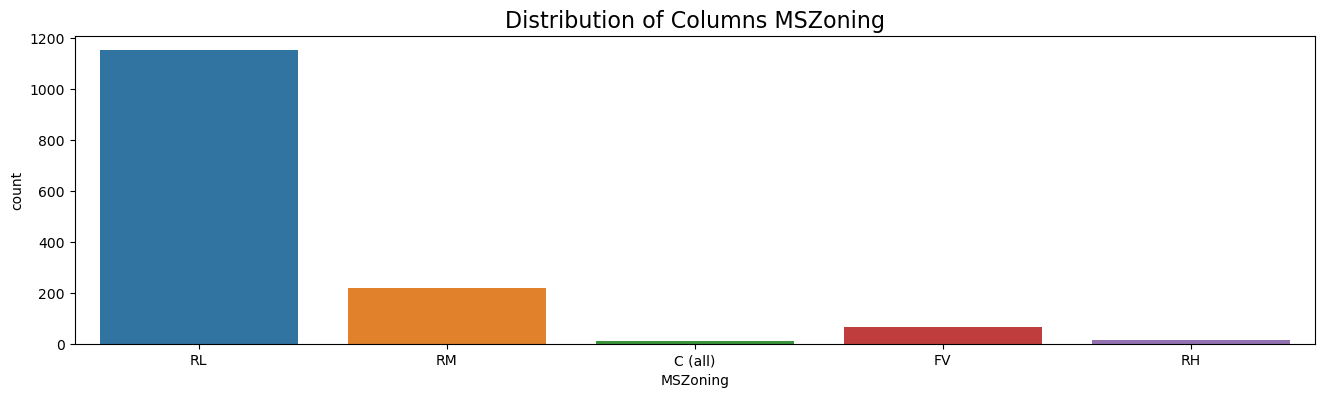

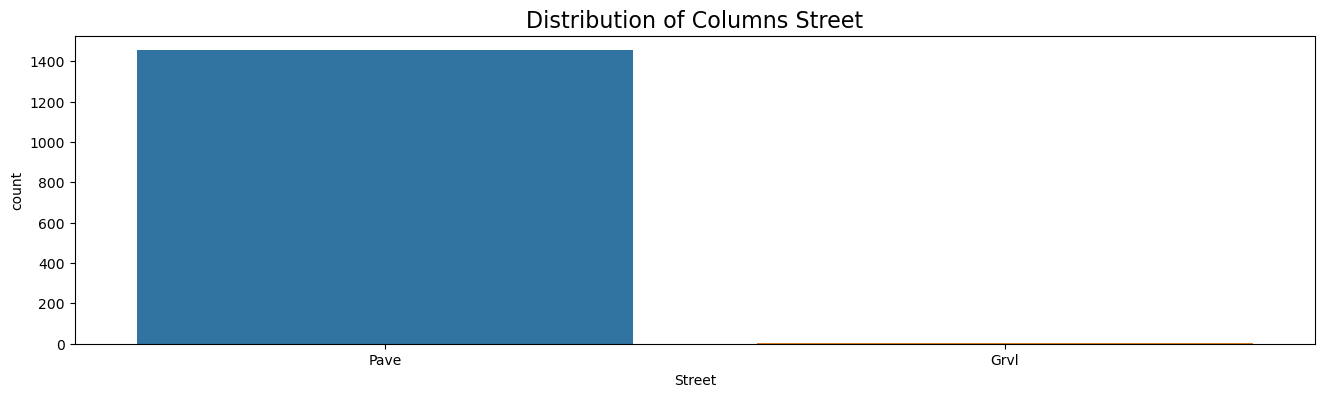

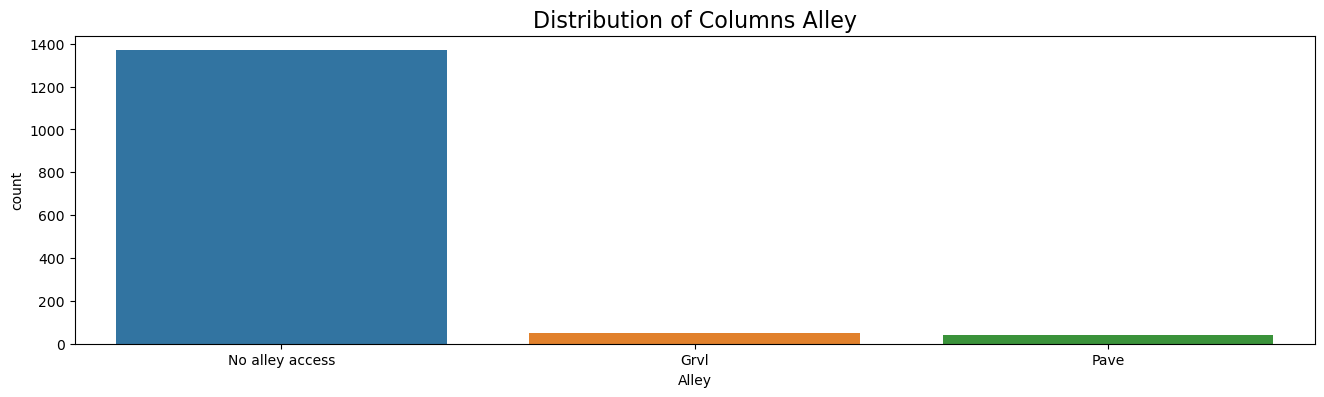

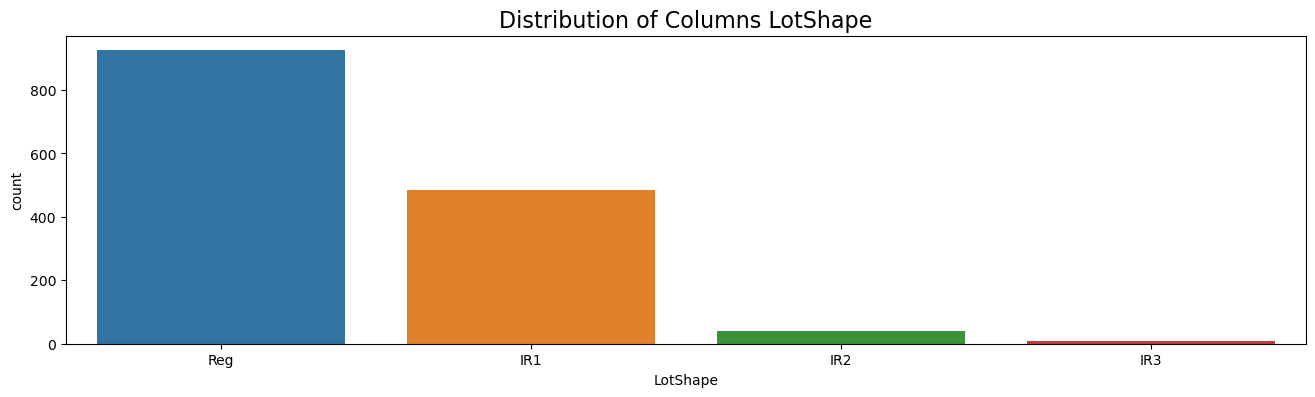

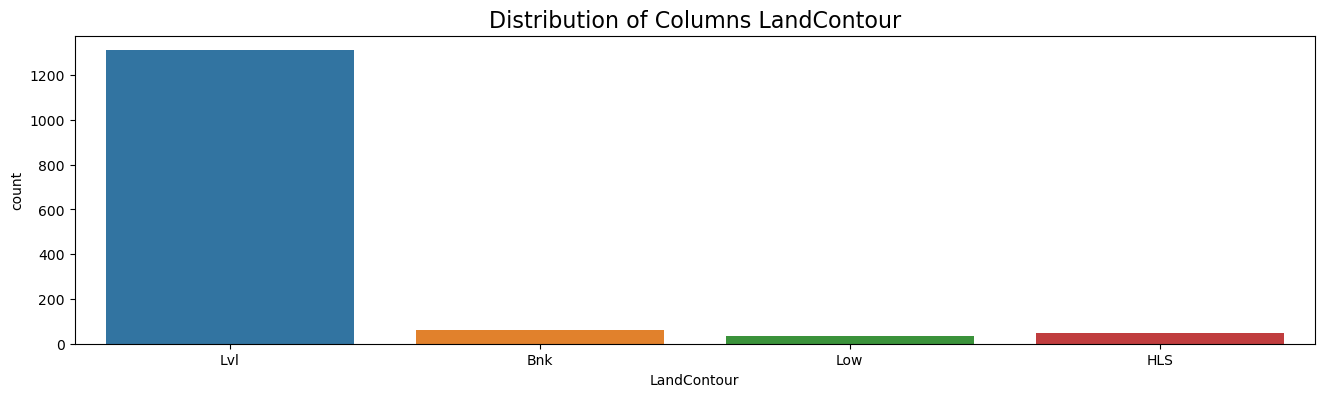

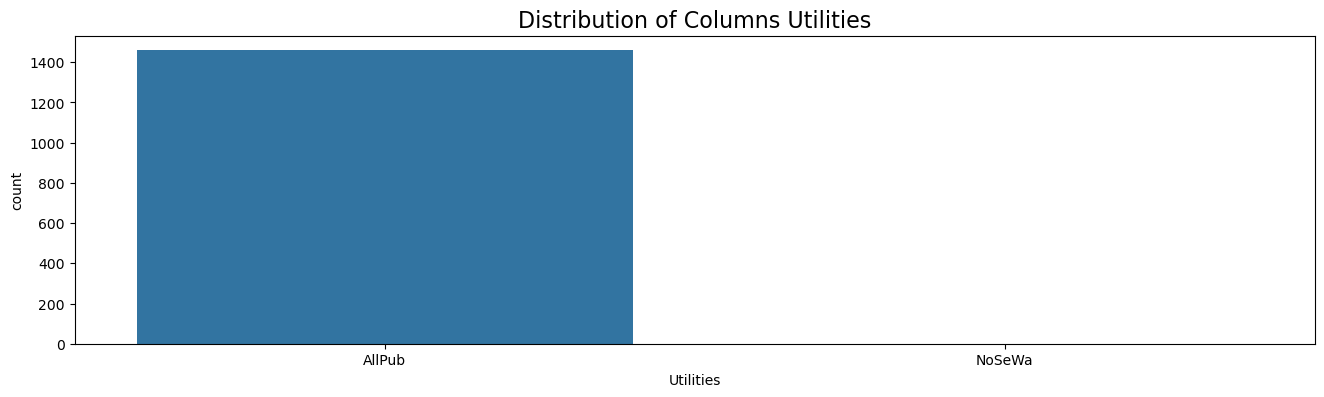

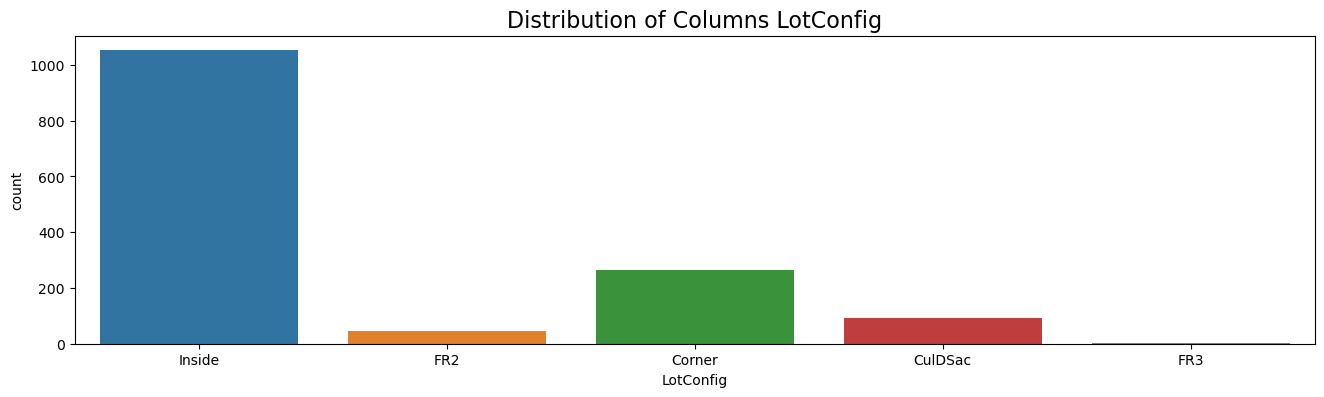

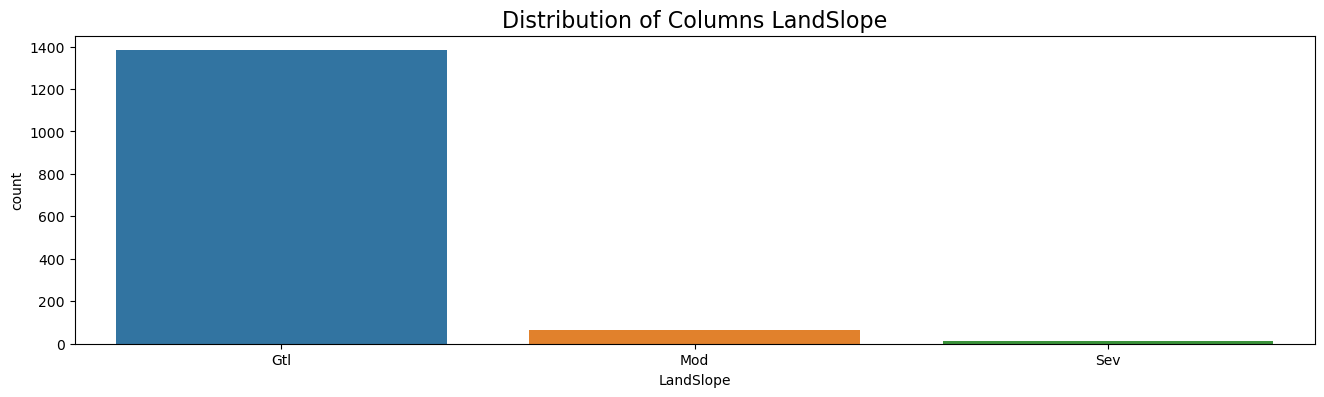

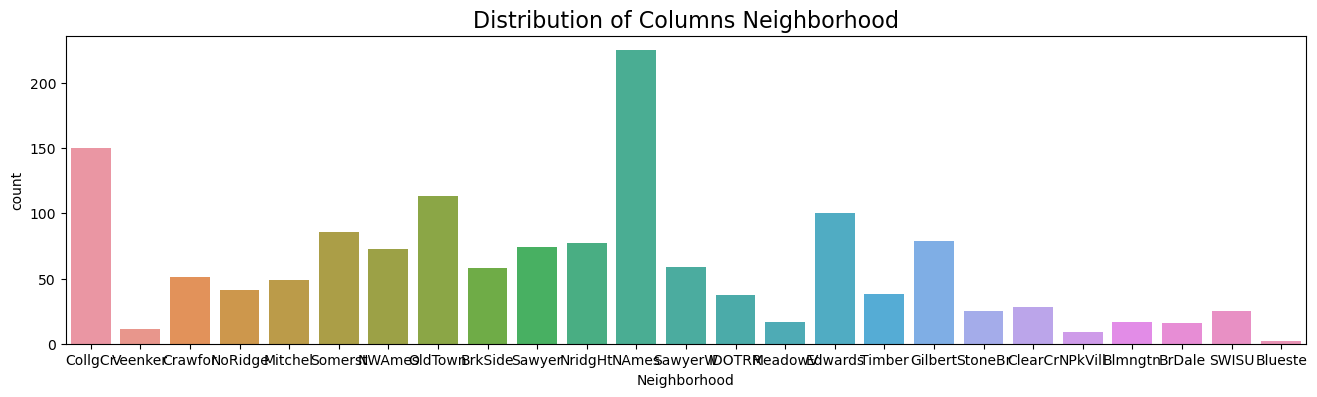

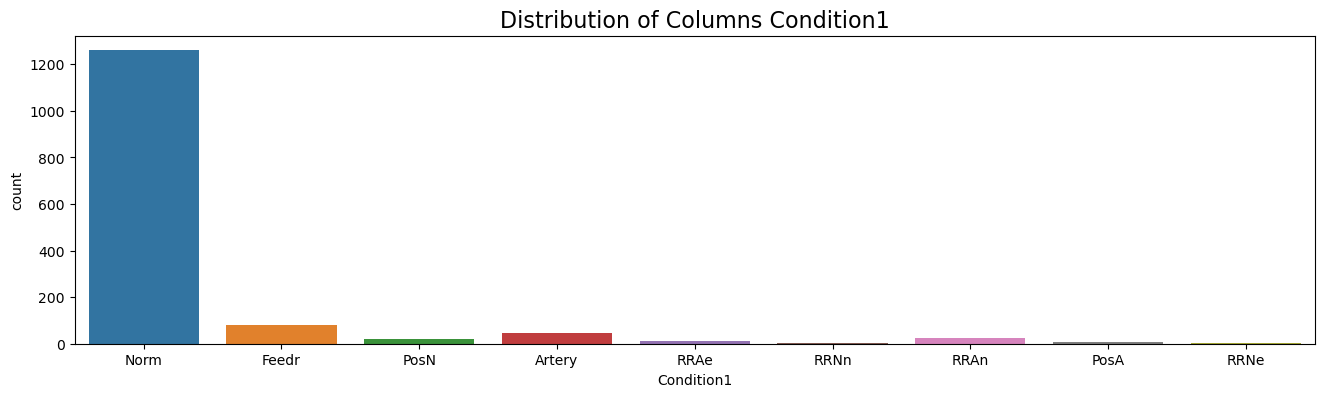

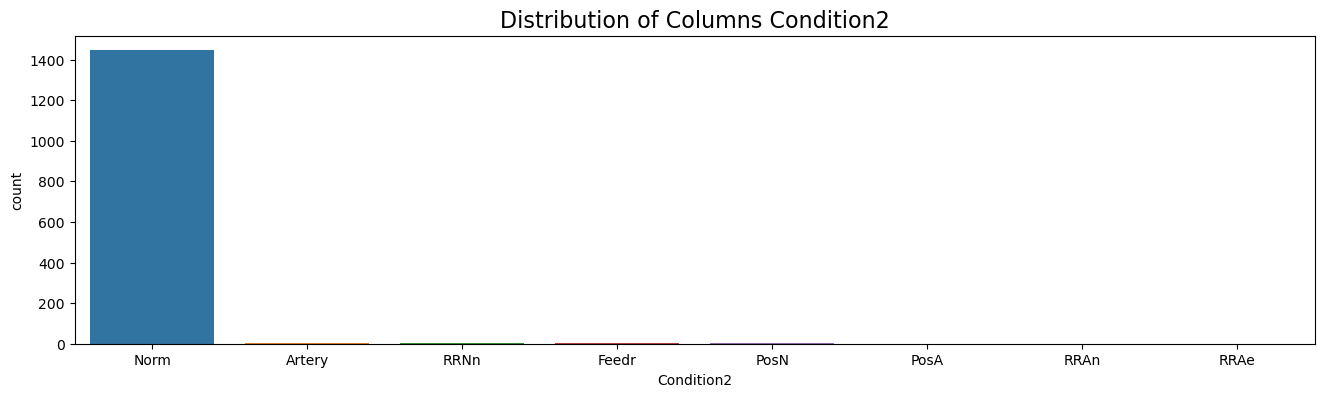

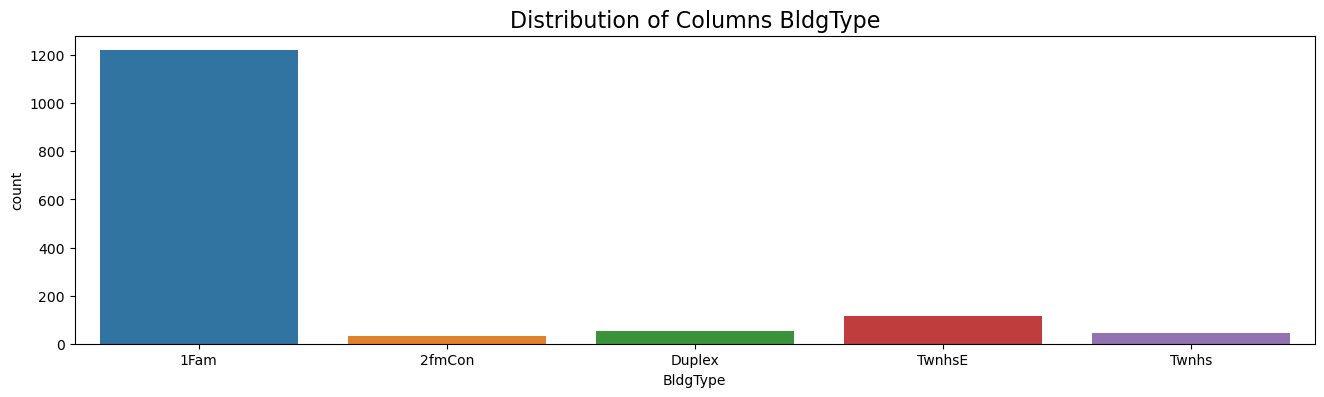

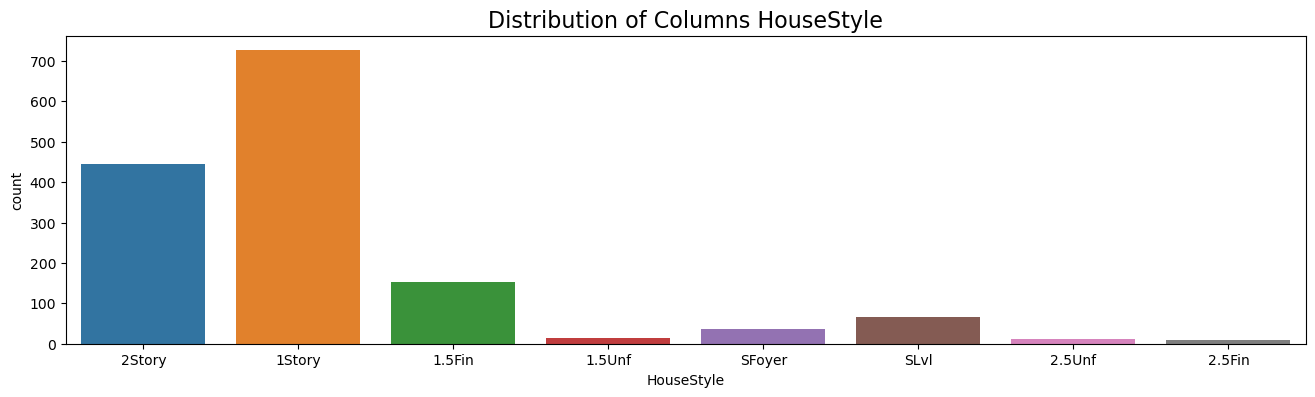

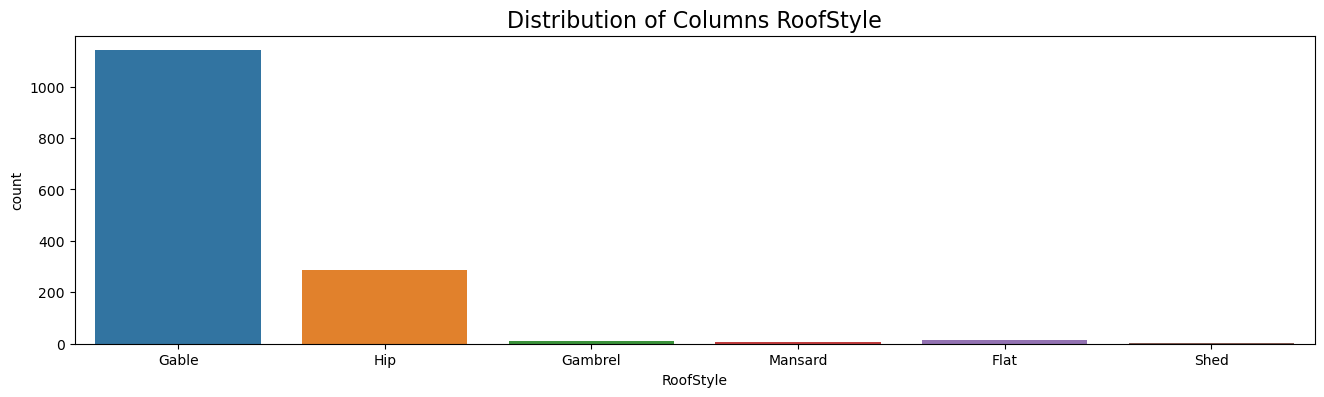

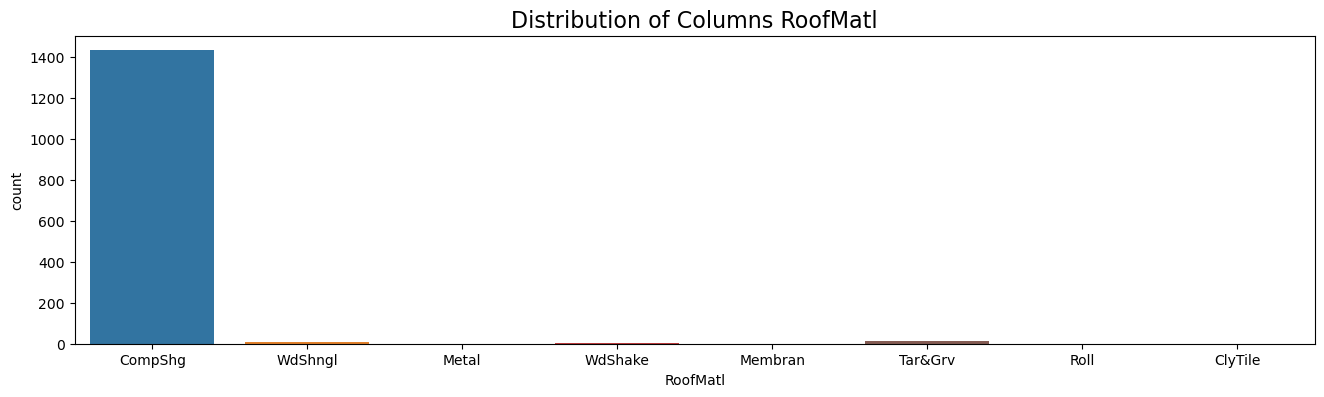

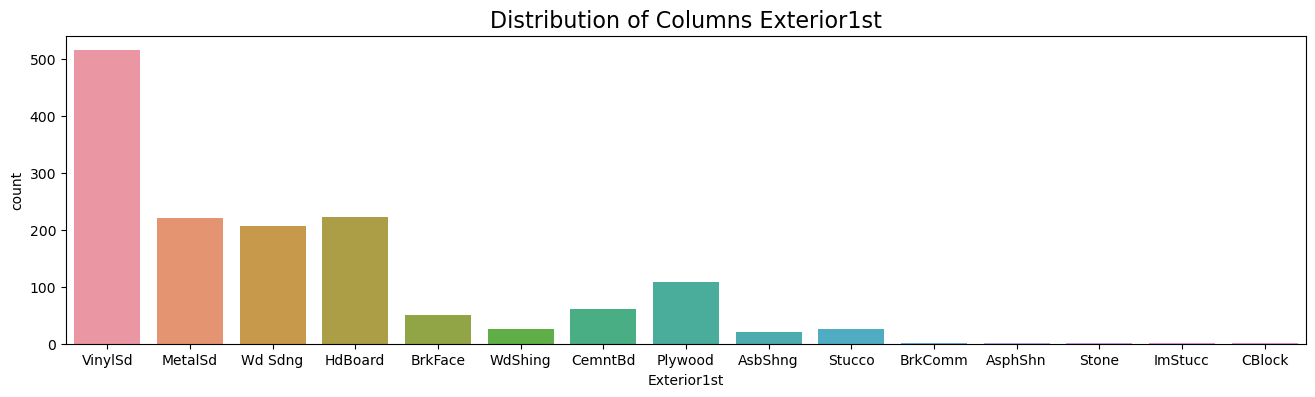

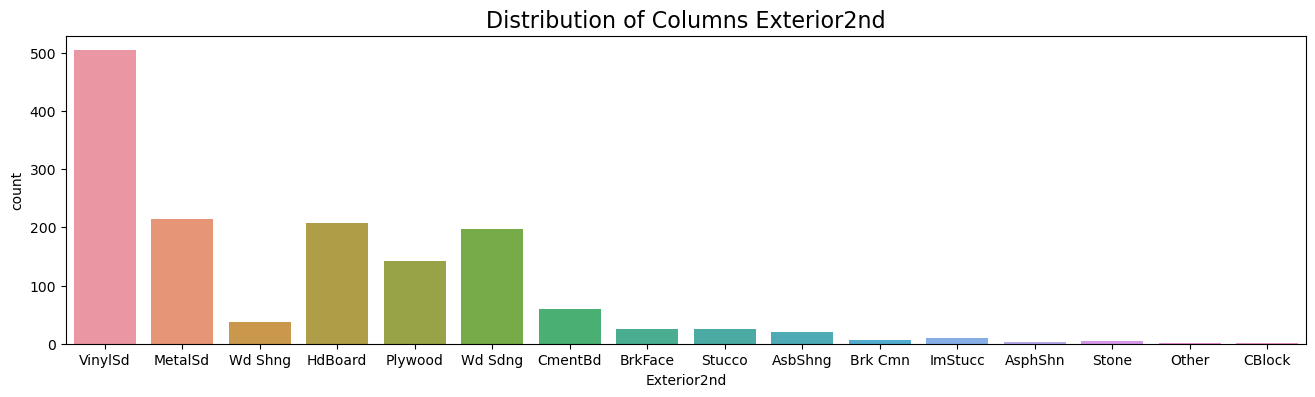

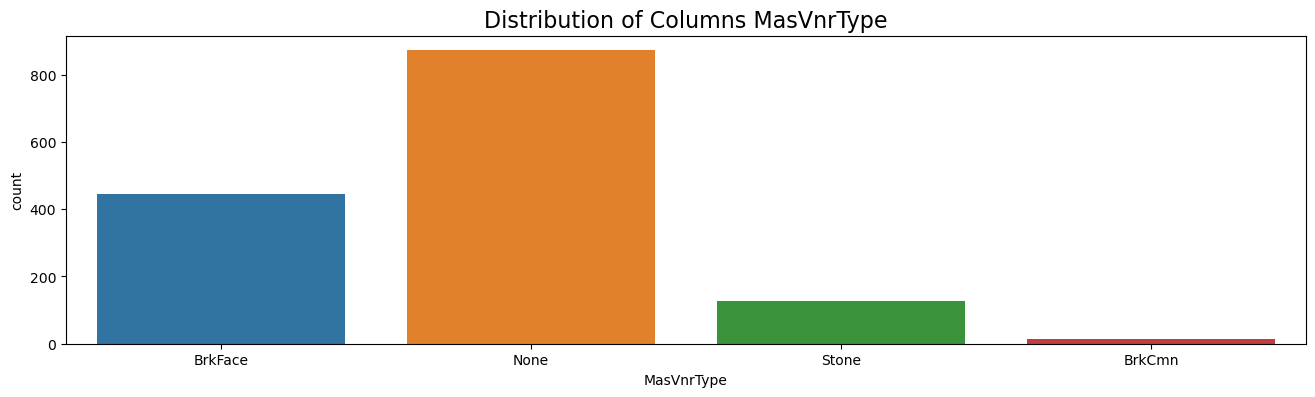

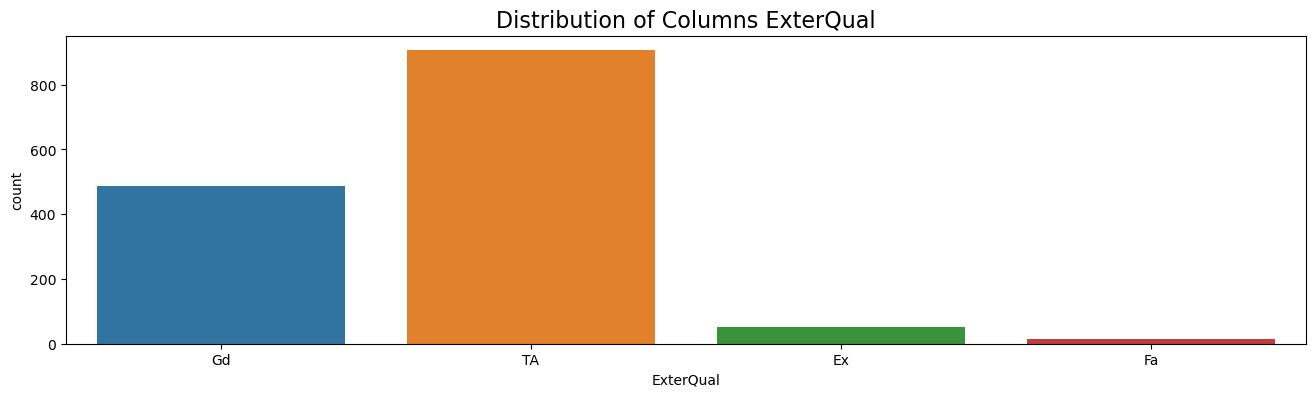

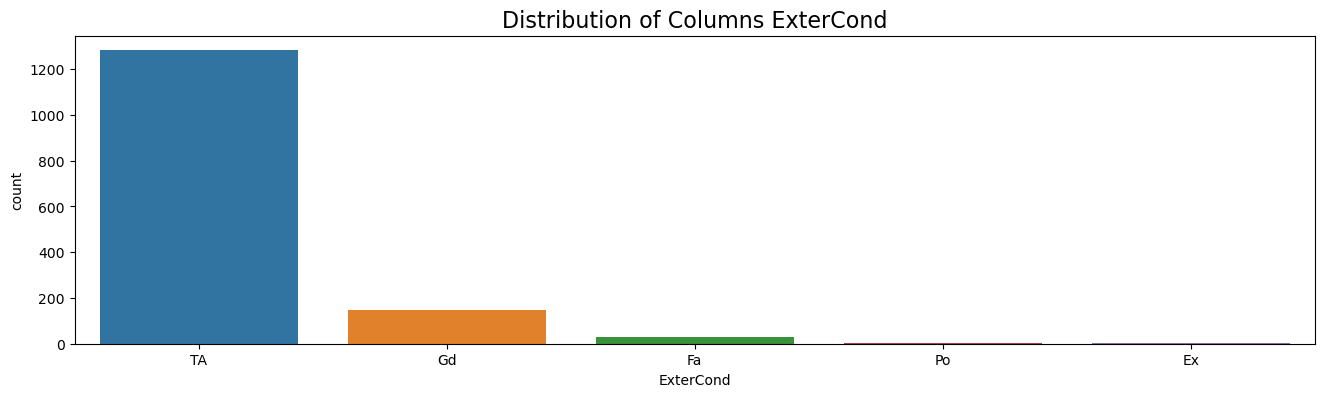

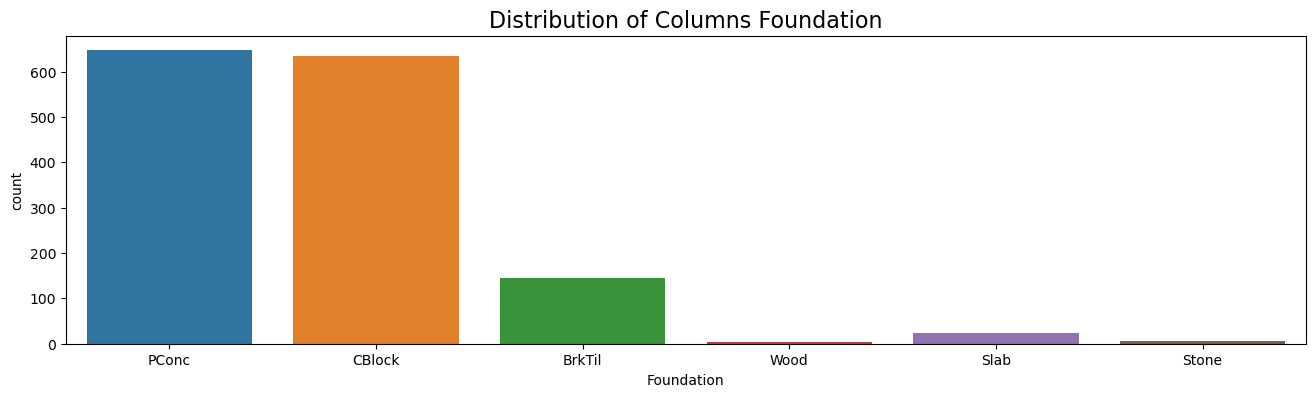

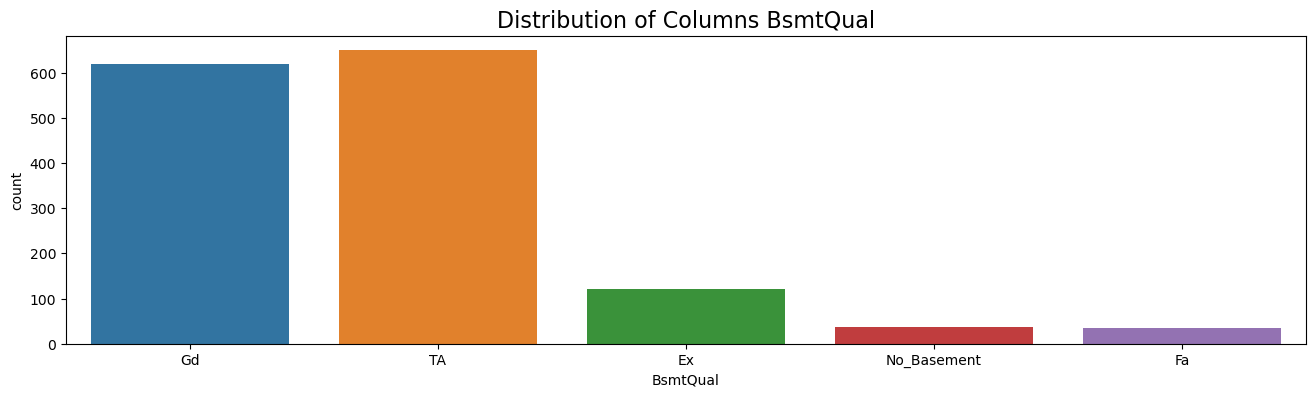

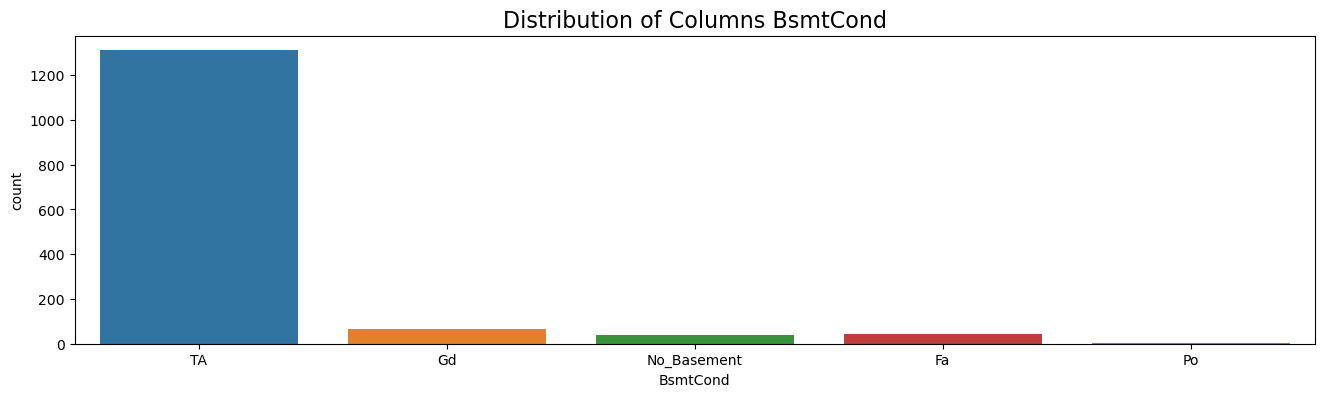

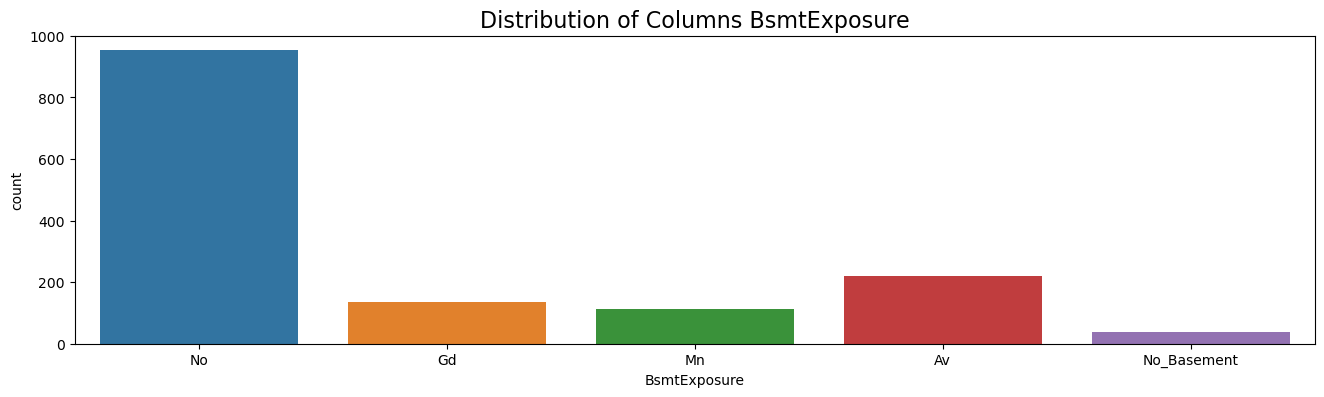

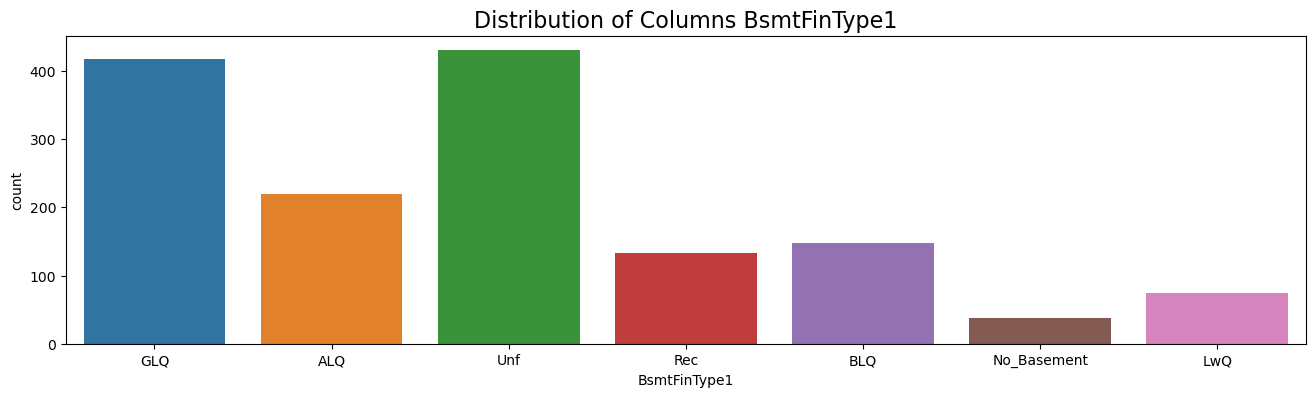

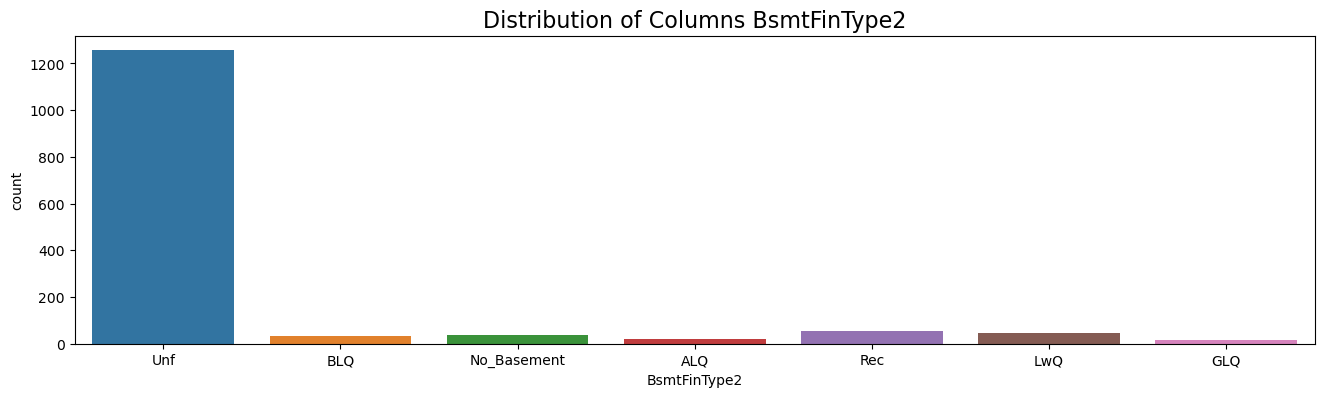

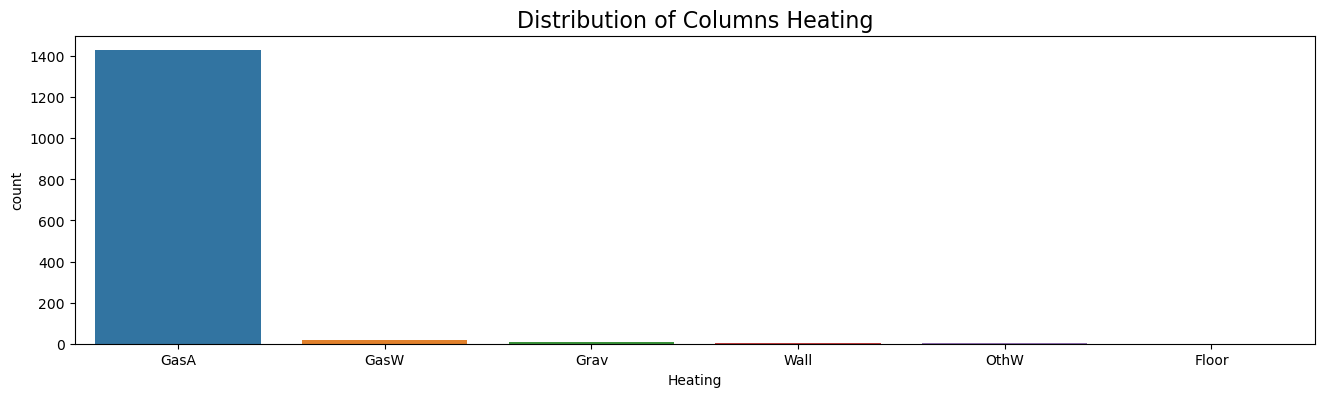

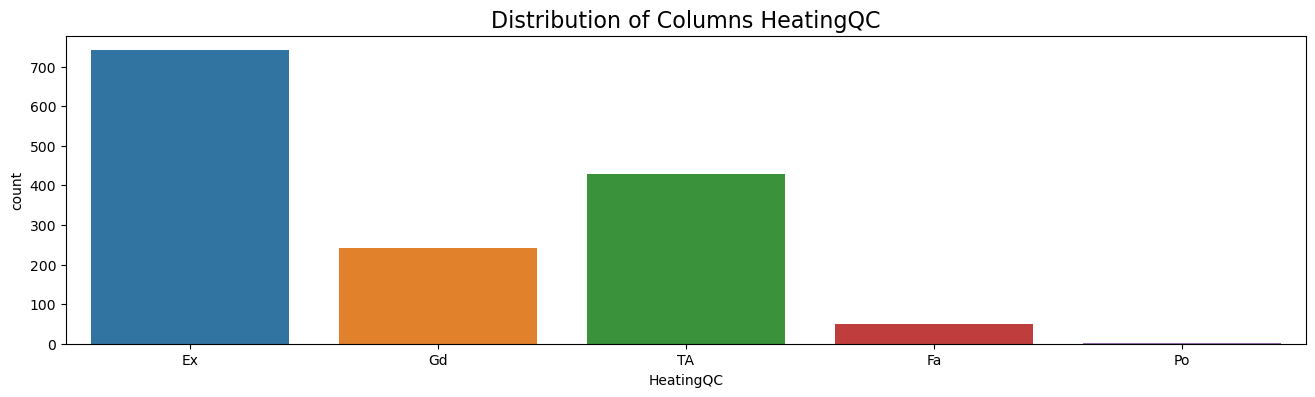

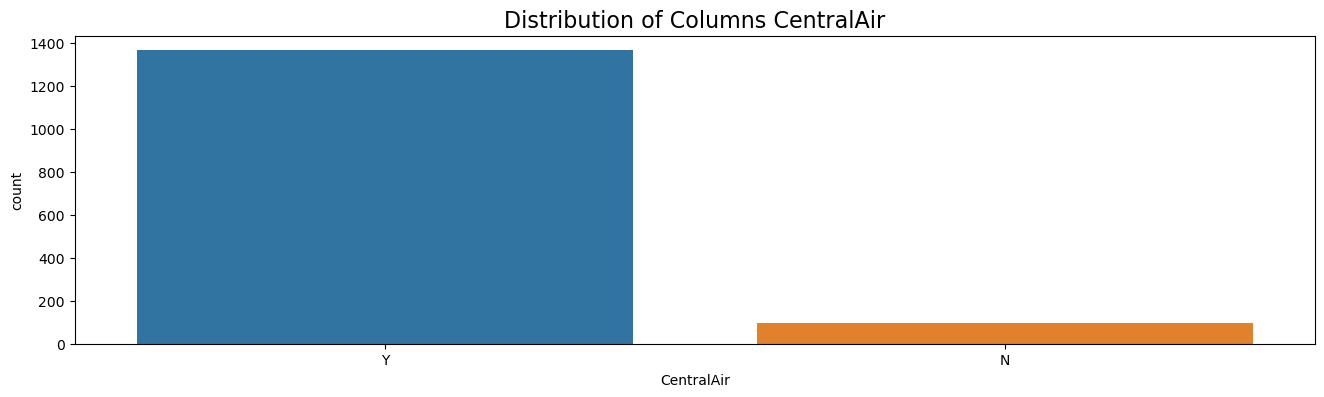

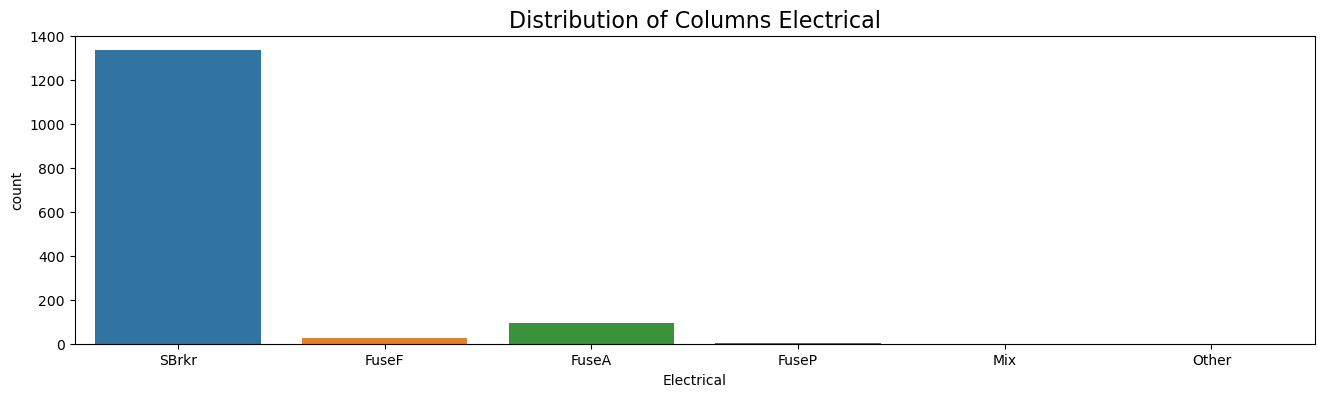

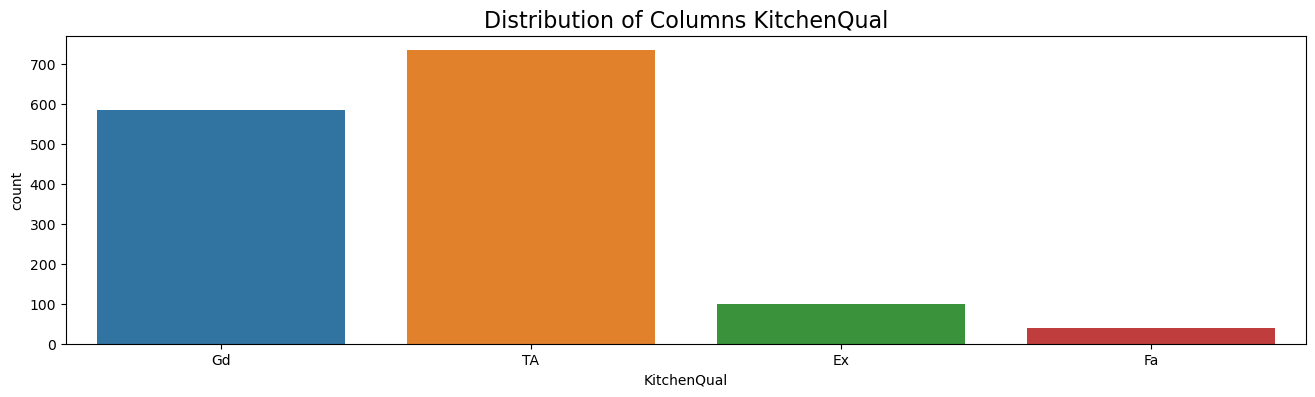

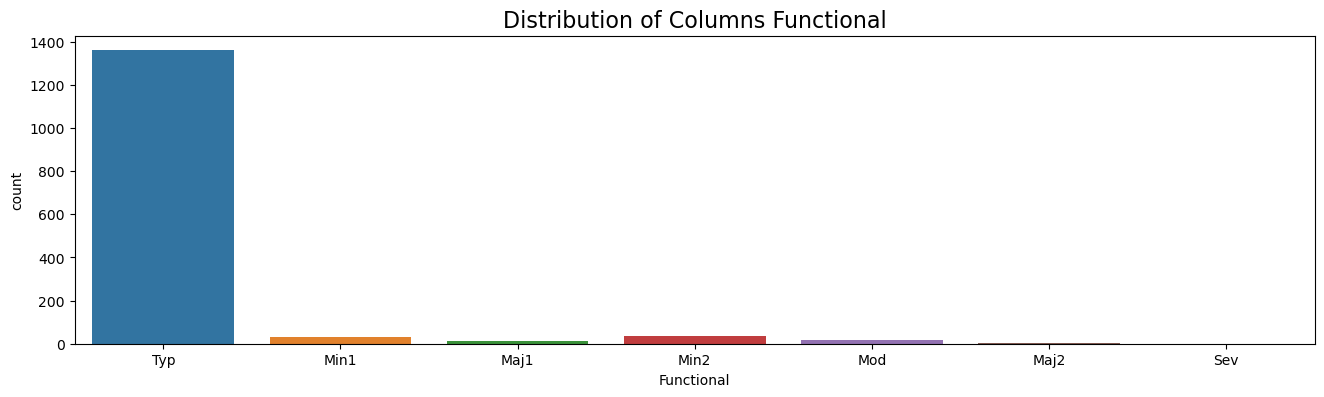

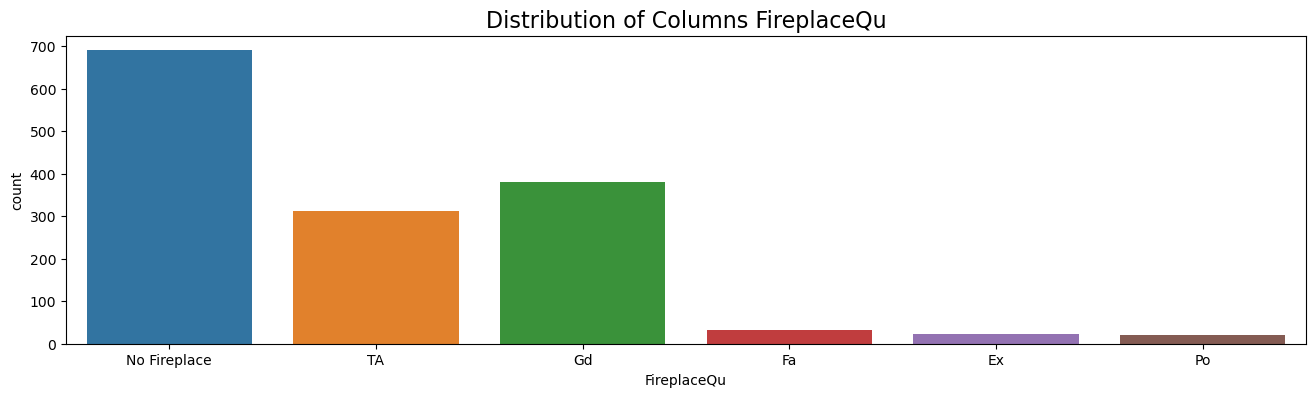

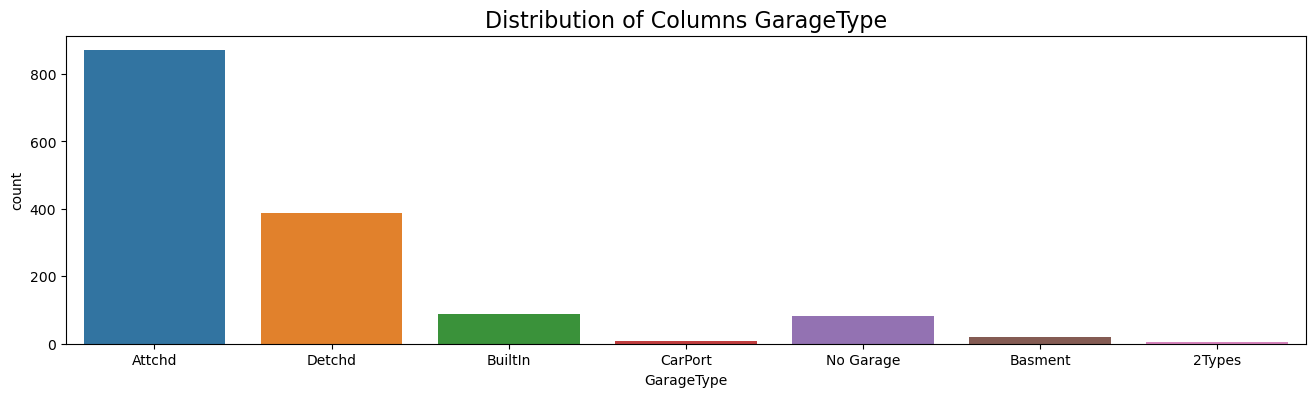

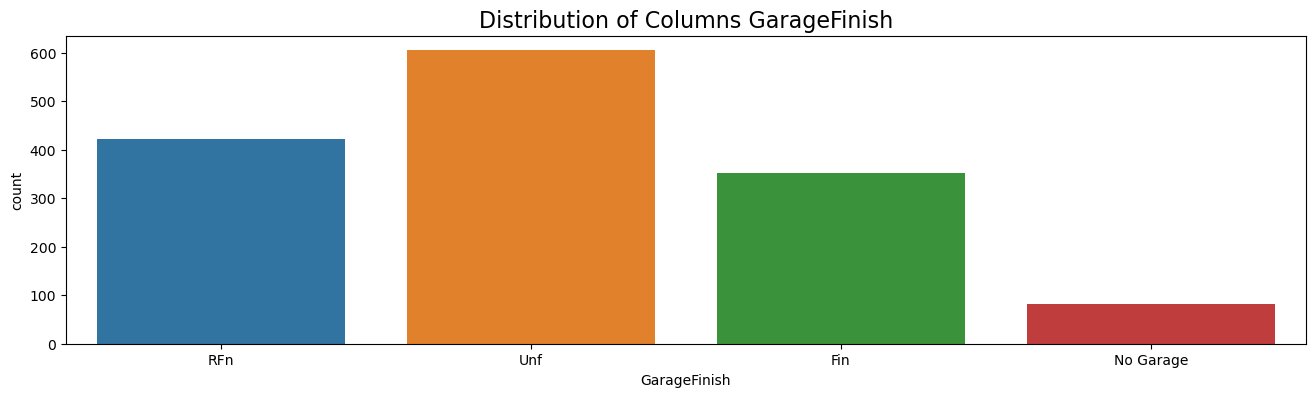

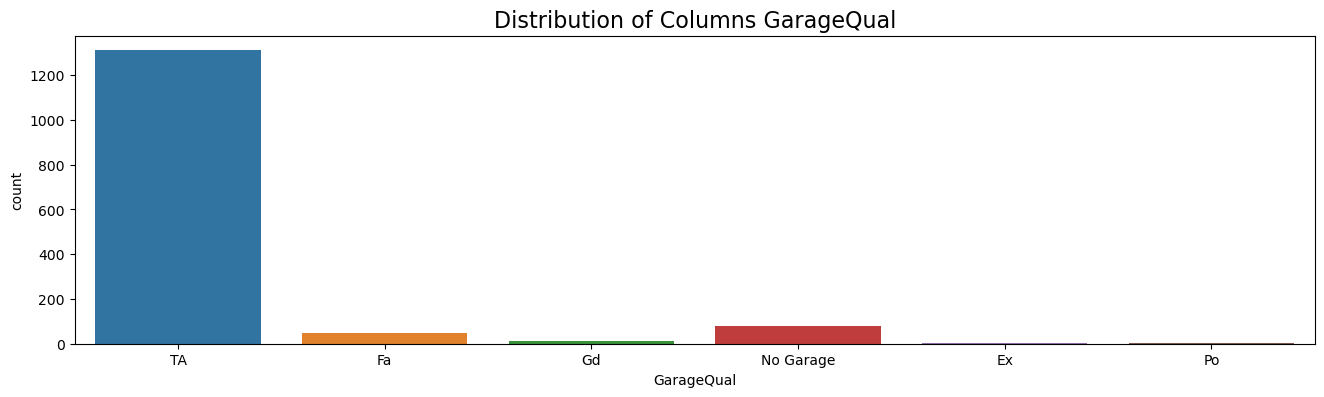

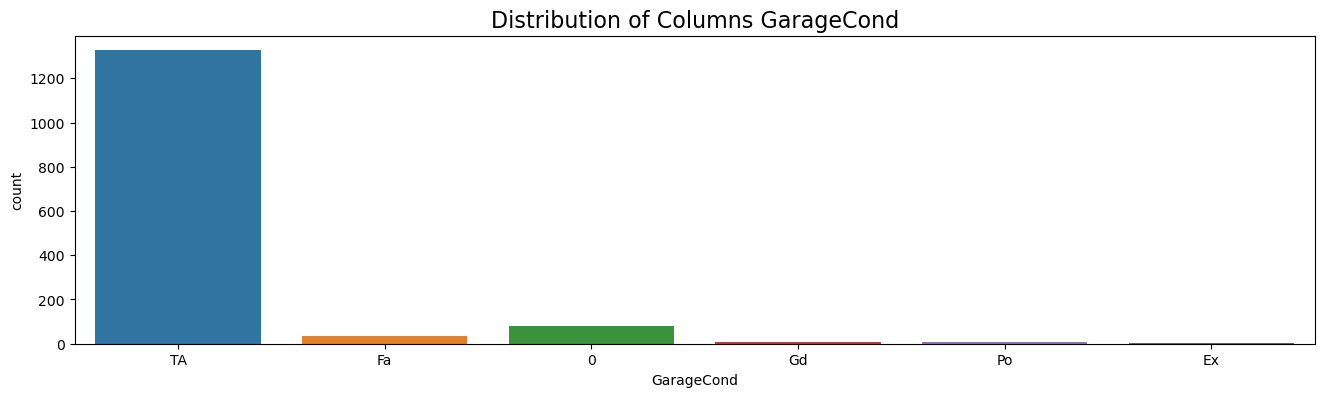

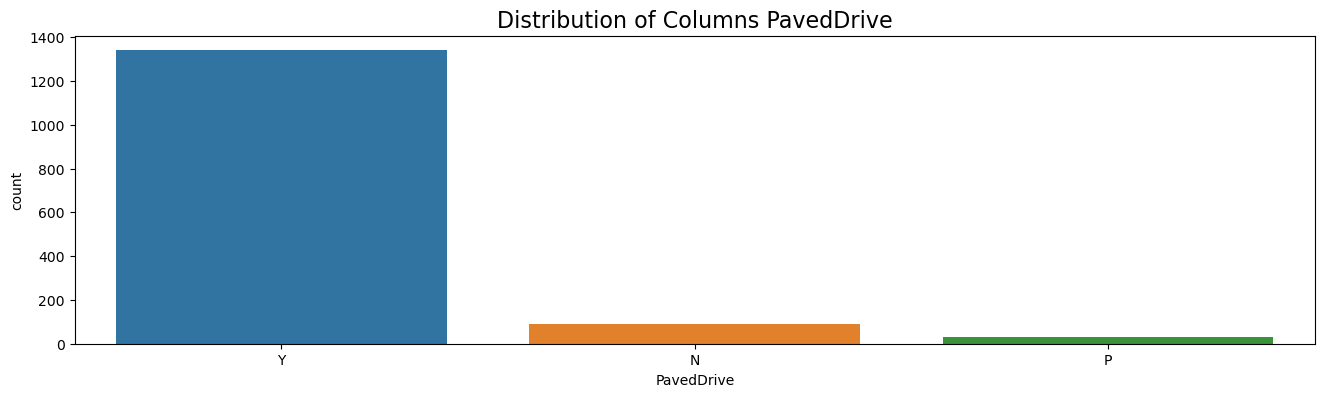

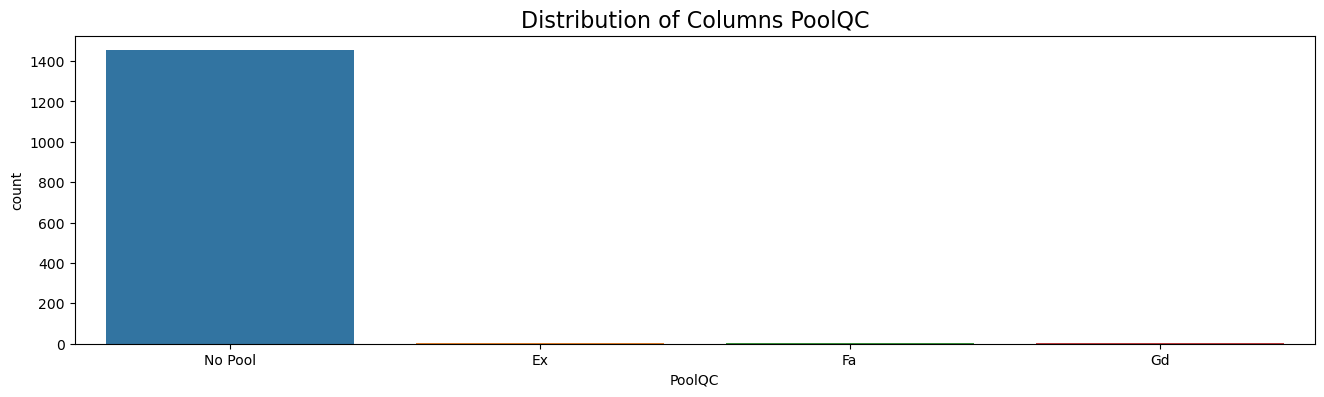

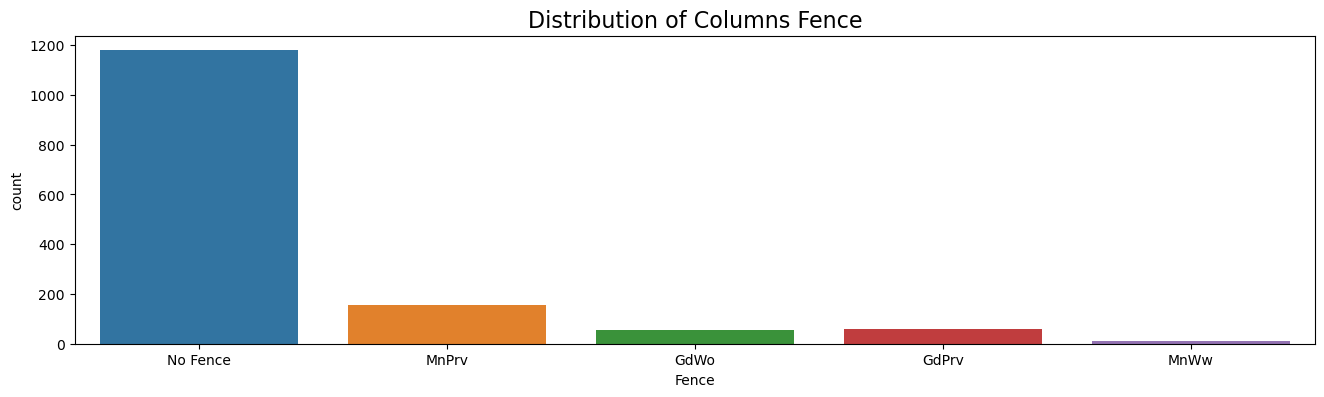

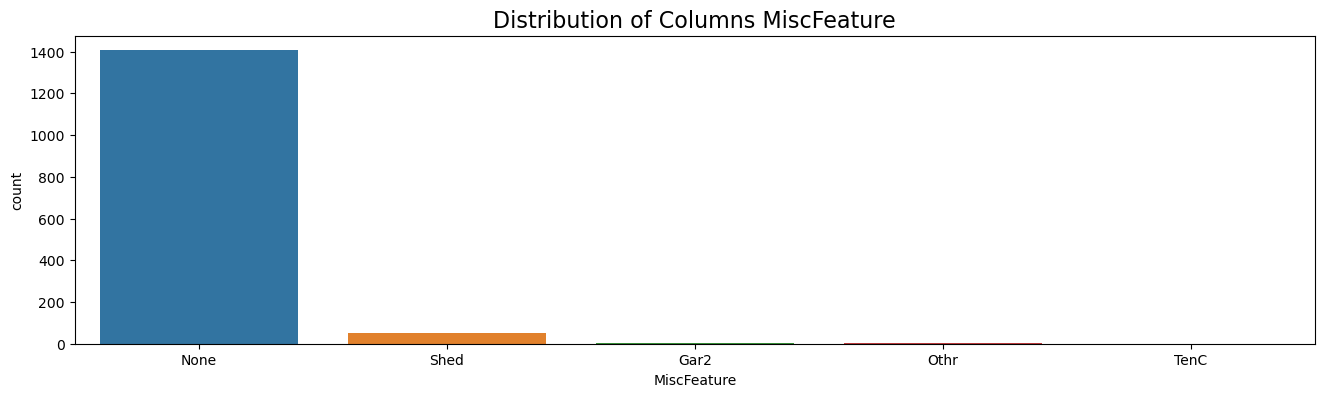

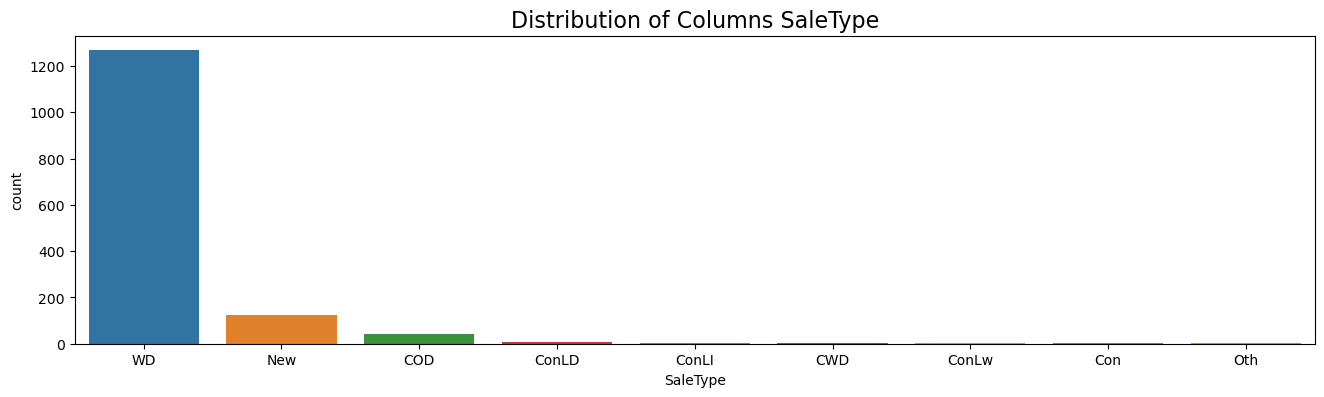

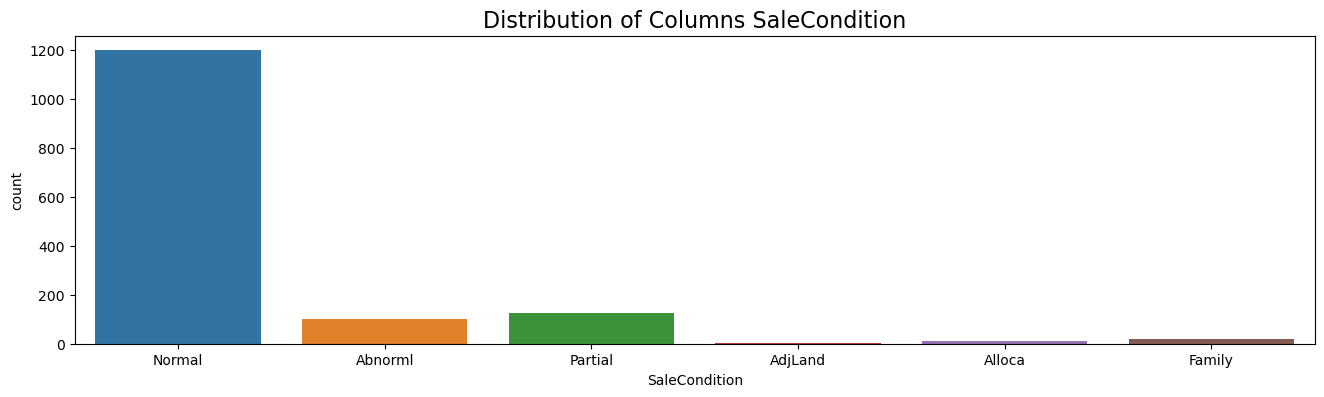

In [20]:
# Checking Categroical columns distribution -  count 24
for x in range(1,int(len(cat_cols)+1)):
  fig,axes=plt.subplots()
  sns.countplot(housing_df[cat_cols[x-1]])
  axes.set_title('Distribution of Columns '+cat_cols[x-1],fontdict={'fontsize':16})
  fig.set_figheight(4)
  fig.set_figwidth(16)
plt.show()

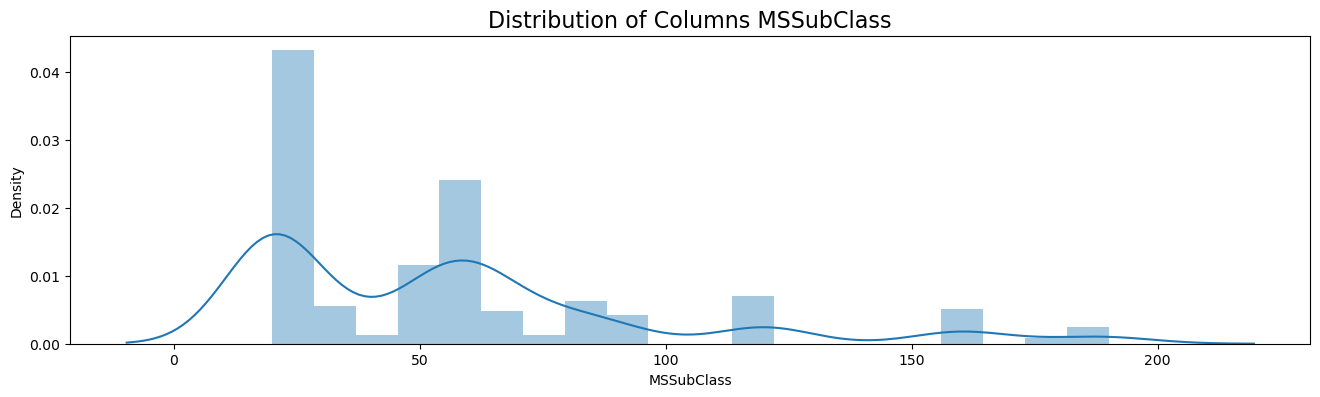

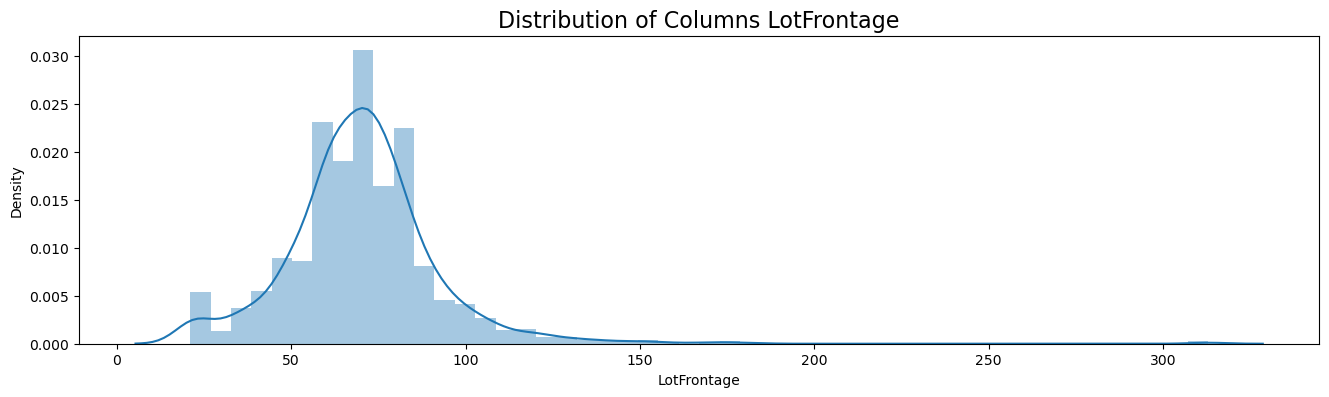

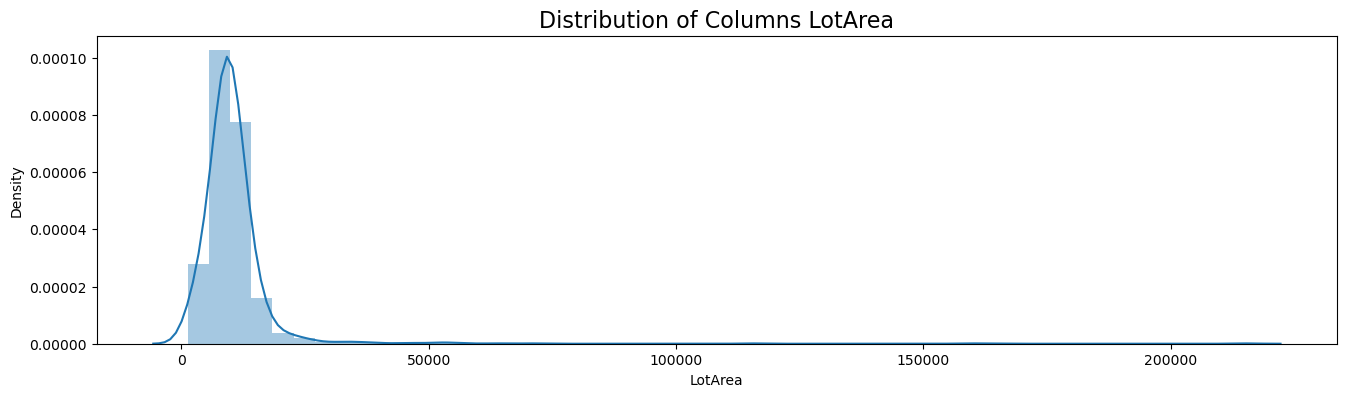

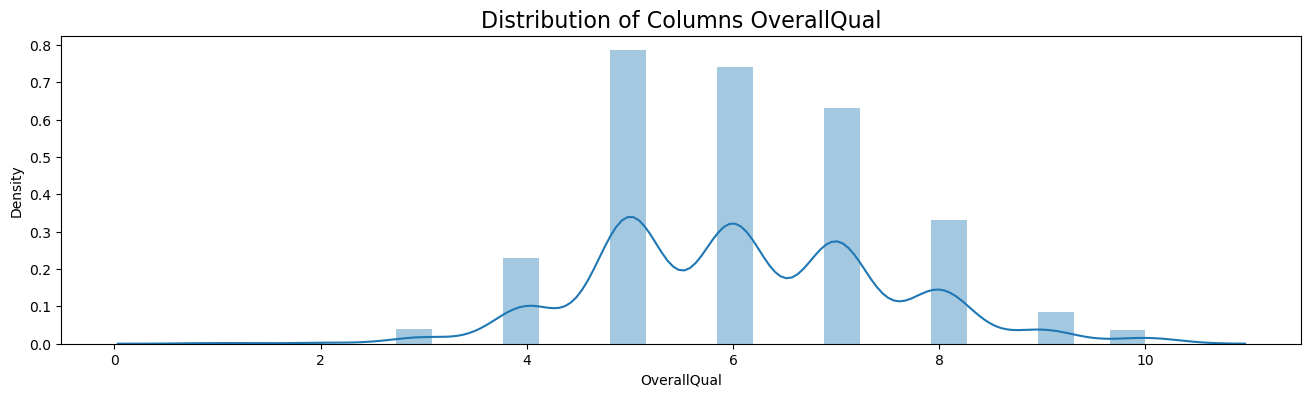

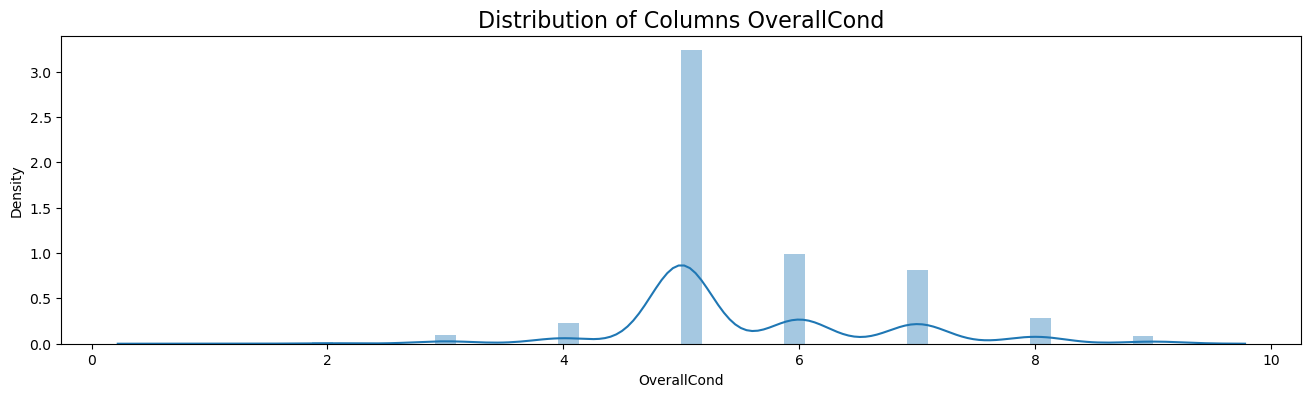

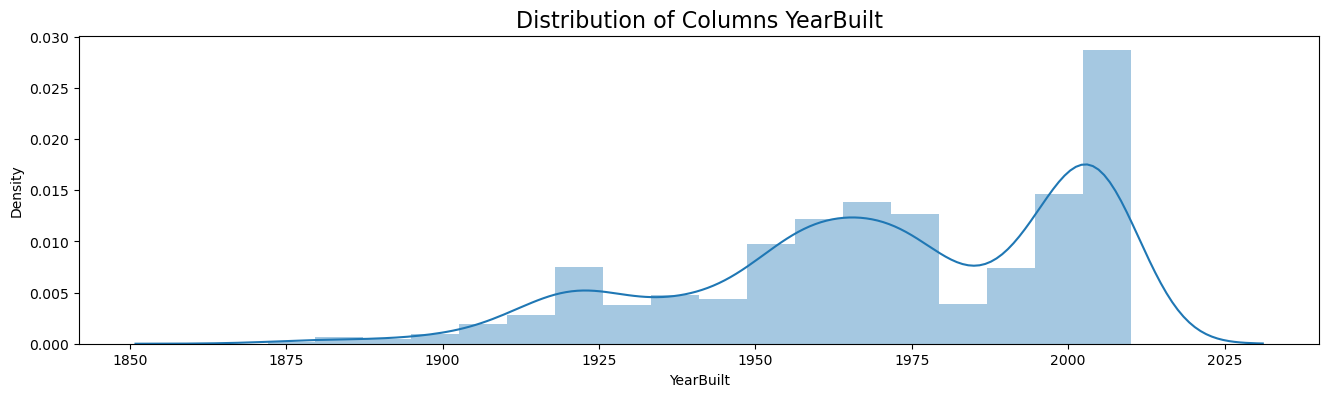

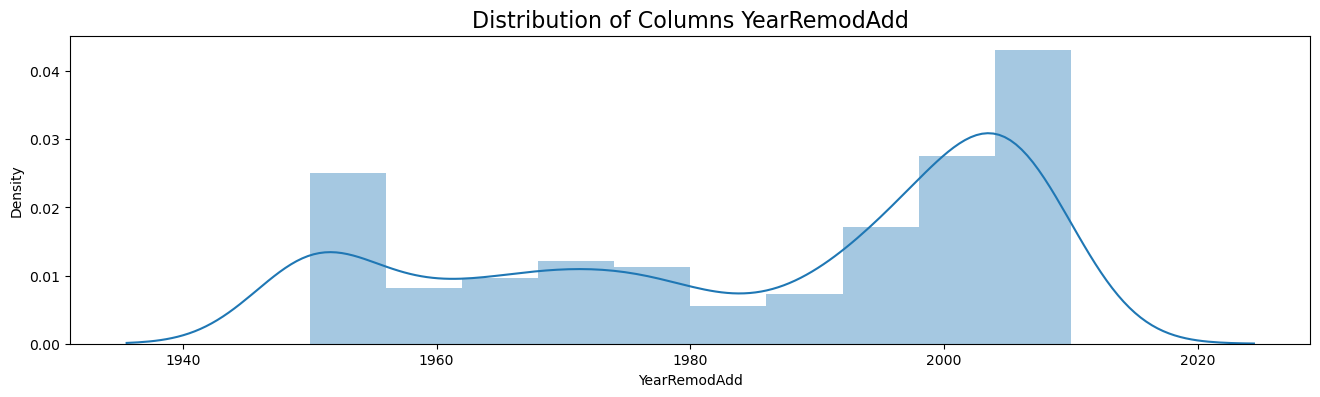

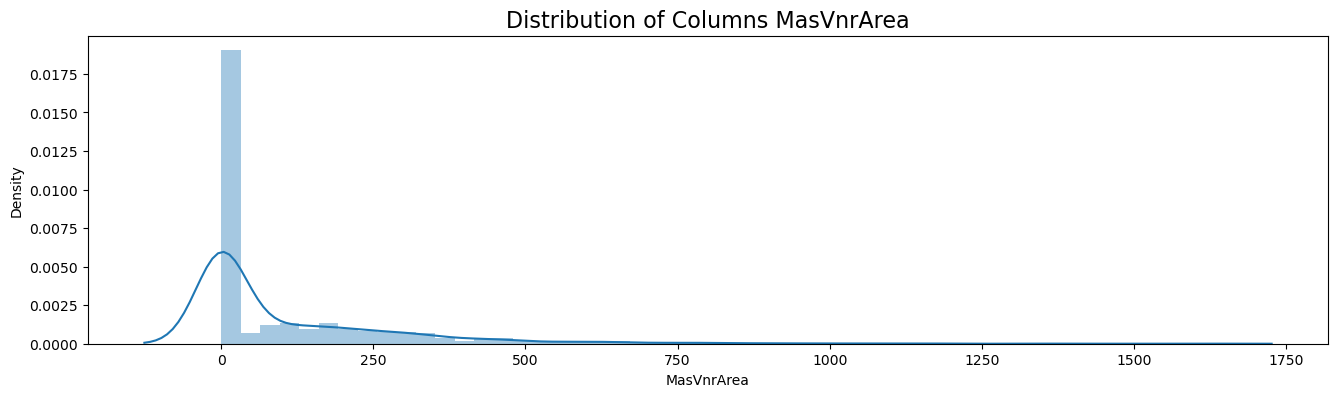

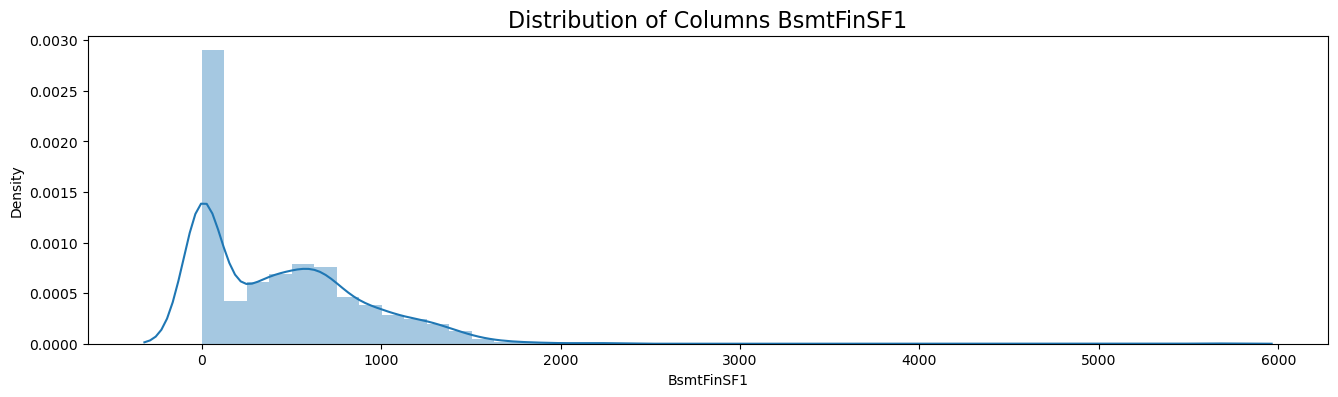

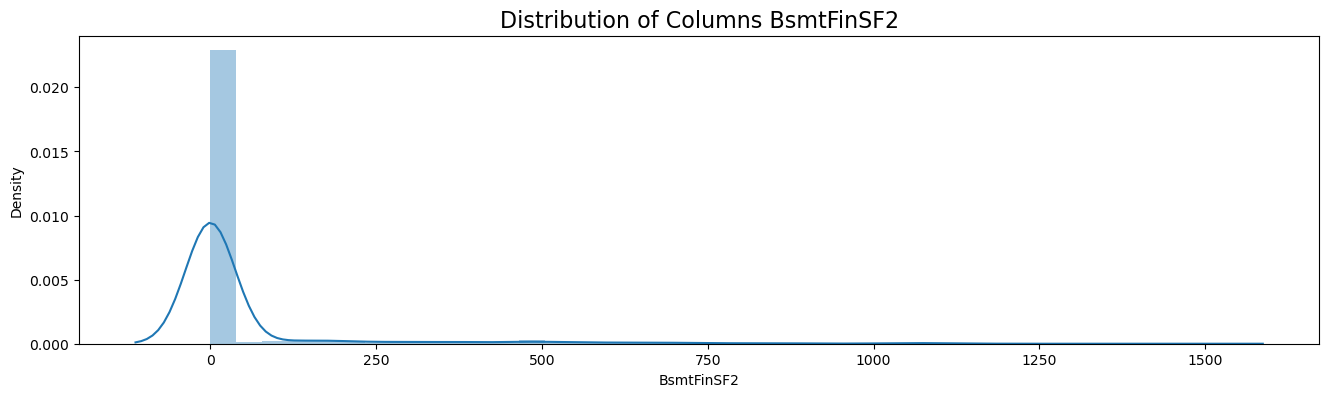

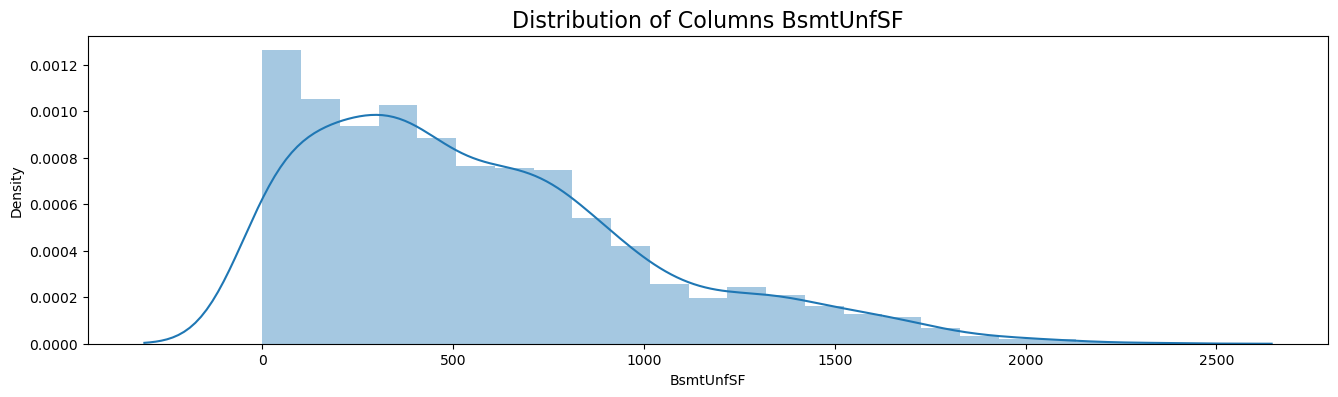

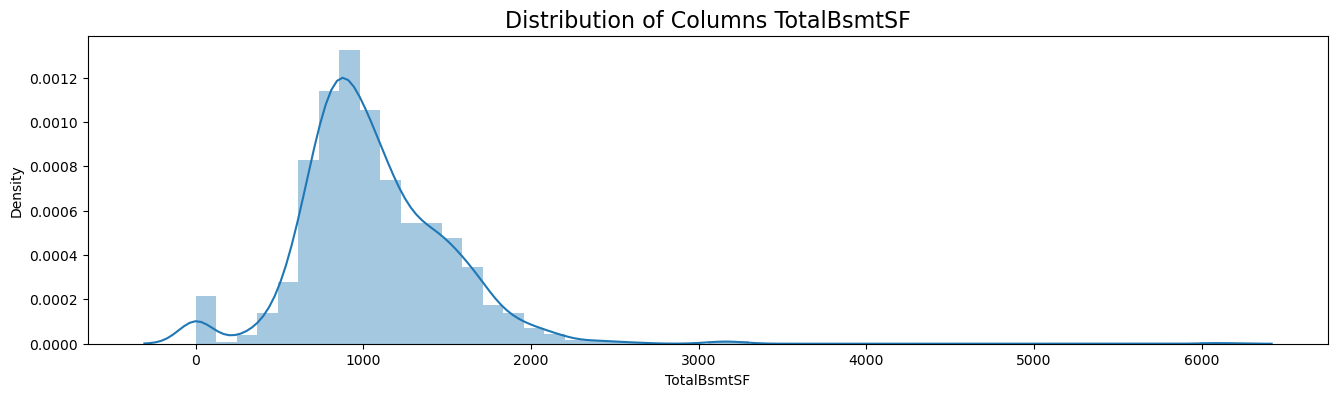

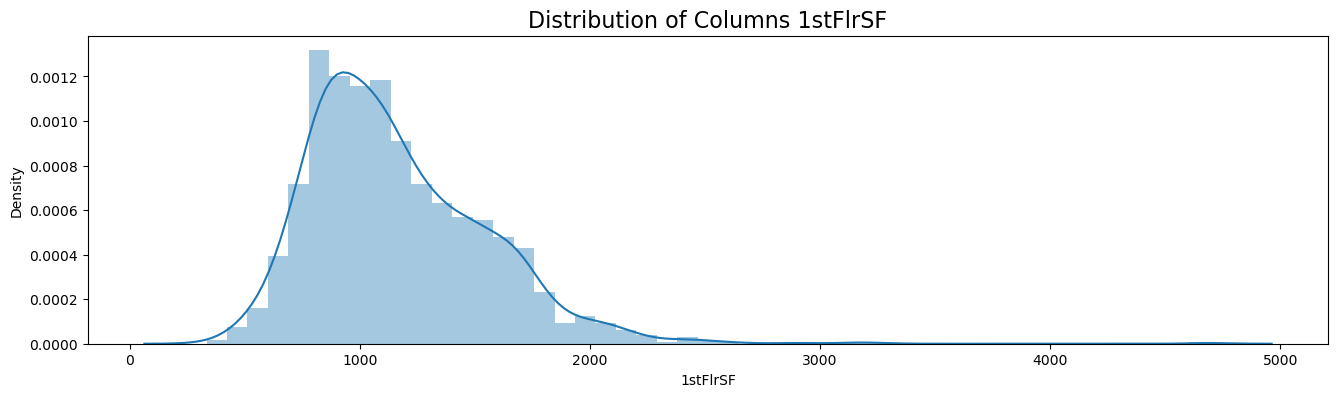

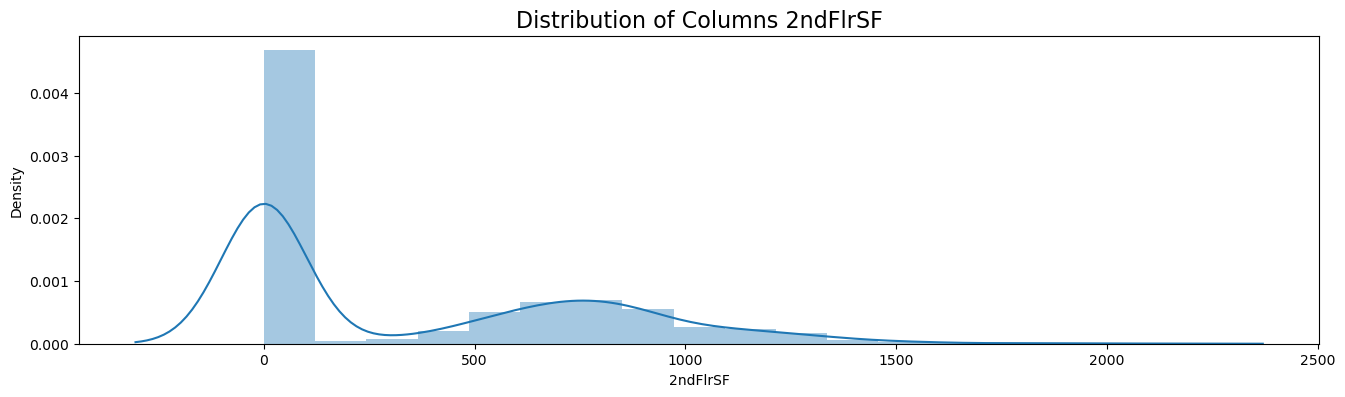

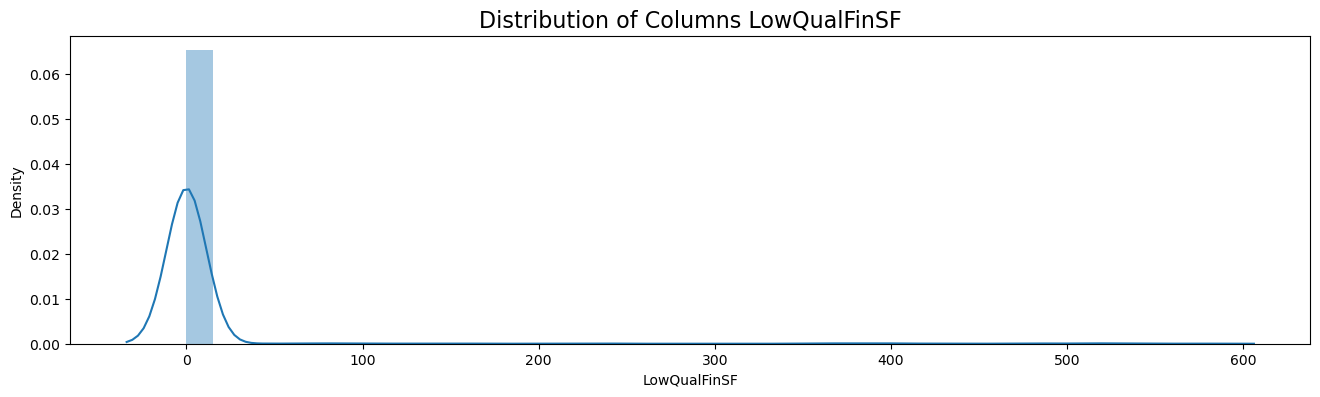

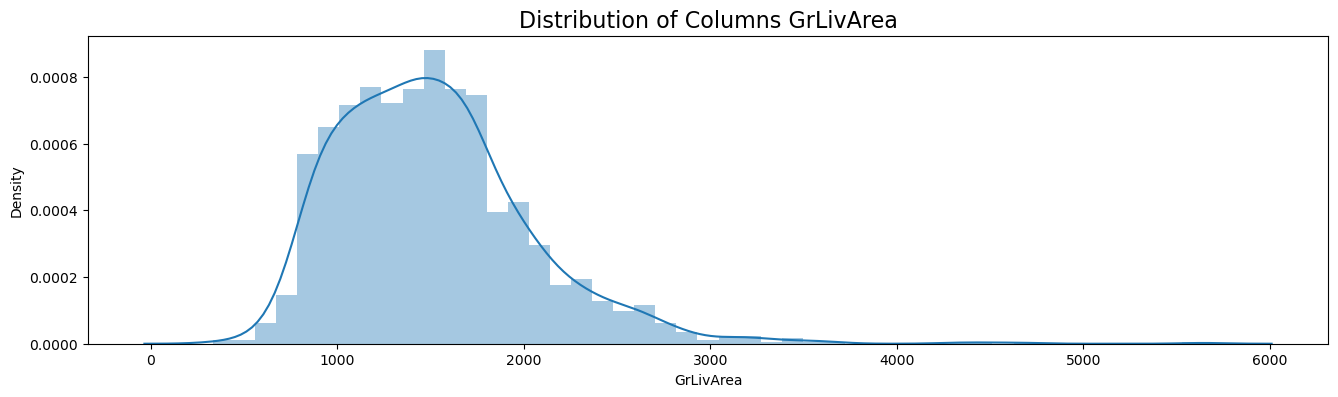

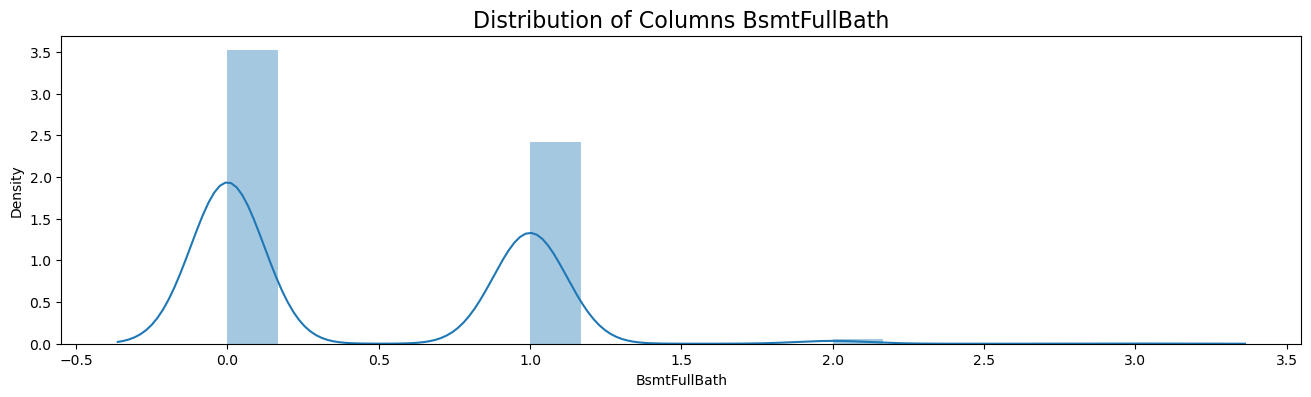

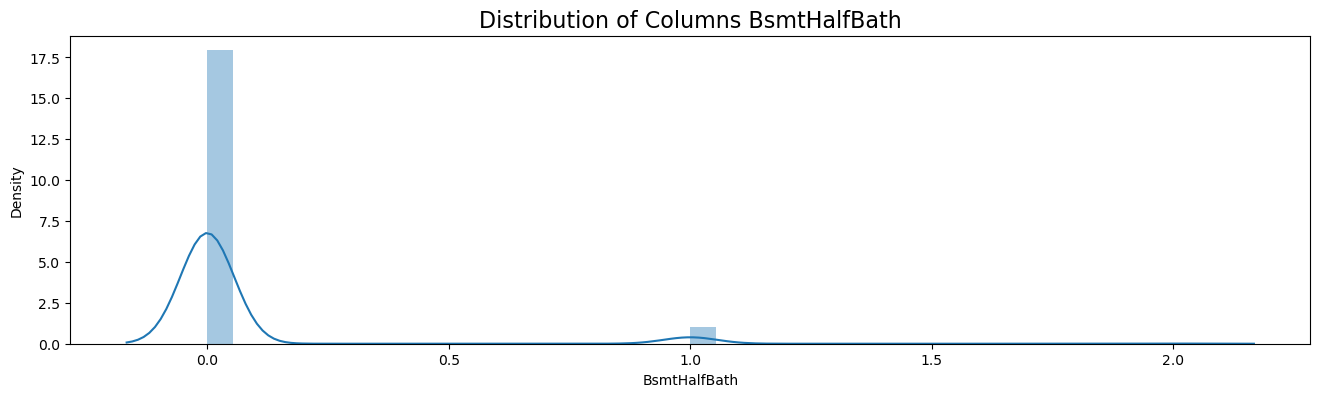

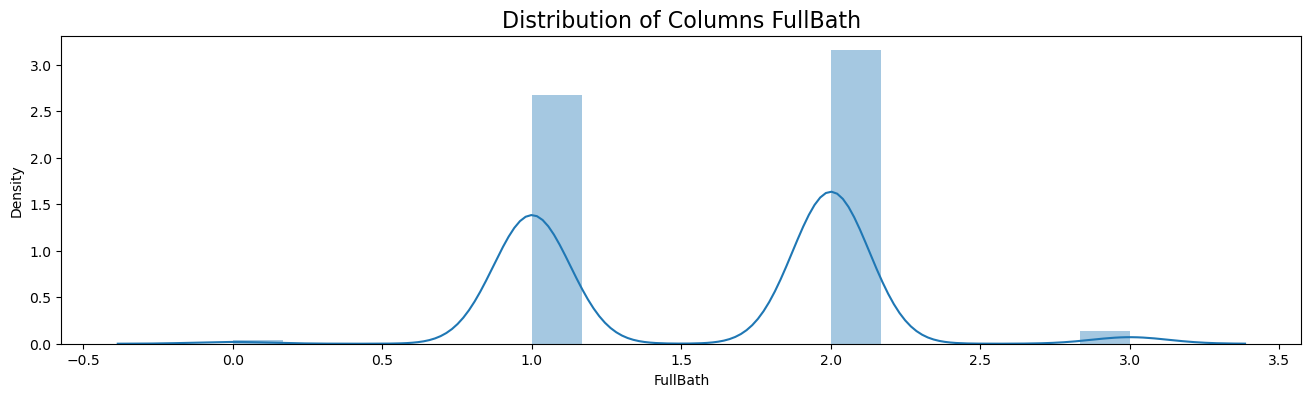

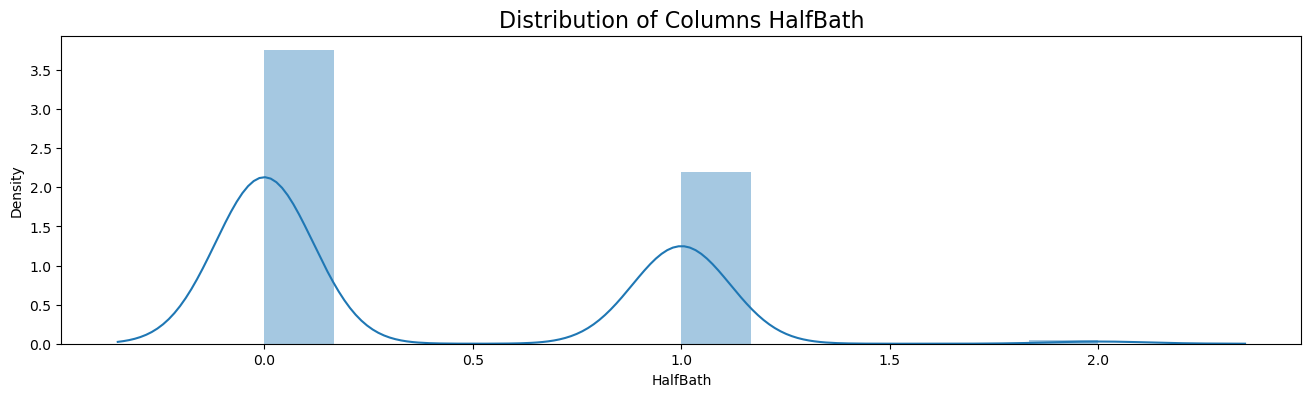

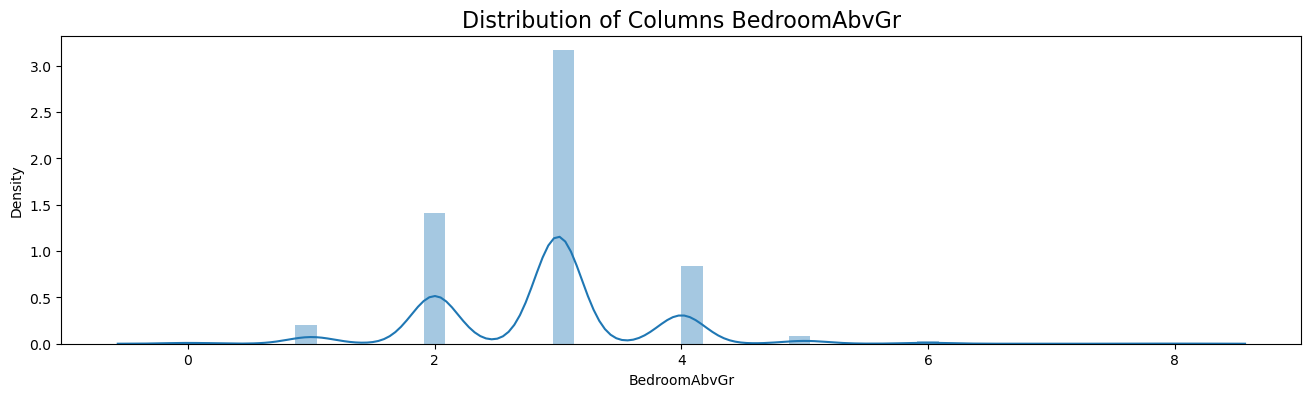

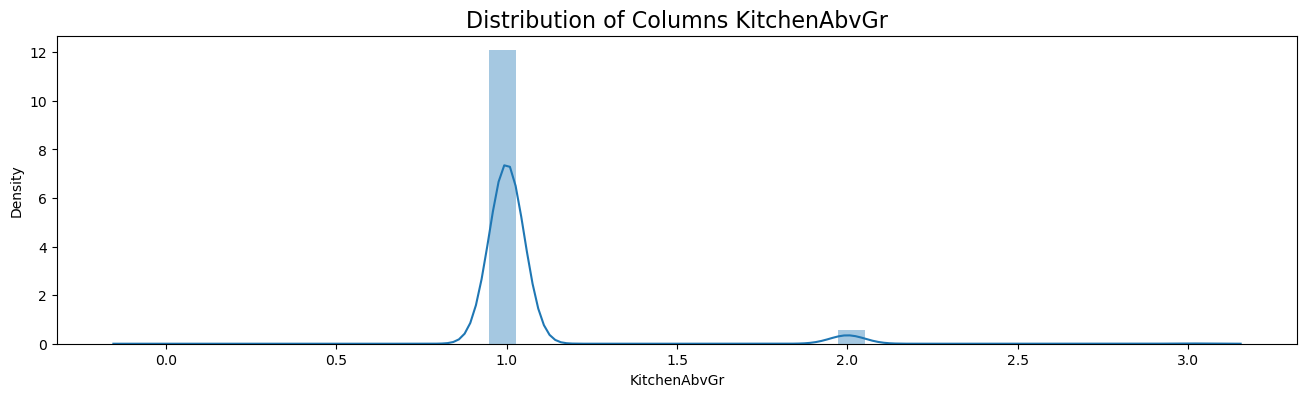

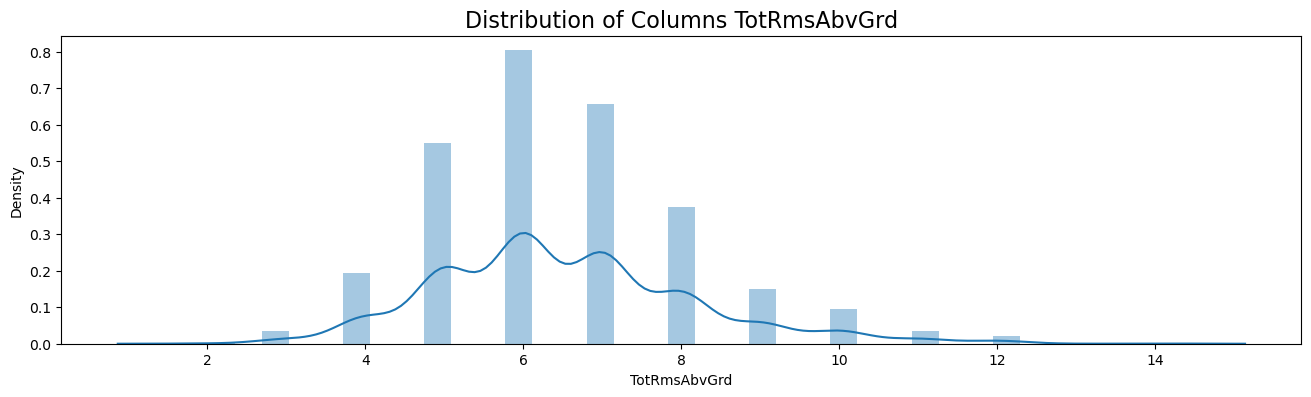

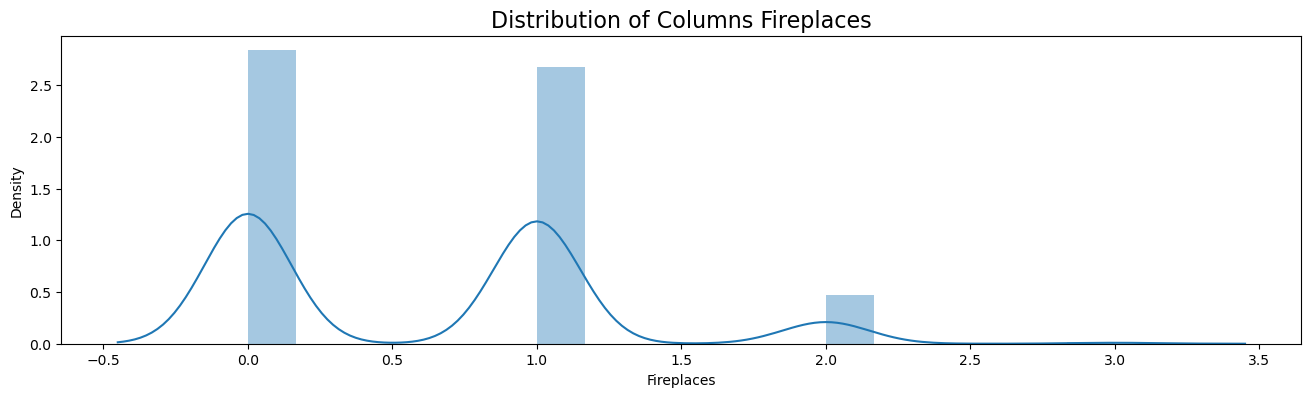

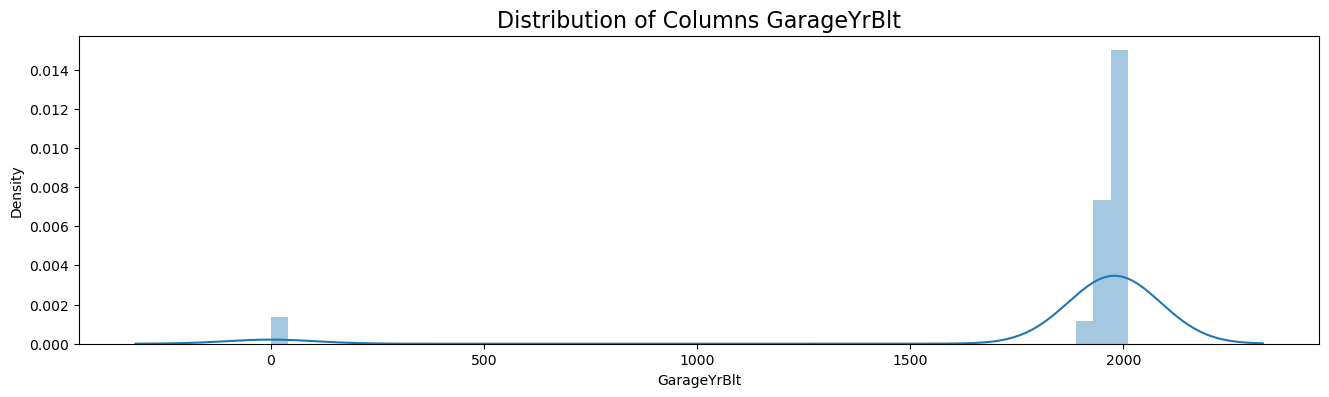

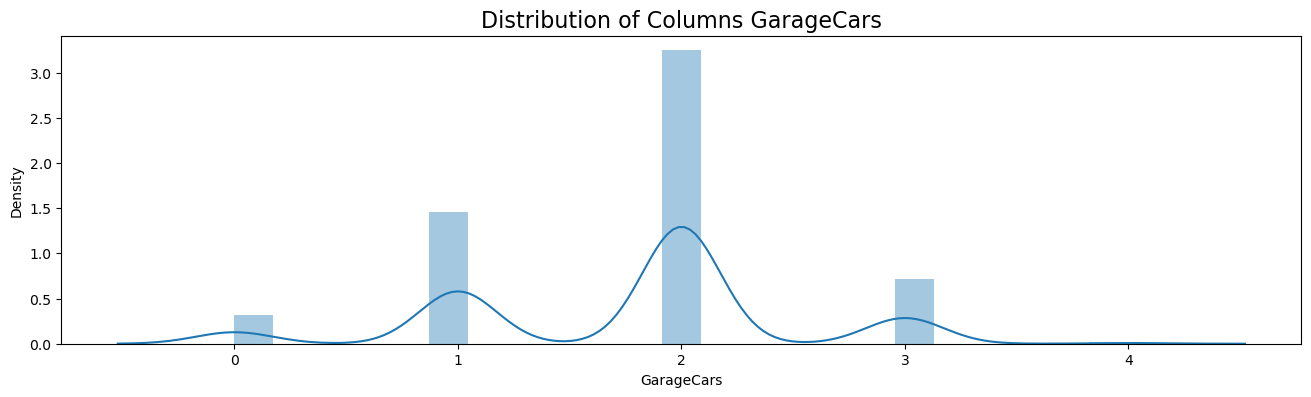

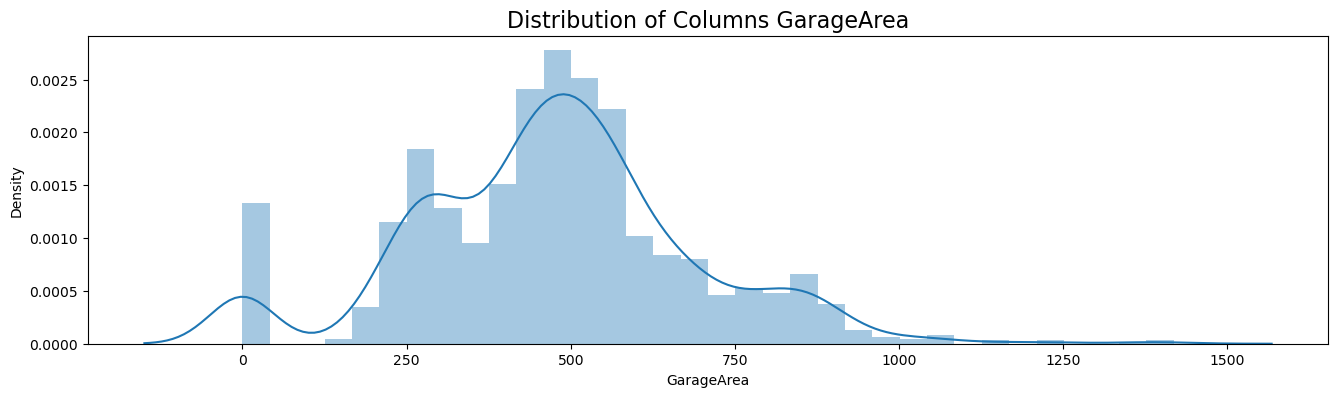

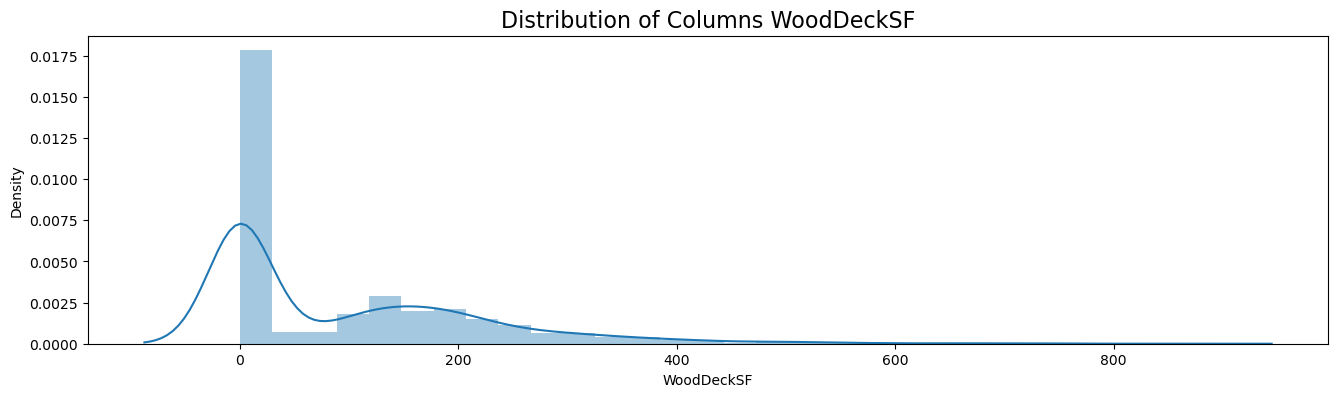

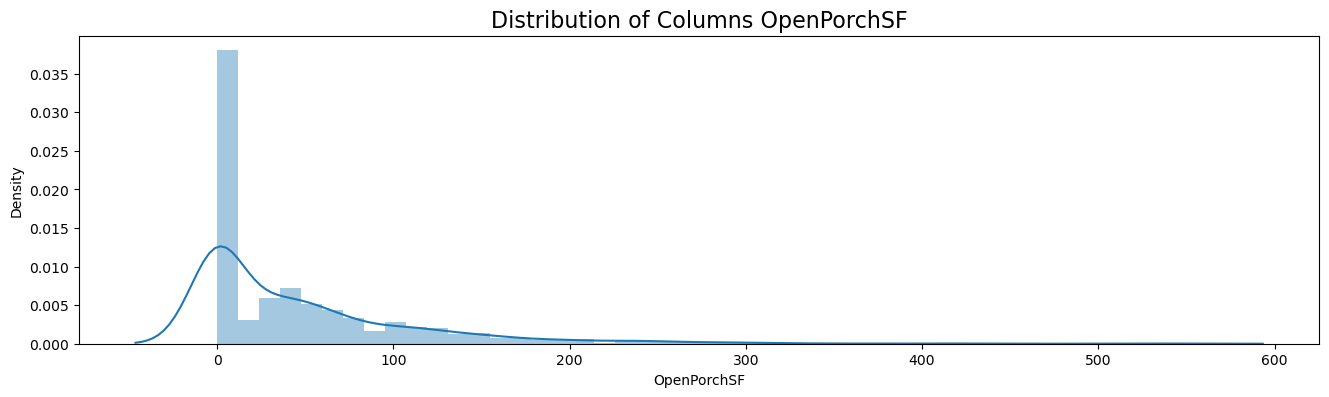

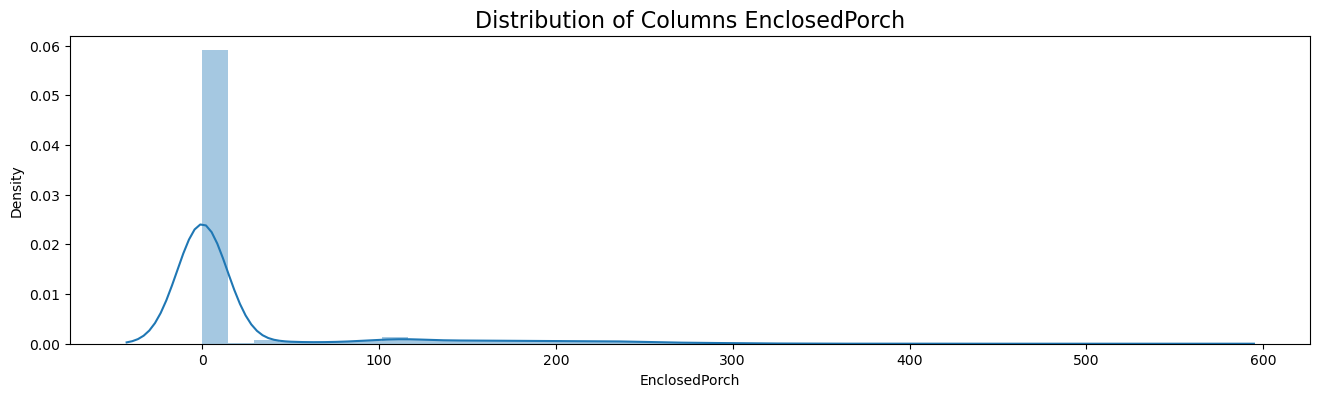

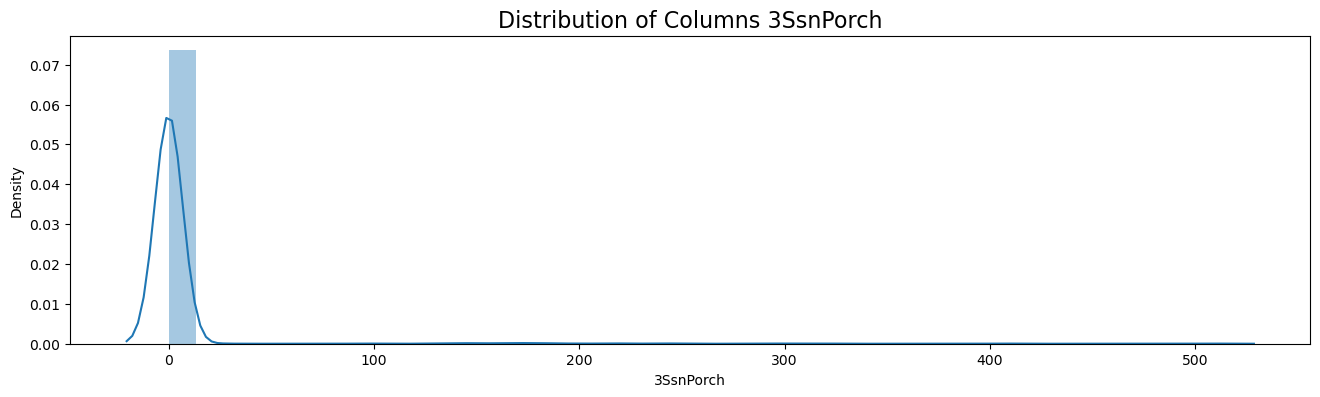

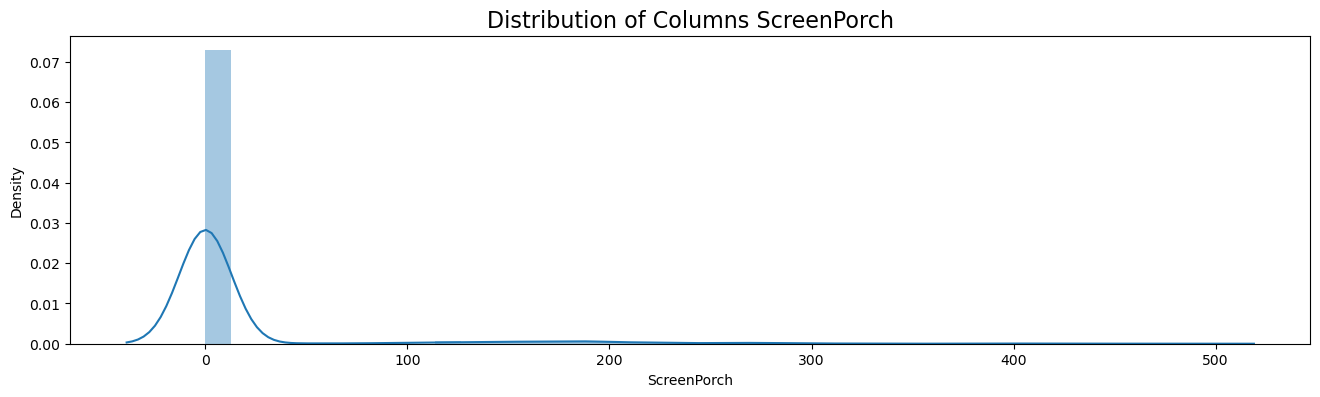

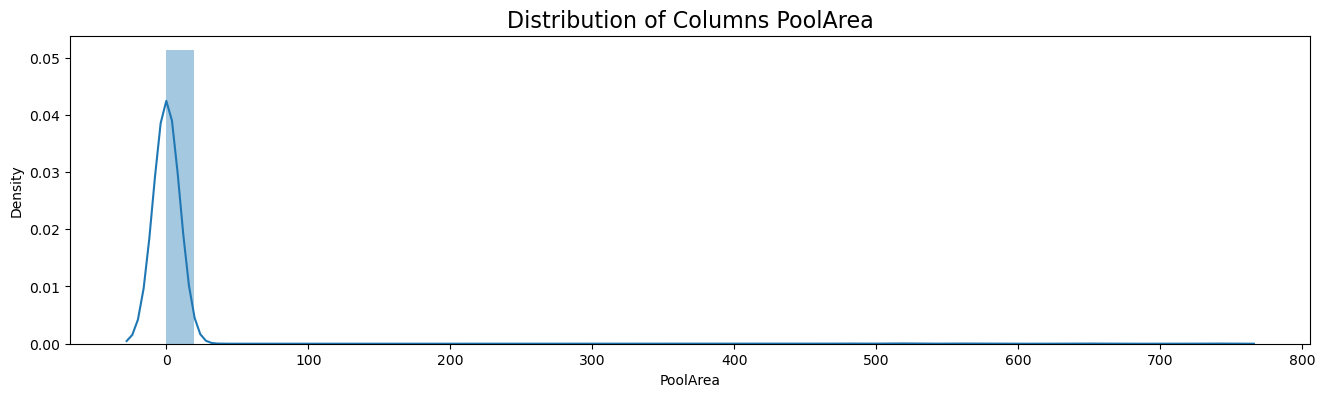

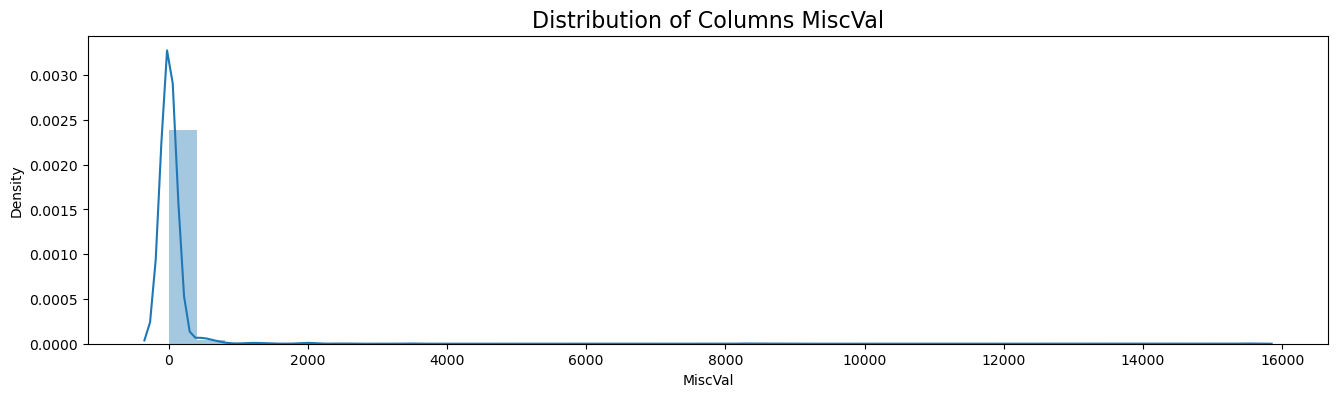

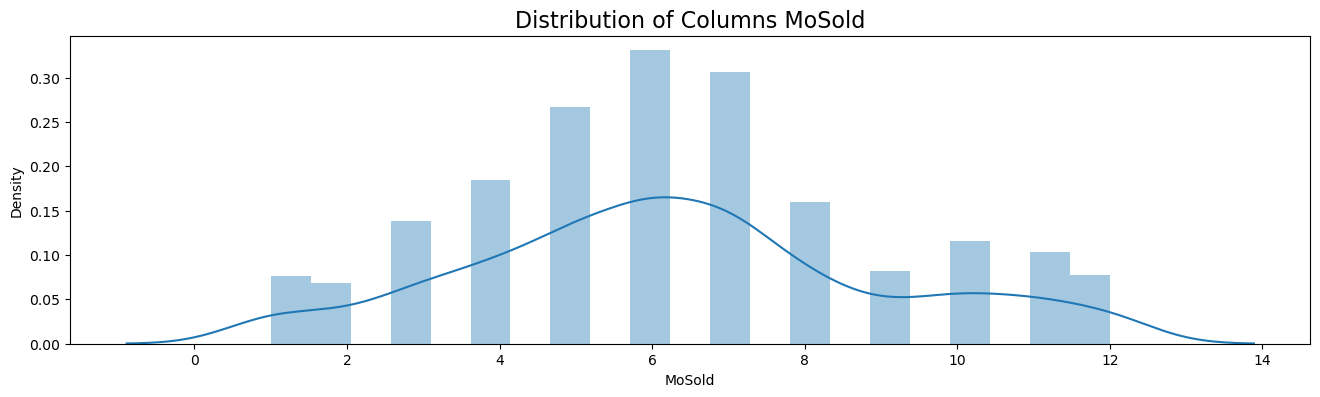

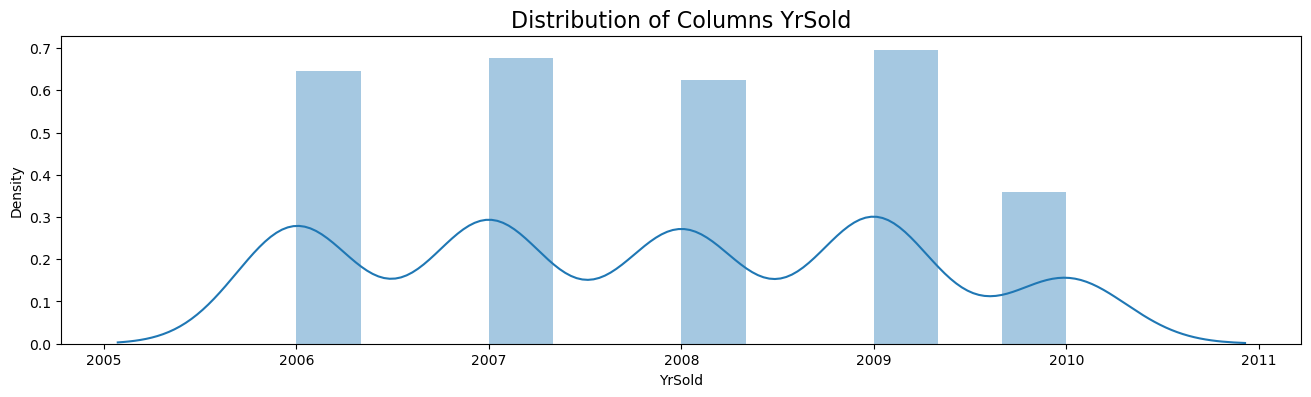

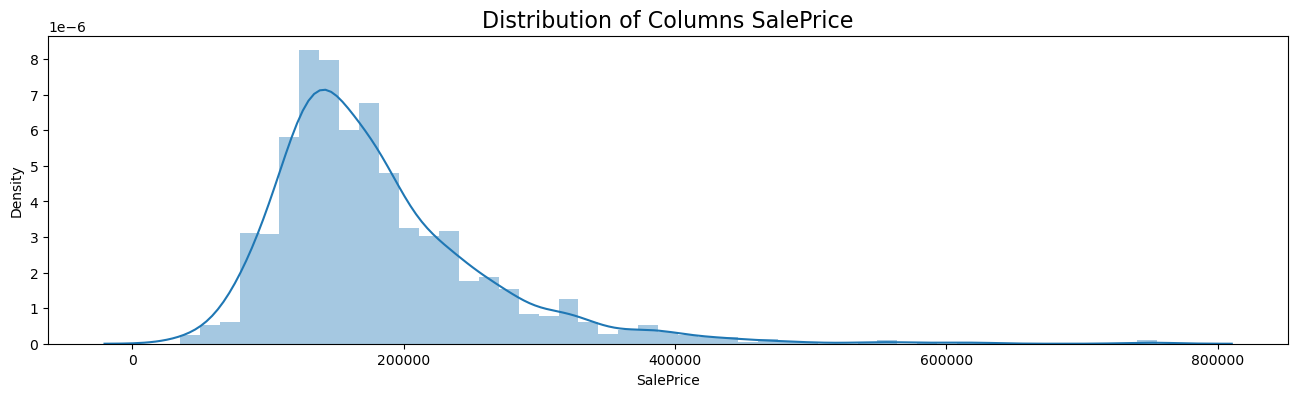

In [21]:
# Checking Continous columns distribution - column count 34
for x in range(1,int(len(num_cols)+1)):
  fig,axes=plt.subplots()
  sns.distplot(housing_df[num_cols[x-1]])
  axes.set_title('Distribution of Columns '+num_cols[x-1],fontdict={'fontsize':16})
  fig.set_figheight(4)
  fig.set_figwidth(16)
plt.show()

## Multivariate analysis with Sales Price

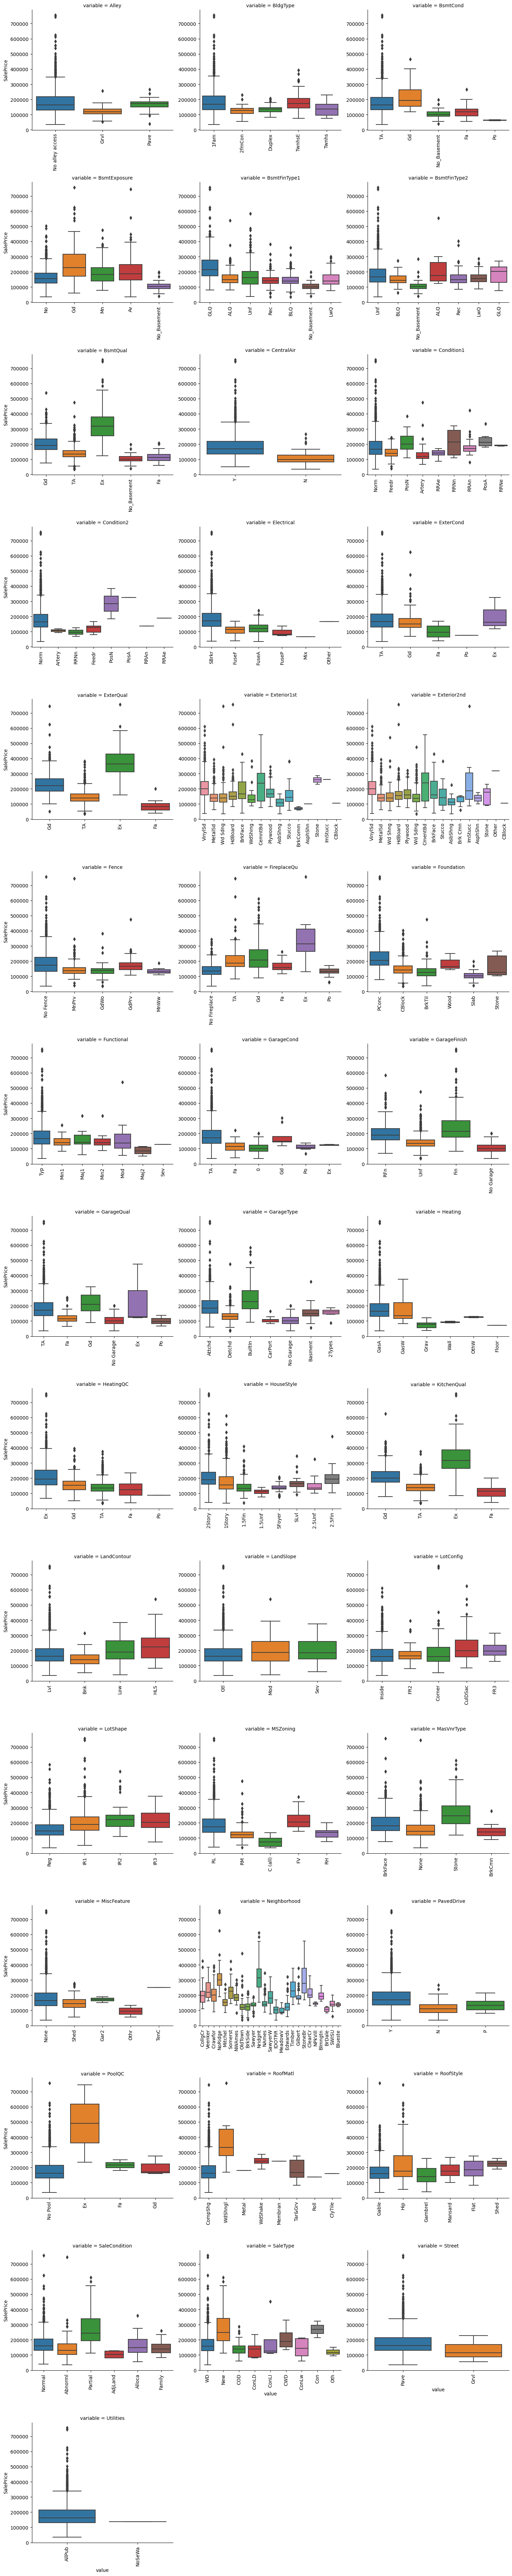

In [22]:
# Plotting Categorical Variables with Sale Price
def create_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=sorted(housing_df[cat_cols]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(create_boxplot, "value", "SalePrice")
plt.show()

## Insights : 
There are outliers which we need to handle. 
Also following are observations:

- Paved alleys properties demand a higher sale price.
- Houses with good and excellent basement quality have high sale prices.
- Houses with good and excellent garages have high sale prices compared to others.
- Houses with good quality kitchens also has positive impact on sale price.
- Houses with new Sale Type have high sale prices.

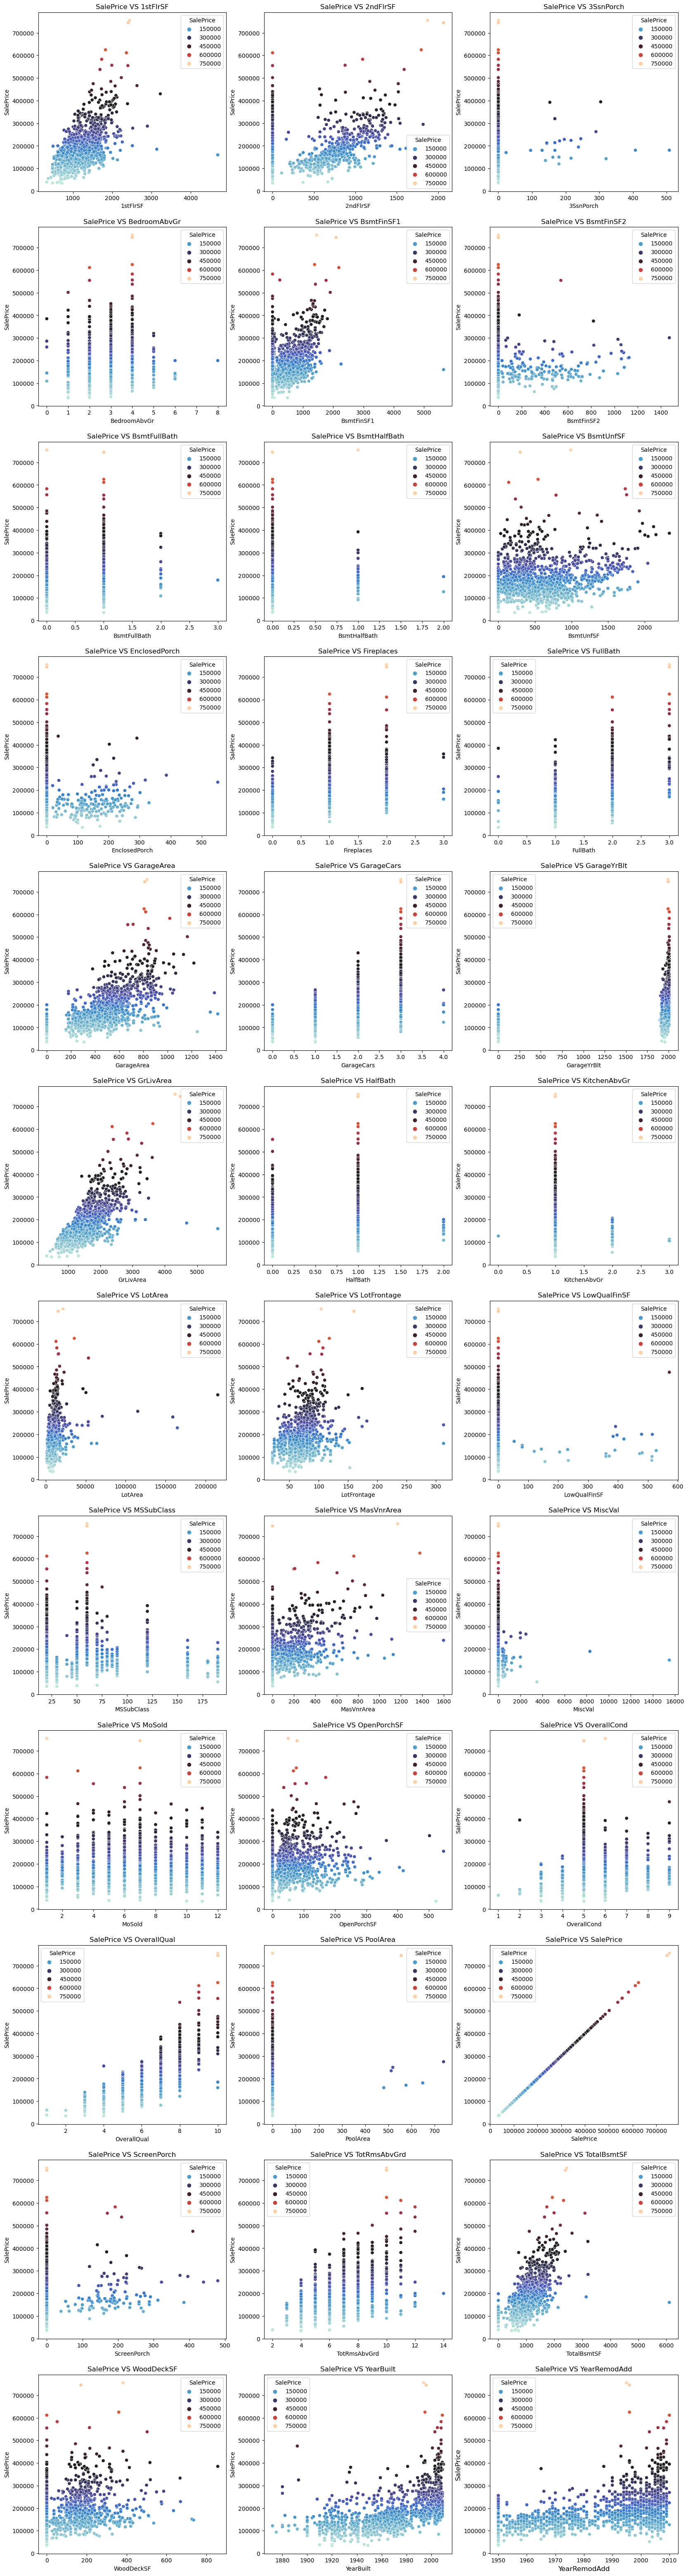

In [23]:
#Plotting Numerical Variables with Sale Price
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(housing_df[sorted(num_cols)].columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=housing_df[num_cols],ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))
plt.show()

## Insights:
Following are observations:

- GRLiving Area has a direct corelation with the Sale Price.
- Total basement area has a direct corelation with the Sale Price.

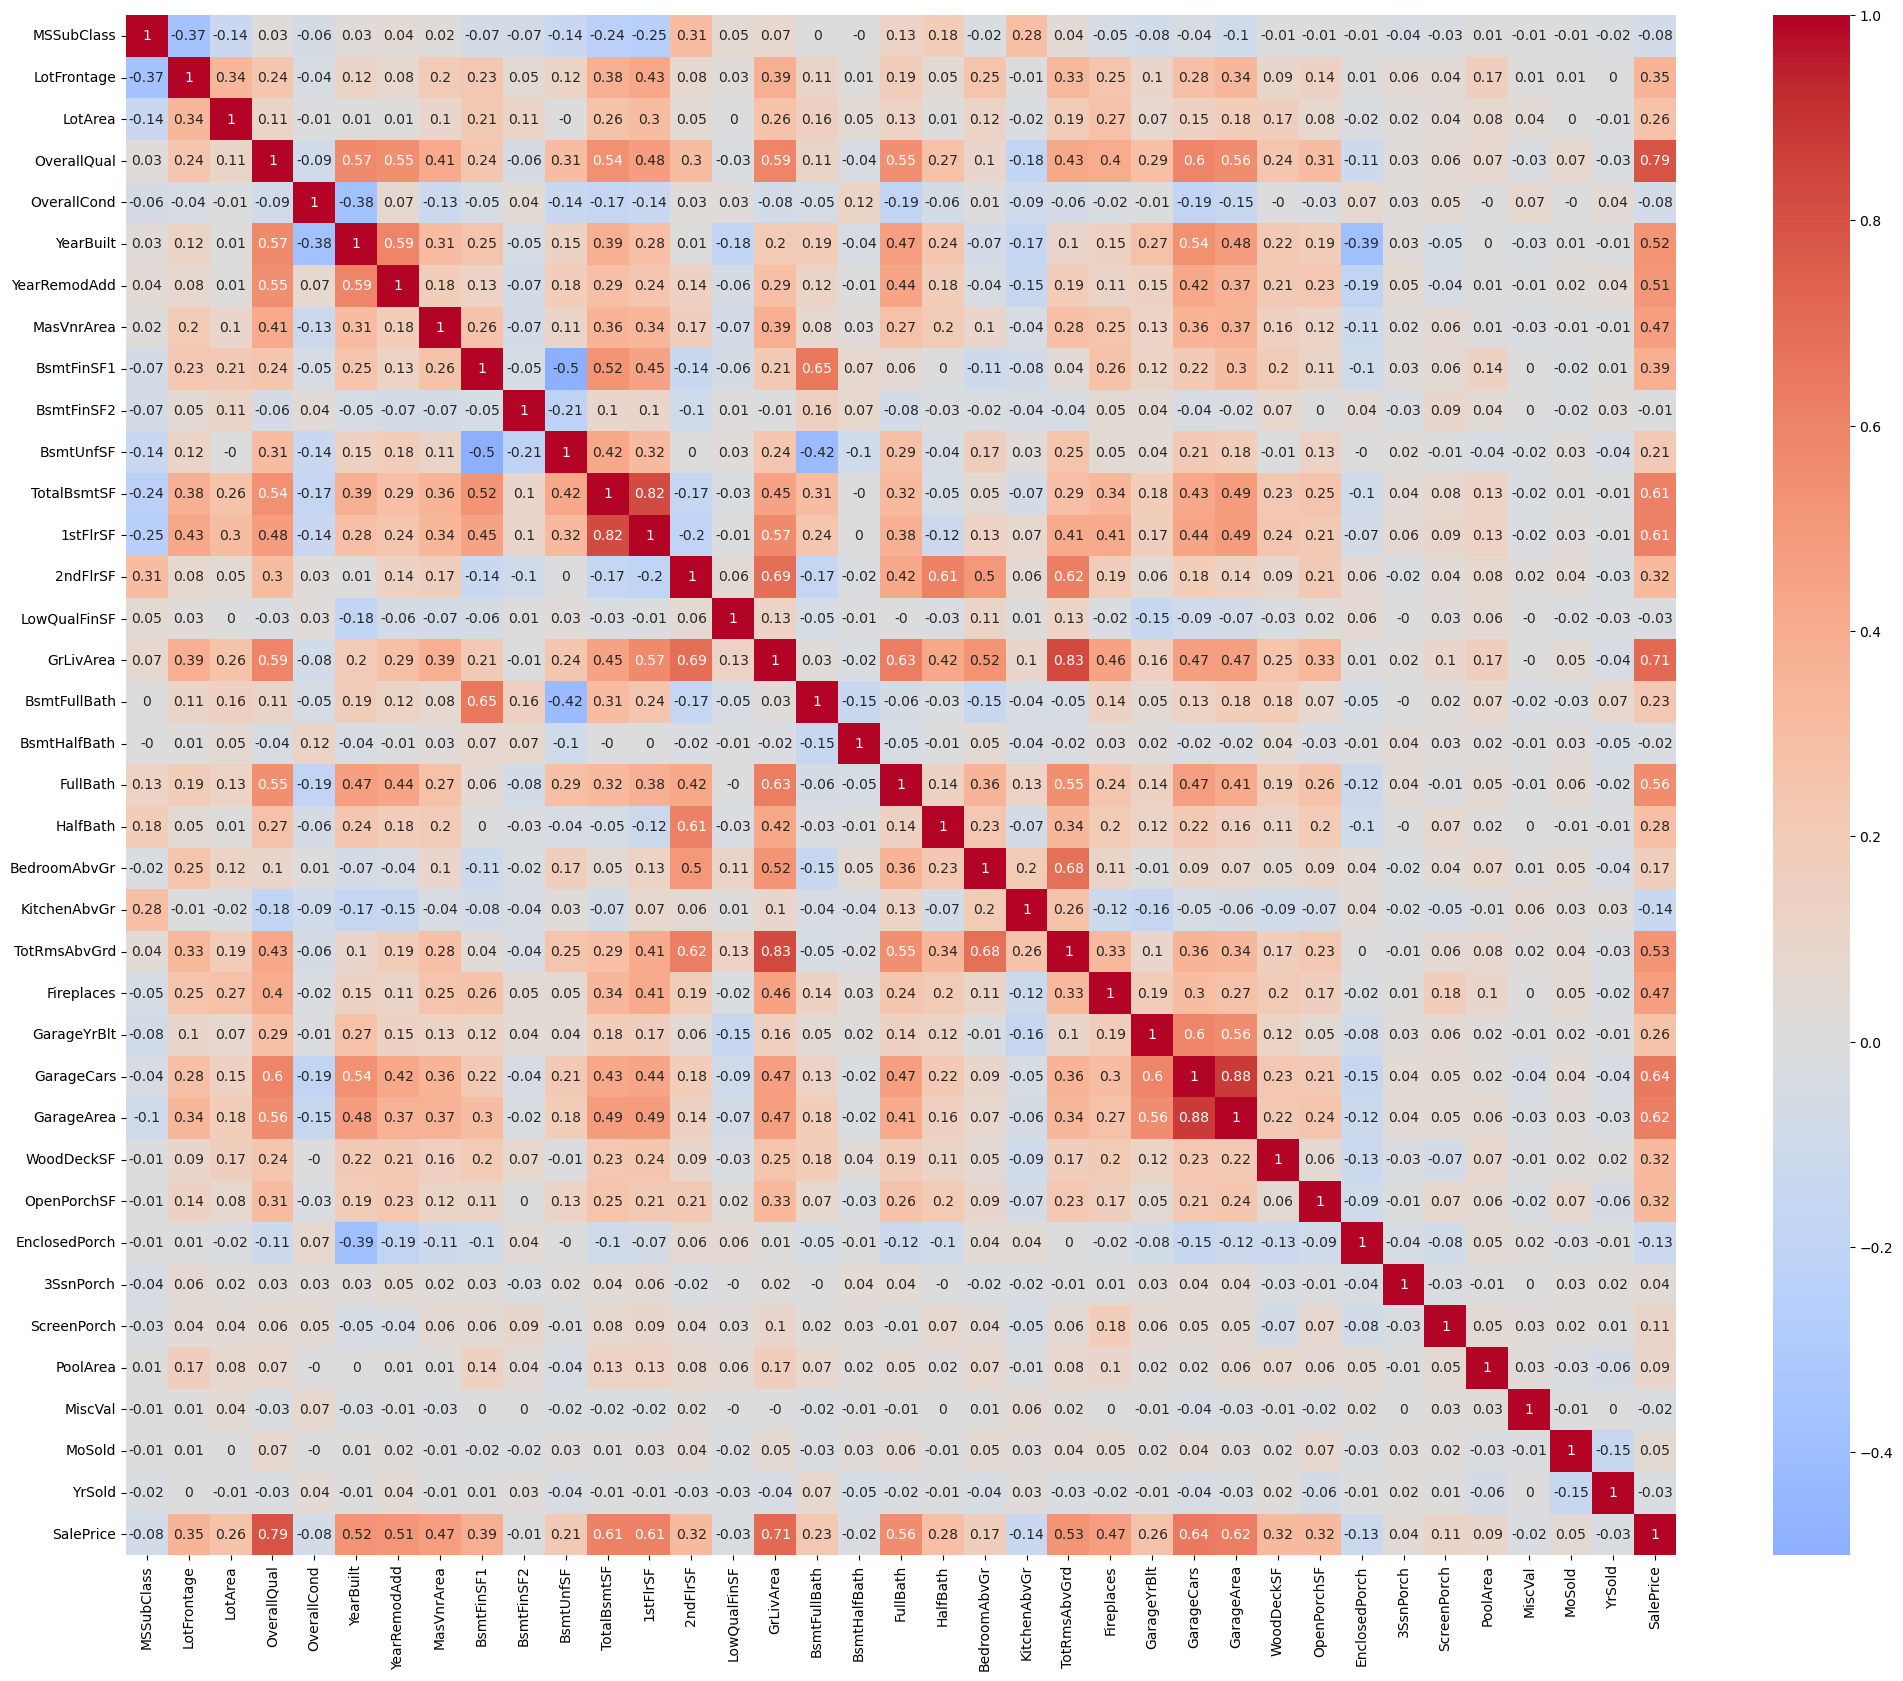

In [24]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of Numerical variables
sns.heatmap(round(housing_df.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

## Insights: 

The heatmap shows some useful insights:

Correlation of SalesPrice with independent variables:

- SalesPrice is highly (positively) correlated with GarageCars,GarageArea,GrLivArea,OverallQual,TotalBsmtSF, 1stFlrSF,FullBath,TotRmsAbvGrd

- SalesPrice is also negatively correlated but it doesn;t seems significant as of now.

Correlation among independent variables:

Many independent variables are highly correlated : BsmtFinSF1, BsmtFullBath, GarageCars, GarageArea etc. and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).


We have low co-related variables to each other , we need to remove them.

## Data Preparation

In [25]:
# Age of property plays a significant role in general , as we don't have any such direct variable lets create it

housing_df['house_age']=housing_df['YrSold']-housing_df['YearBuilt']
housing_df['garage_age'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
housing_df['remodel_age'] = housing_df['YrSold'] - housing_df['YearRemodAdd']


In [26]:
# Below Numeric should be Categorical hence converting their data types
housing_df[['MSSubClass']] = housing_df[['MSSubClass']].astype(str) 
housing_df['YrSold'] = housing_df['YrSold'].astype(str)
housing_df['MoSold'] = housing_df['MoSold'].astype(str)

In [27]:
# Step: Checking the count of toal numerical and categorical columns in loan.csv
num_cols=[col for col in housing_df if housing_df[col].dtype!='object']
cat_cols=[col for col in housing_df if housing_df[col].dtype=='object']
print("Numerical Columns = ",num_cols)
print("Categorical Columns = ",cat_cols)
print('Total number of numeric Columns: {}'.format( len(num_cols)))
print('Total number of categorical Columns: {}'.format( len(cat_cols)))

Numerical Columns =  ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'house_age', 'garage_age', 'remodel_age']
Categorical Columns =  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Fun

In [28]:
housing_df.shape

(1460, 83)

In [29]:
#Outer fences for variables from Box Plot
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

for var in sorted(num_cols):
    outer_fence_le, outer_fence_ue = fences(housing_df, var)
    print("For Variable : ",var,"\n")
    print('Lower end outer fence: ', outer_fence_le)
    print('Upper end outer fence: ', outer_fence_ue)
    #Explore different quantiles at the upper end
    print('90% quantile:   ', housing_df[var].quantile(0.90))
    print('92.5% quantile: ', housing_df[var].quantile(0.925))      
    print('95% quantile:   ', housing_df[var].quantile(0.95))      
    print('97.5% quantile: ', housing_df[var].quantile(0.975))      
    print('99% quantile:   ', housing_df[var].quantile(0.99))      
    print('99.9% quantile: ', housing_df[var].quantile(0.999))  
    print("\n\n")


For Variable :  1stFlrSF 

Lower end outer fence:  -645.75
Upper end outer fence:  2919.0
90% quantile:    1680.0
92.5% quantile:  1725.15
95% quantile:    1831.2499999999998
97.5% quantile:  2024.199999999999
99% quantile:    2219.4600000000005
99.9% quantile:  3186.690000000015



For Variable :  2ndFlrSF 

Lower end outer fence:  -2184.0
Upper end outer fence:  2912.0
90% quantile:    954.2000000000003
92.5% quantile:  1042.3000000000002
95% quantile:    1141.05
97.5% quantile:  1278.6249999999993
99% quantile:    1418.920000000001
99.9% quantile:  1847.214000000009



For Variable :  3SsnPorch 

Lower end outer fence:  0.0
Upper end outer fence:  0.0
90% quantile:    0.0
92.5% quantile:  0.0
95% quantile:    0.0
97.5% quantile:  0.0
99% quantile:    168.0
99.9% quantile:  367.06700000001456



For Variable :  BedroomAbvGr 

Lower end outer fence:  -1.0
Upper end outer fence:  6.0
90% quantile:    4.0
92.5% quantile:  4.0
95% quantile:    4.0
97.5% quantile:  4.0
99% quantile:    5.

## Using Winsorisation
Winsorizing was introduced by Tukey & McLaughlin in 1963 and is often recommended in research papers (e.g., 2013 or 2019) dealing with outlier treatment. With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively. 
Compared to trimming, winsorizing is a less extreme option by recoding outliers rather than cutting them altogether.

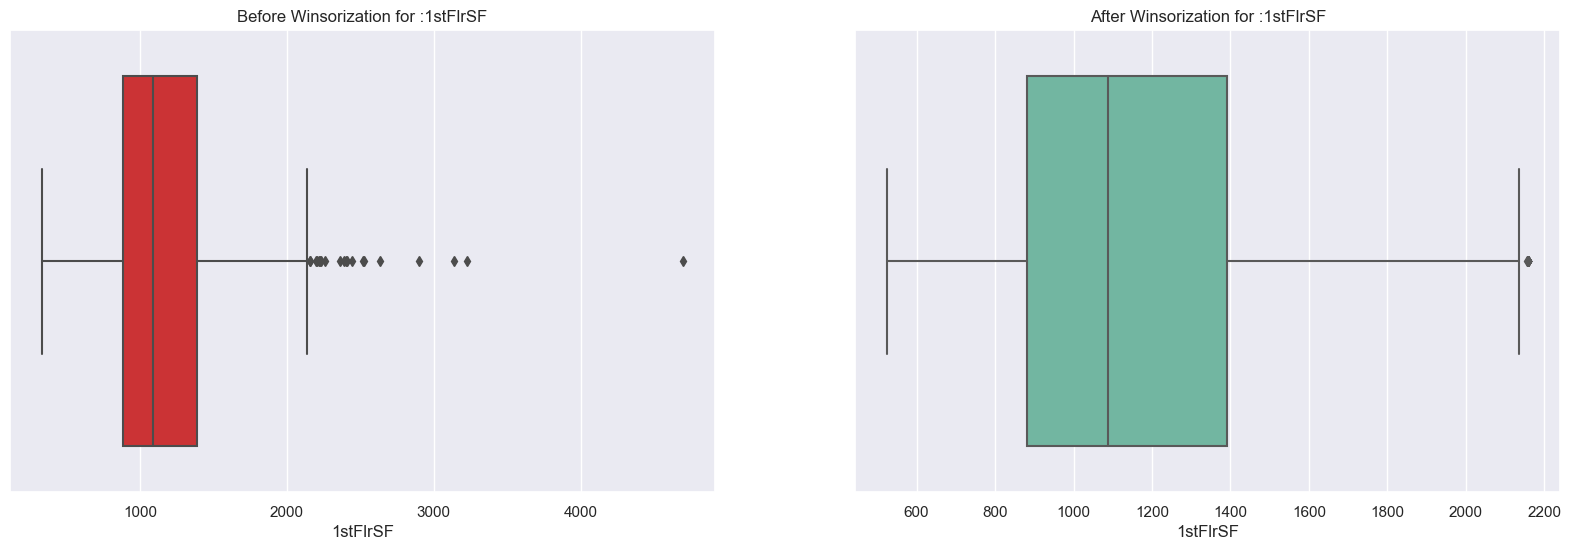

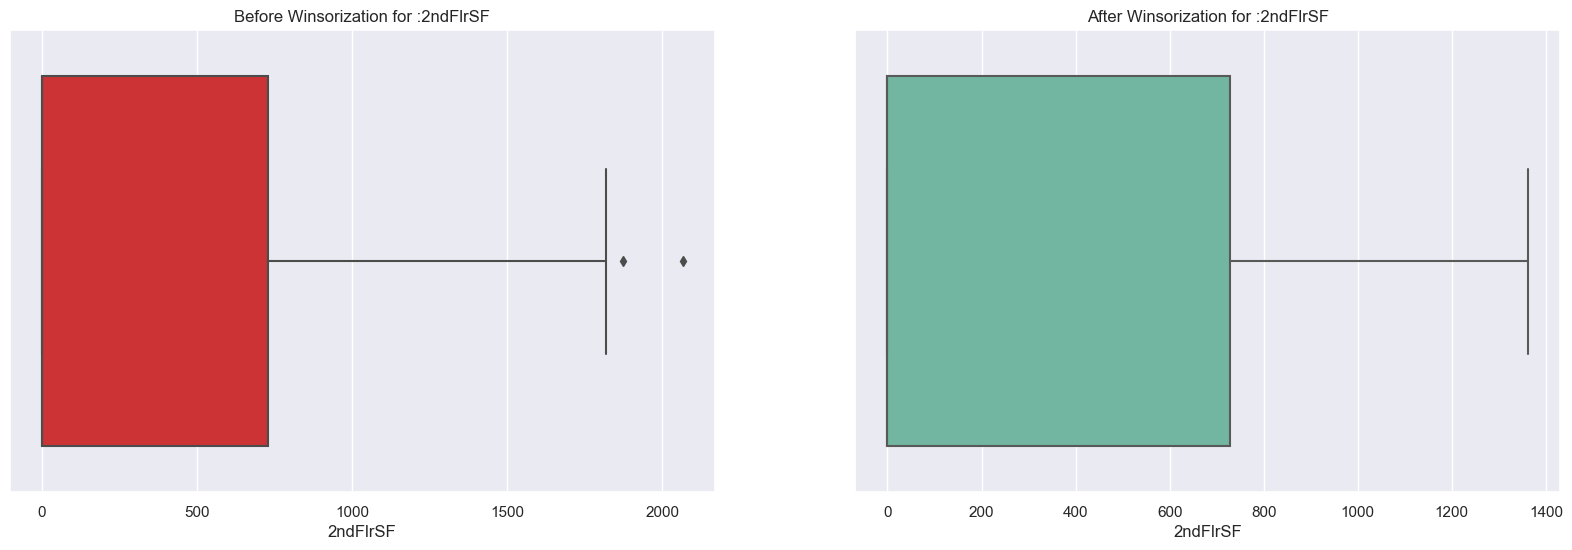

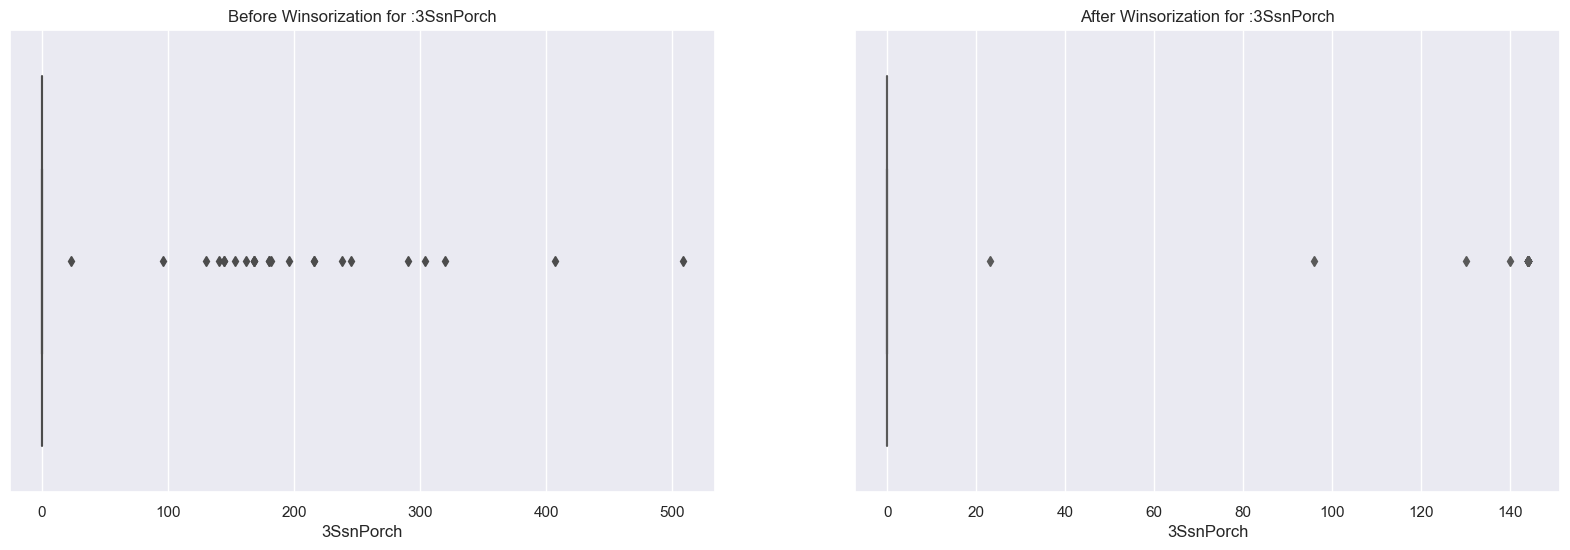

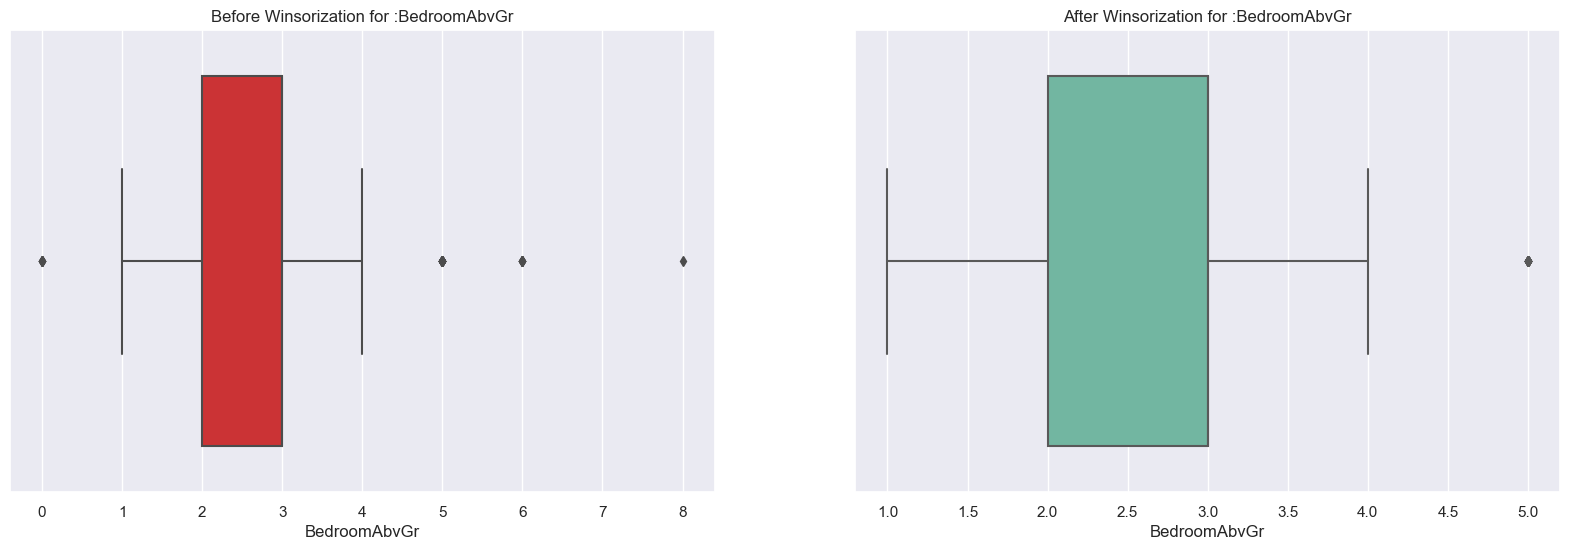

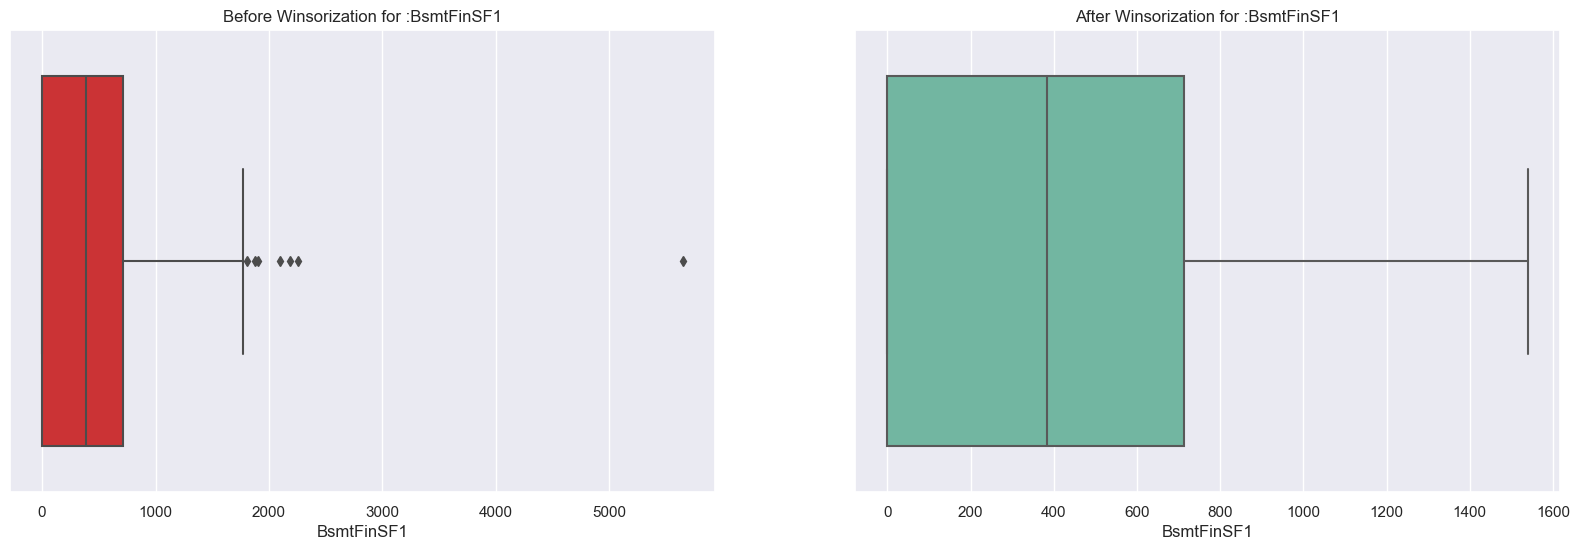

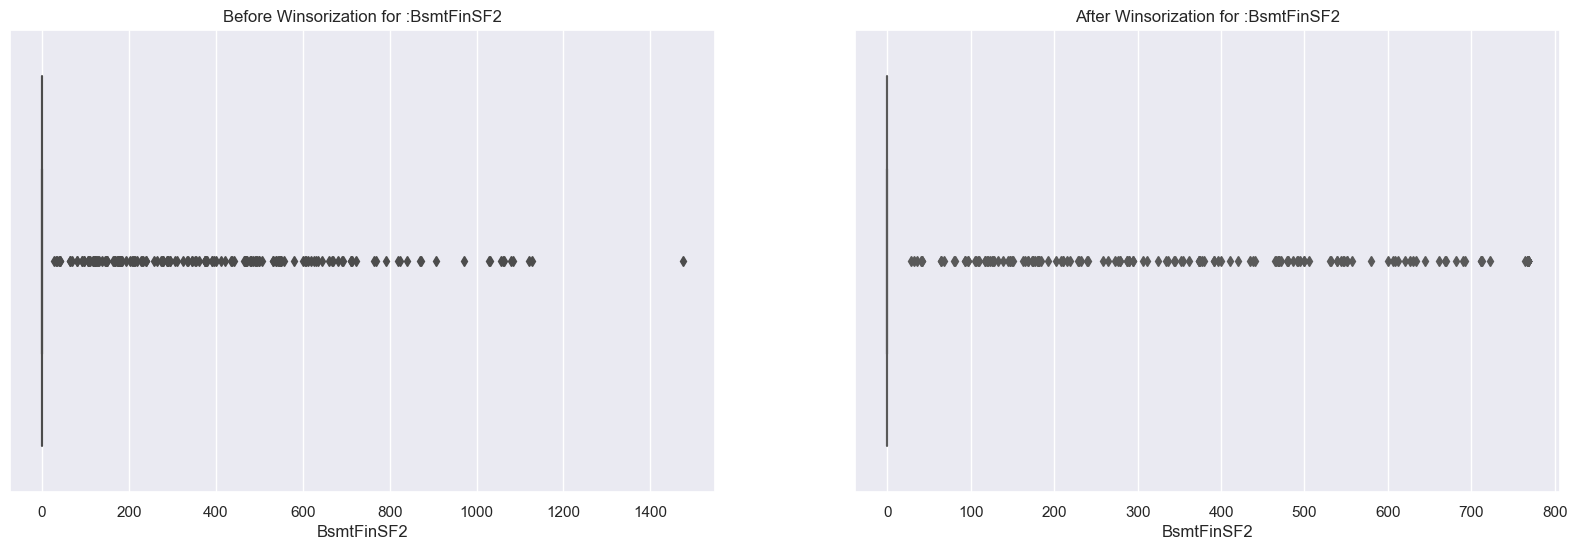

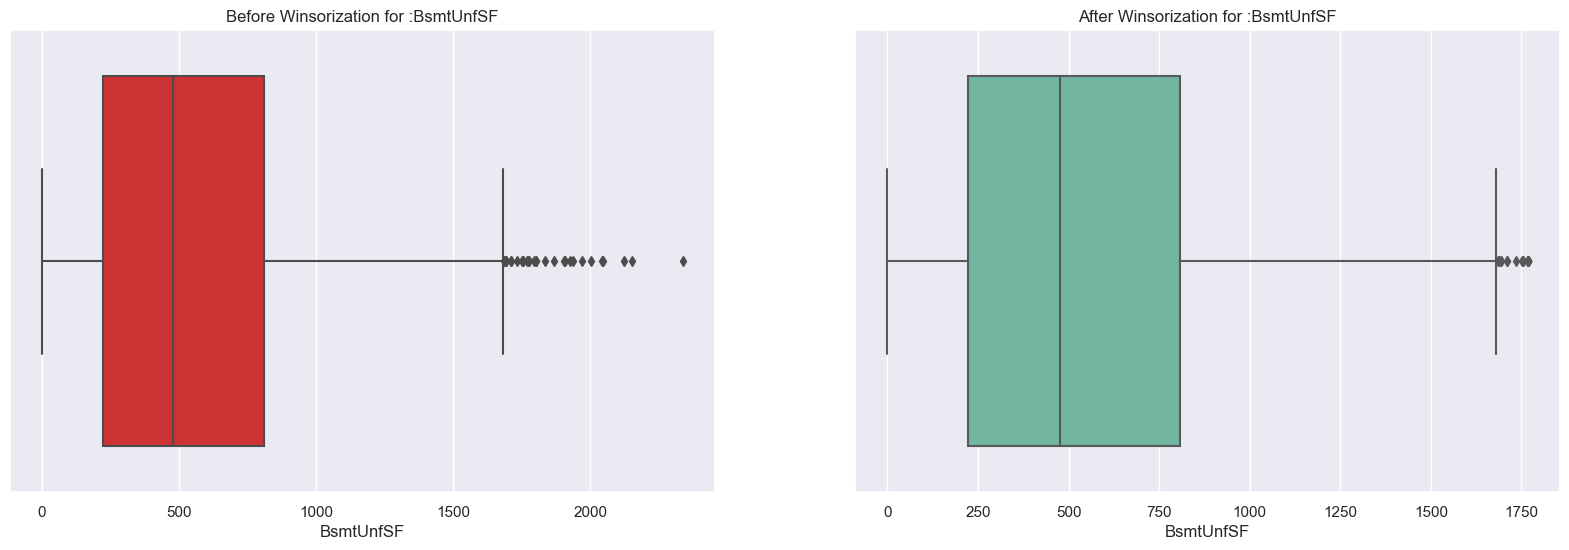

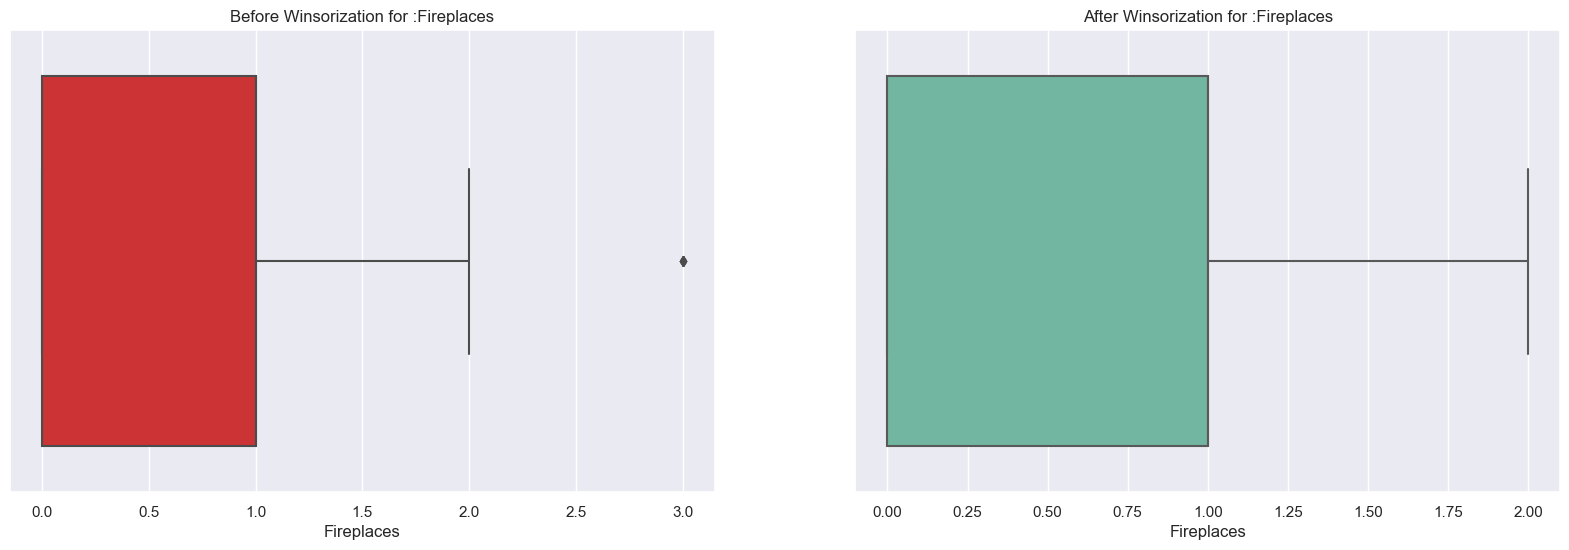

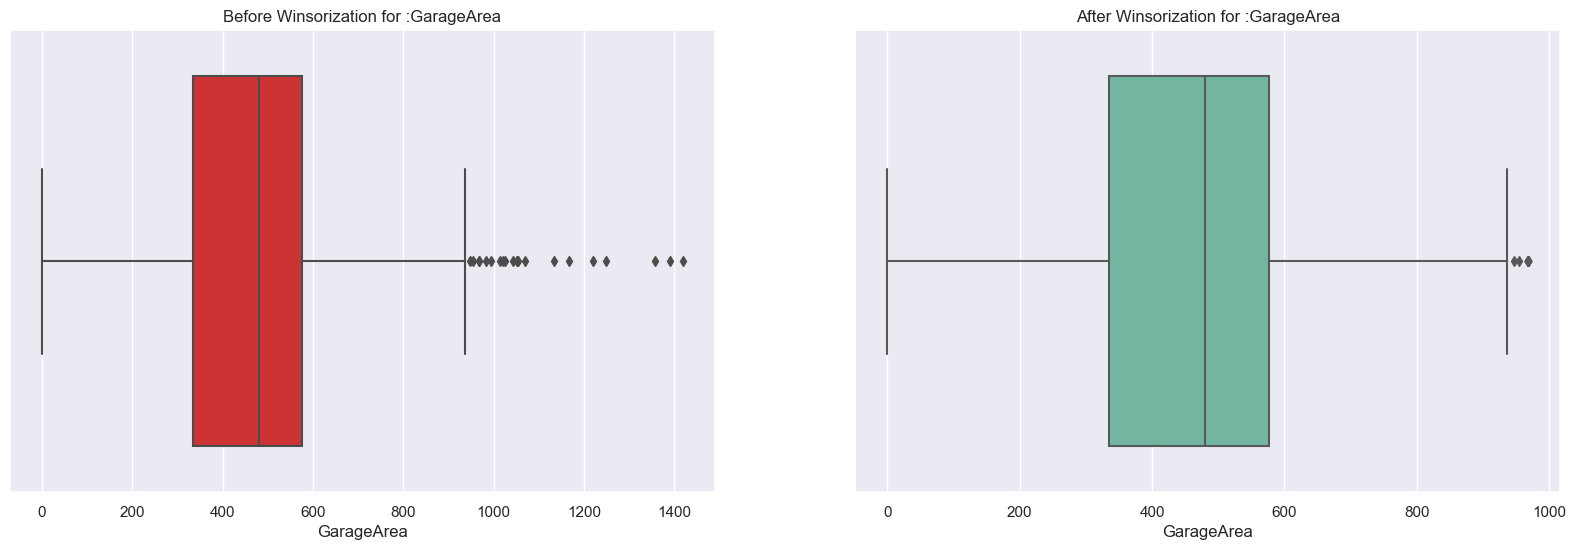

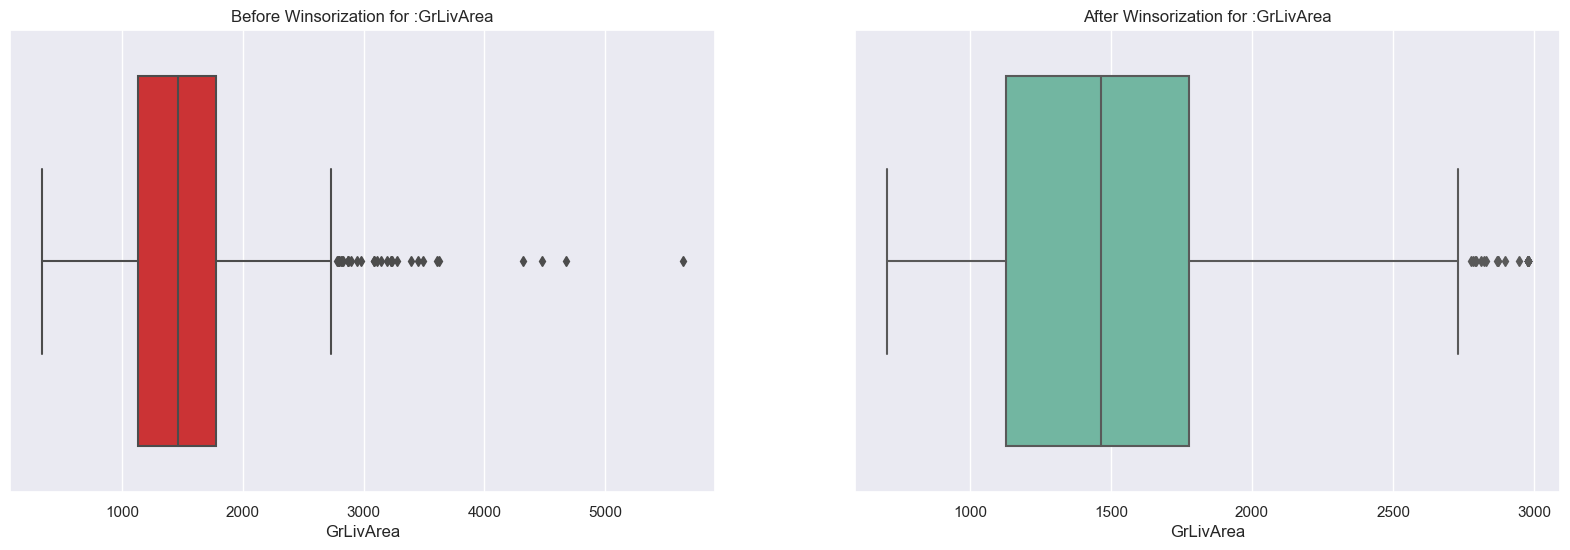

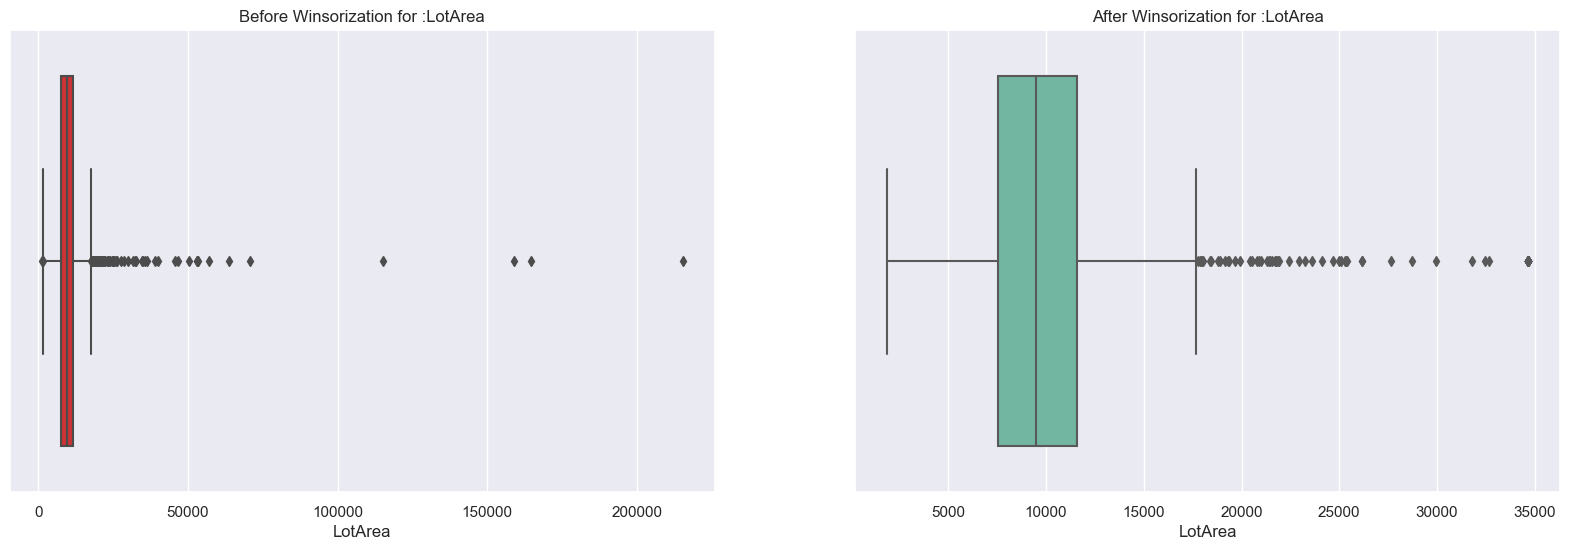

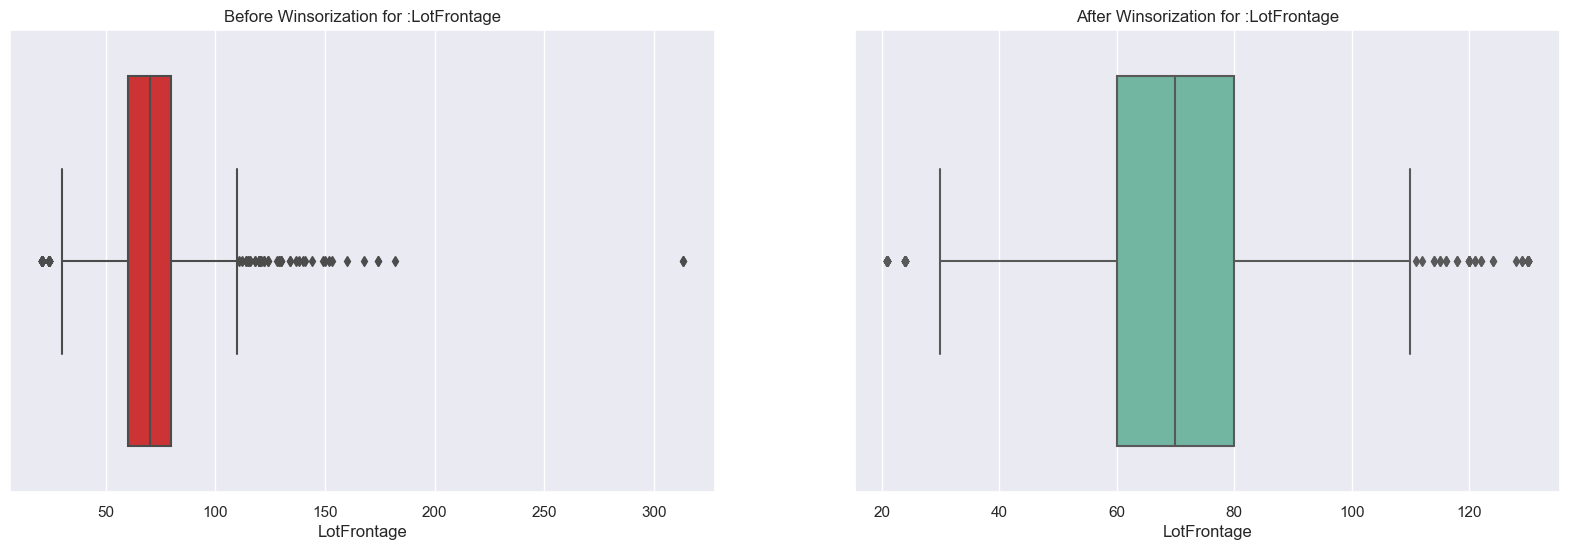

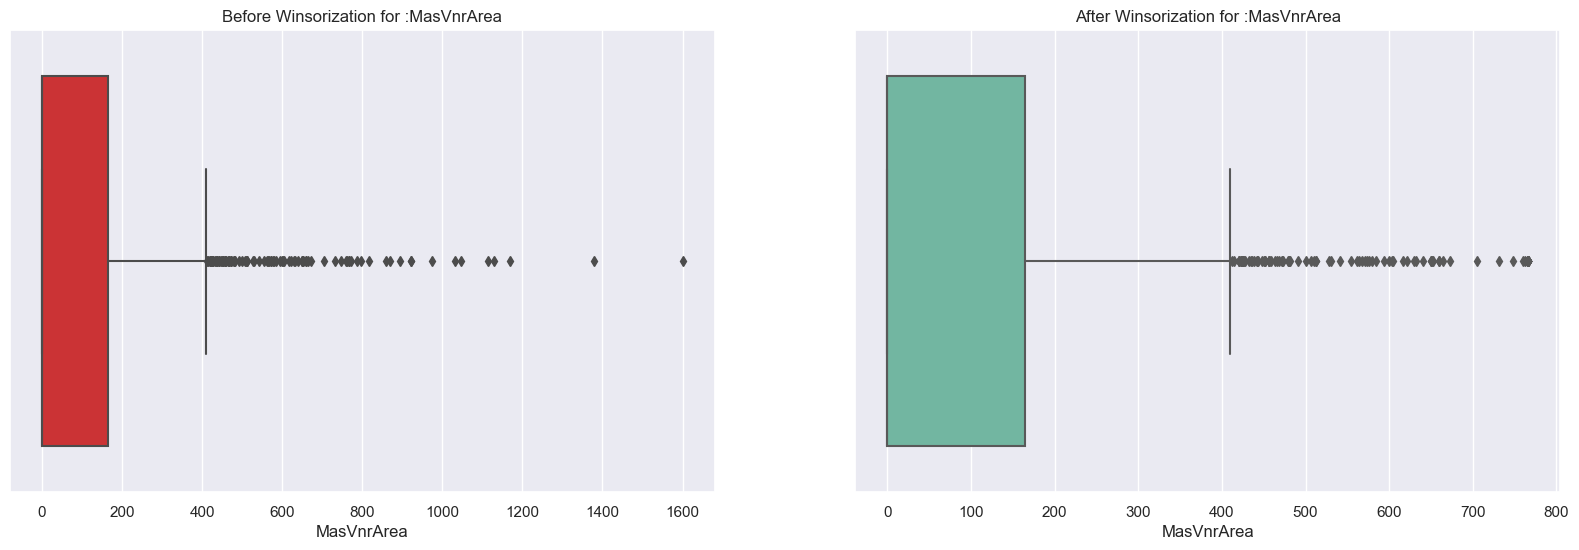

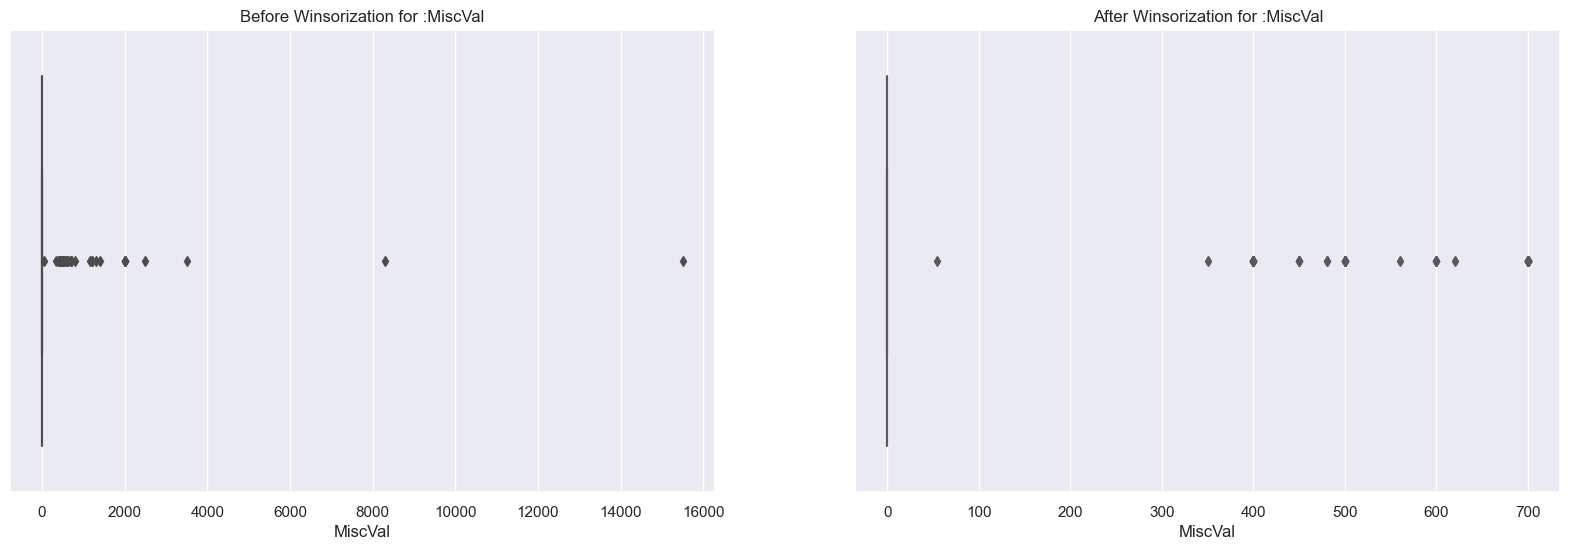

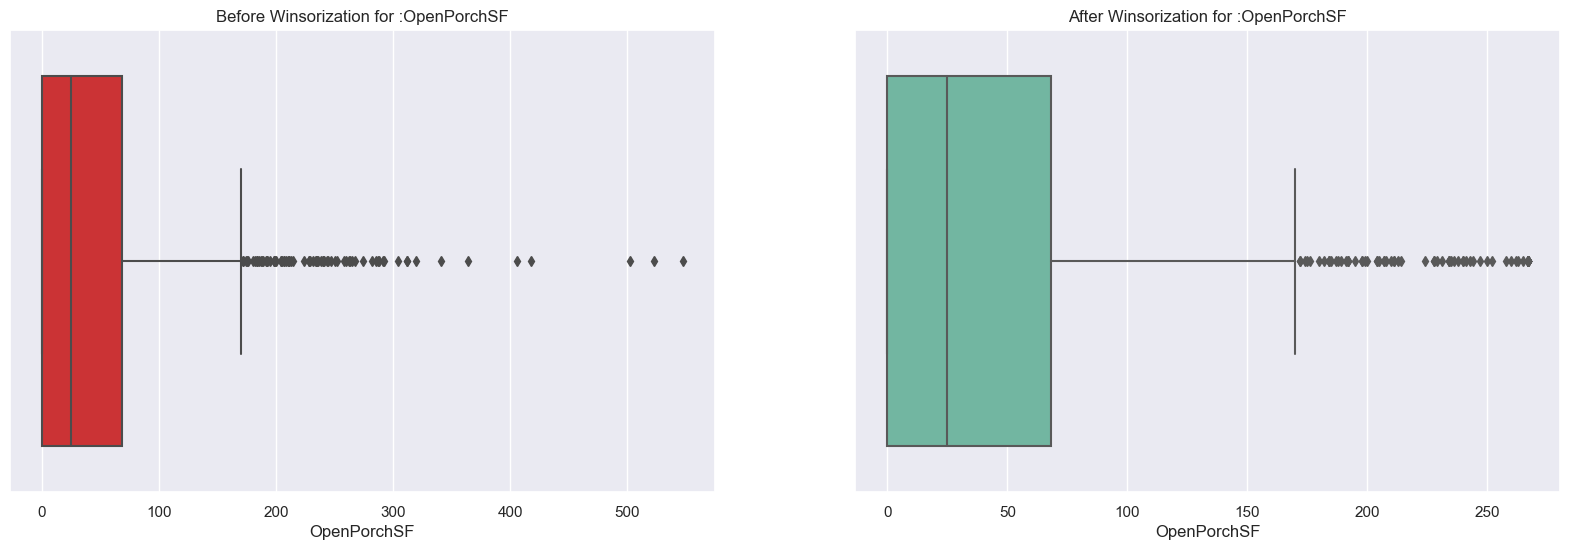

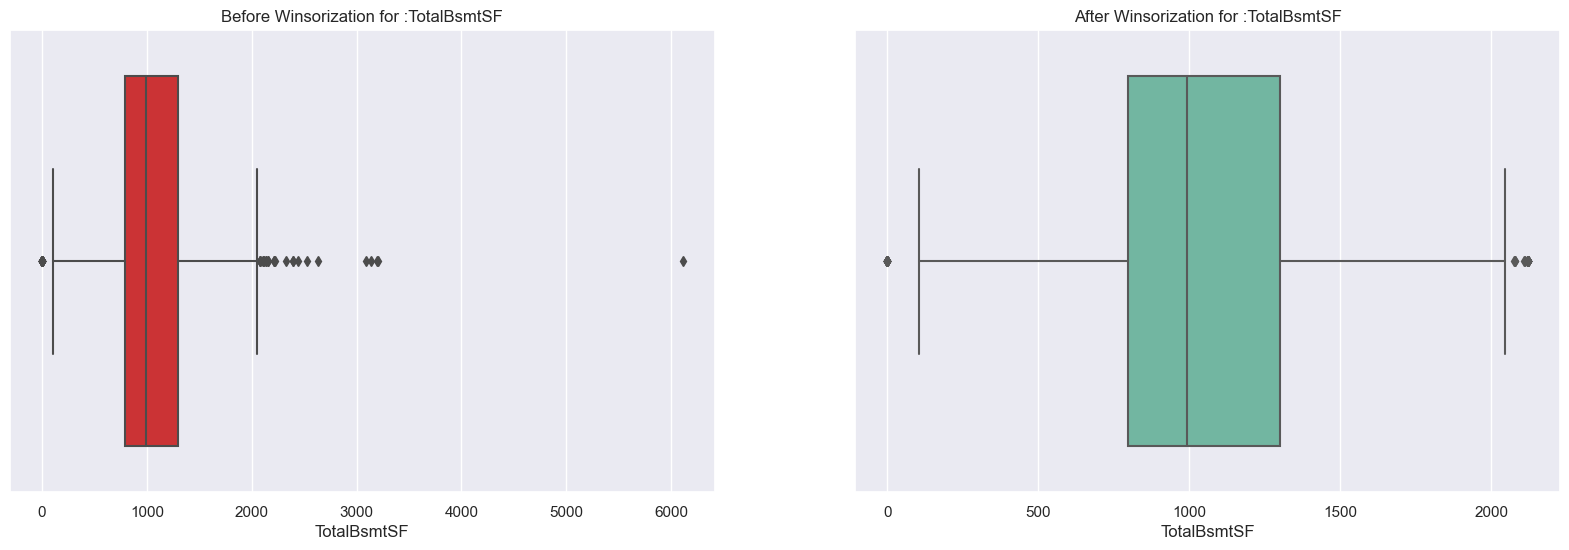

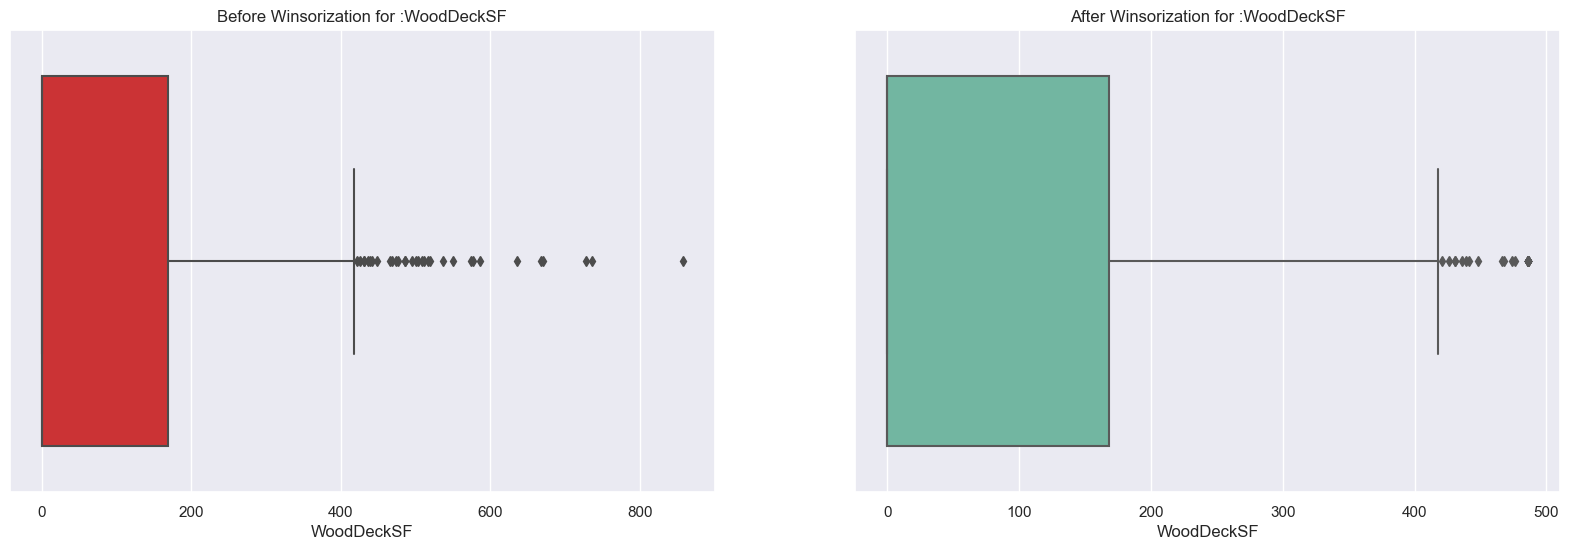

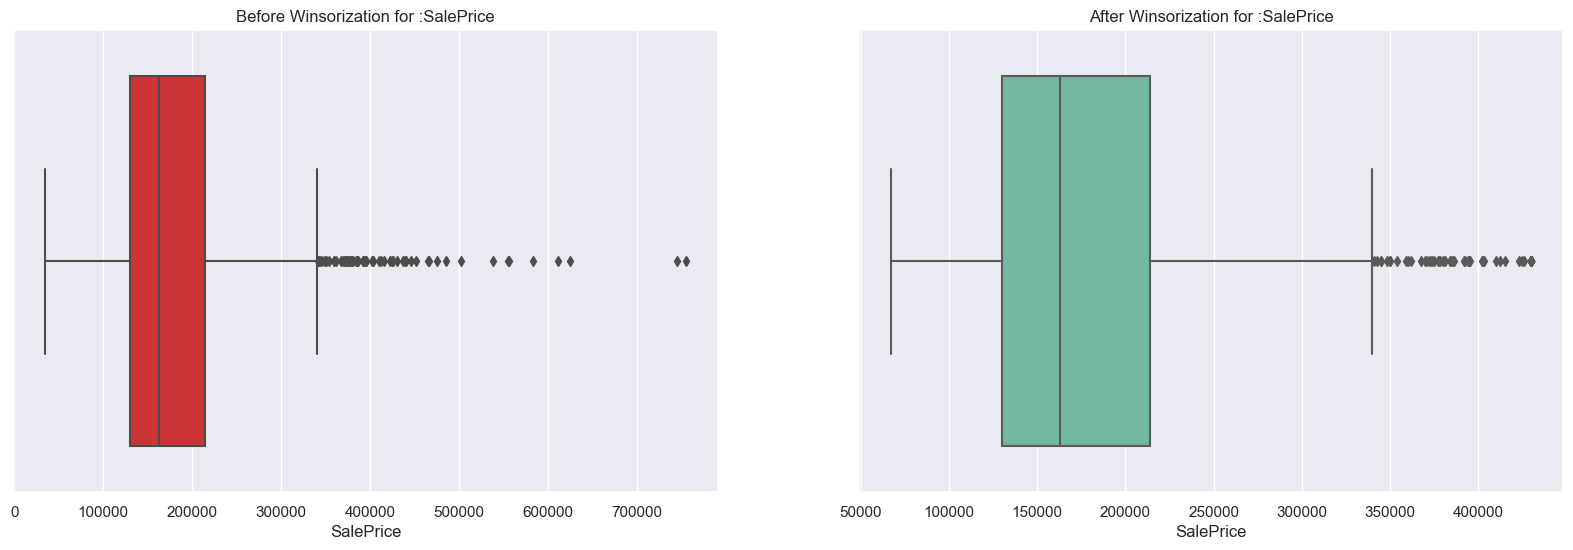

In [30]:
# From above we can our own list which can be identified as outliers
# A percentage point close to the outer fence is considered best practice
# The 1% of the lowest value and the 1% of the highest values are replaced.

out_list=['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Fireplaces','GarageArea','GrLivArea','LotArea','LotFrontage',
'MasVnrArea','MiscVal','OpenPorchSF','TotalBsmtSF','WoodDeckSF','SalePrice']


# Lets try after winsonisation how data looks

housing_df2 = pd.DataFrame(housing_df[out_list].apply(lambda x: winsorize(x, limits=[0.0125, 0.0125]))) 

#housing_df[out_list] = housing_df[out_list].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))


    


# Visualizing a Box Plot before and after Winsorization
for x in out_list:
  sns.set(rc={'figure.figsize':(20,6)}) 
  fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True) #Put 2 Plots side by side
  plt1 = sns.boxplot(x = housing_df[x], palette = "Set1", ax = ax1).set(title='Before Winsorization for :'+x)
  plt2 = sns.boxplot(x = housing_df2[x], palette = "Set2", ax = ax2).set(title='After Winsorization for :'+x)
  #fig.set_figheight(4)
  #fig.set_figwidth(20)
plt.show()


In [31]:
# Lets now implement it in actual df
housing_df[out_list] = housing_df[out_list].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

In [32]:
housing_df.shape

(1460, 83)

## Dummy variable Creation

#Before that do following:
## Feature Redundancy

In [33]:
# We have count of these as Categorical variables so far
#Categorical Columns (cat_cols) =  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
# But we see a scope we can remove some of them from this list 

print(housing_df['Street'].value_counts())
print(housing_df['Utilities'].value_counts())
print(housing_df['PoolQC'].value_counts()) 
print(housing_df['PoolArea'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [34]:
#We can see there are very little observations which deviate from maximum occured vales in above variables
#Removing redundant features
def red_feature(housing_df):
    red= []
    for i in housing_df.columns:
        counts = housing_df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(housing_df) * 100 > 99:
            red.append(i)
    red = list(red)
    return red

red_features = red_feature(housing_df)
red_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [35]:
#Dropping such features
housing_df.drop(red_features,axis=1,inplace=True)

In [36]:
housing_df.shape

(1460, 79)

In [37]:
# Removing columns with correlation inside range of 0.5 to -0.5
corr=housing_df.corr().loc['SalePrice']
corr=corr[0:-1].dropna()
corr=pd.DataFrame(corr.values,corr.index,columns=['correlation'])
corr=corr[(corr.correlation<0.5) & (corr.correlation>(-0.5))]
housing_df=housing_df.drop(corr.index,axis=1)

In [38]:
housing_df.shape

(1460, 56)

In [39]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'house_age', 'remodel_age'],
      dtype='object')

In [40]:
# Step: Checking the count of toal numerical and categorical columns in loan.csv
num_cols=[col for col in housing_df if housing_df[col].dtype!='object']
cat_cols=[col for col in housing_df if housing_df[col].dtype=='object']
print("Numerical Columns = ",num_cols)
print("Categorical Columns = ",cat_cols)
print('Total number of numeric Columns: {}'.format( len(num_cols)))
print('Total number of categorical Columns: {}'.format( len(cat_cols)))

Numerical Columns =  ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'house_age', 'remodel_age']
Categorical Columns =  ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Total number of numeric Columns: 13
Total number of categorical Columns: 43


In [41]:
# Dummy variables creation
housing_df3=pd.get_dummies(housing_df[cat_cols],drop_first=True)
housing_df=pd.concat([housing_df,housing_df3],axis='columns')
housing_df=housing_df.drop(cat_cols,axis=1)


In [42]:
housing_df.head(5)

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
Id                                                                           
1             7       2003          2003          856       856       1710   
2             6       1976          1976         1262      1262       1262   
3             7       2001          2002          920       920       1786   
4             7       1915          1970          756       961       1717   
5             8       2000          2000         1145      1145       2198   

    FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  house_age  \
Id                                                                         
1          2             8           2         548     208500          5   
2          2             6           2         460     181500         31   
3          2             6           2         608     223500          7   
4          1             7           3         642     140000         91   
5          2             9           3         836     250000          8   

    remodel_age  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                
1             5               0               0               0   
2            31               0               0               0   
3             6               0               0               0   
4            36               0               0               0   
5             8               0               0               0   

    MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                              
1               0              0              0              0              0   
2               1              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   

    MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
Id                                                                              
1               1              0              0              0              0   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              1              0              0              0   
5               1              0              0              0              0   

    MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                      
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
5               0            0            0            1            0   

    Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
Id                                                                  
1                       1           0             0             0   
2                       1           0             0             0   
3                       1           0             0             0   
4                       1           0             0             0   
5                       1           0             0             0   

    LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
Id                                                                    
1              1                0                0                1   
2              1                0                0                1   
3              0                0     

In [43]:
housing_df.shape

(1460, 261)

## 3. Model Building and Evaluation
## Test and Train Split


In [44]:
# As features list is huge we need to check further what to include actually
# Checking co-related features
X = housing_df.drop('SalePrice',axis=1)
y = housing_df['SalePrice']
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])


OverallQual               GarageCars                  0.600671
                          ExterQual_TA               -0.646247
YearBuilt                 house_age                  -0.999036
                          Foundation_PConc            0.651199
                          BsmtQual_TA                -0.631734
YearRemodAdd              remodel_age                -0.997930
TotalBsmtSF               1stFlrSF                    0.803858
GrLivArea                 FullBath                    0.641583
                          TotRmsAbvGrd                0.836626
GarageCars                GarageArea                  0.890700
house_age                 Foundation_PConc           -0.651632
                          BsmtQual_TA                 0.631731
MSSubClass_160            BldgType_Twnhs              0.620936
MSSubClass_190            BldgType_2fmCon             0.983395
MSSubClass_20             HouseStyle_1Story           0.760135
MSSubClass_45             HouseStyle_1.5Unf           0

In [45]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageCars','house_age','MSSubClass_160','MSSubClass_190','MSSubClass_20','MSSubClass_45','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSZoning_FV','MSZoning_RL','Alley_No alley access','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','HouseStyle_1Story','RoofStyle_Gable','RoofMatl_CompShg','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','MasVnrType_BrkFace','ExterQual_Gd','ExterQual_TA','ExterCond_Gd','Foundation_CBlock','Foundation_PConc','Foundation_Slab','BsmtQual_Gd','BsmtQual_No_Basement','BsmtCond_Gd','BsmtCond_No_Basement','BsmtCond_Po','BsmtExposure_No_Basement','BsmtFinType1_No_Basement','Heating_GasA','KitchenQual_Gd','GarageType_Attchd','GarageType_Detchd','GarageType_No Garage','GarageFinish_No Garage','GarageQual_No Garage','GarageQual_Po','GarageQual_TA','Fence_MnPrv','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal'],
         axis=1,inplace=True)




In [46]:
X.shape

(1460, 197)

In [47]:
housing_df.drop(['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageCars','house_age','MSSubClass_160','MSSubClass_190','MSSubClass_20','MSSubClass_45','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSZoning_FV','MSZoning_RL','Alley_No alley access','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','HouseStyle_1Story','RoofStyle_Gable','RoofMatl_CompShg','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','MasVnrType_BrkFace','ExterQual_Gd','ExterQual_TA','ExterCond_Gd','Foundation_CBlock','Foundation_PConc','Foundation_Slab','BsmtQual_Gd','BsmtQual_No_Basement','BsmtCond_Gd','BsmtCond_No_Basement','BsmtCond_Po','BsmtExposure_No_Basement','BsmtFinType1_No_Basement','Heating_GasA','KitchenQual_Gd','GarageType_Attchd','GarageType_Detchd','GarageType_No Garage','GarageFinish_No Garage','GarageQual_No Garage','GarageQual_Po','GarageQual_TA','Fence_MnPrv','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal'],
                      axis=1)


1stFlrSF  FullBath  TotRmsAbvGrd  GarageArea  SalePrice  remodel_age  \
Id                                                                           
1          856         2             8         548     208500            5   
2         1262         2             6         460     181500           31   
3          920         2             6         608     223500            6   
4          961         1             7         642     140000           36   
5         1145         2             9         836     250000            8   
...        ...       ...           ...         ...        ...          ...   
1456       953         2             7         460     175000            7   
1457      2073         2             7         500     210000           22   
1458      1188         2             9         252     266500            4   
1459      1078         1             5         240     142125           14   
1460      1256         1             6         276     147500           43   

      MSSubClass_180  MSSubClass_30  MSSubClass_40  MSSubClass_50  \
Id                                                                  
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
5                  0              0              0              0   
...              ...            ...            ...            ...   
1456               0              0              0              0   
1457               0              0              0              0   
1458               0              0              0              0   
1459               0              0              0              0   
1460               0              0              0              0   

      MSSubClass_70  MSZoning_RH  MSZoning_RM  Alley_Pave  LotShape_IR2  \
Id                                                                        
1                 0            0            0           0             0   
2                 0            0            0           0             0   
3                 0            0            0           0             0   
4                 1            0            0           0             0   
5                 0            0            0           0             0   
...             ...          ...          ...         ...           ...   
1456              0            0            0           0             0   
1457              0            0            0           0             0   
1458              1            0            0           0             0   
1459              0            0            0           0             0   
1460              0            0            0           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
Id                                                                   
1                0             1                0                0   
2                0             1                0                0   
3                0             0                0                0   
4                0             0                0                0   
5                0             0                0                0   
...            ...           ...              ...              ...   
1456             0             1                0                0   
1457             0             1                0                0   
1458             0             1                0                0   
1459             0             1                0                0   
1460             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                       
1                   1                  0              0   

In [48]:
housing_df.shape

(1460, 261)

In [49]:
cont_cols=[x for x in housing_df.describe().columns if x !='SalePrice']

In [50]:
cont_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'house_age',
 'remodel_age',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_No alley access',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborh

In [51]:
# Train and test set split
df_train,df_test = train_test_split(housing_df,train_size=0.7,test_size=0.3,random_state = 79,shuffle=True)
# Scaling both sets
scaler = RobustScaler()
df_train[cont_cols+['SalePrice']] = scaler.fit_transform(df_train[cont_cols+['SalePrice']])
df_test[cont_cols+['SalePrice']] = scaler.transform(df_test[cont_cols+['SalePrice']])
# Dividing into X_train and y_train
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train.SalePrice
# Dividing into X_test and y_test
X_test=df_test.drop(['SalePrice'],axis=1)
y_test=df_test.SalePrice

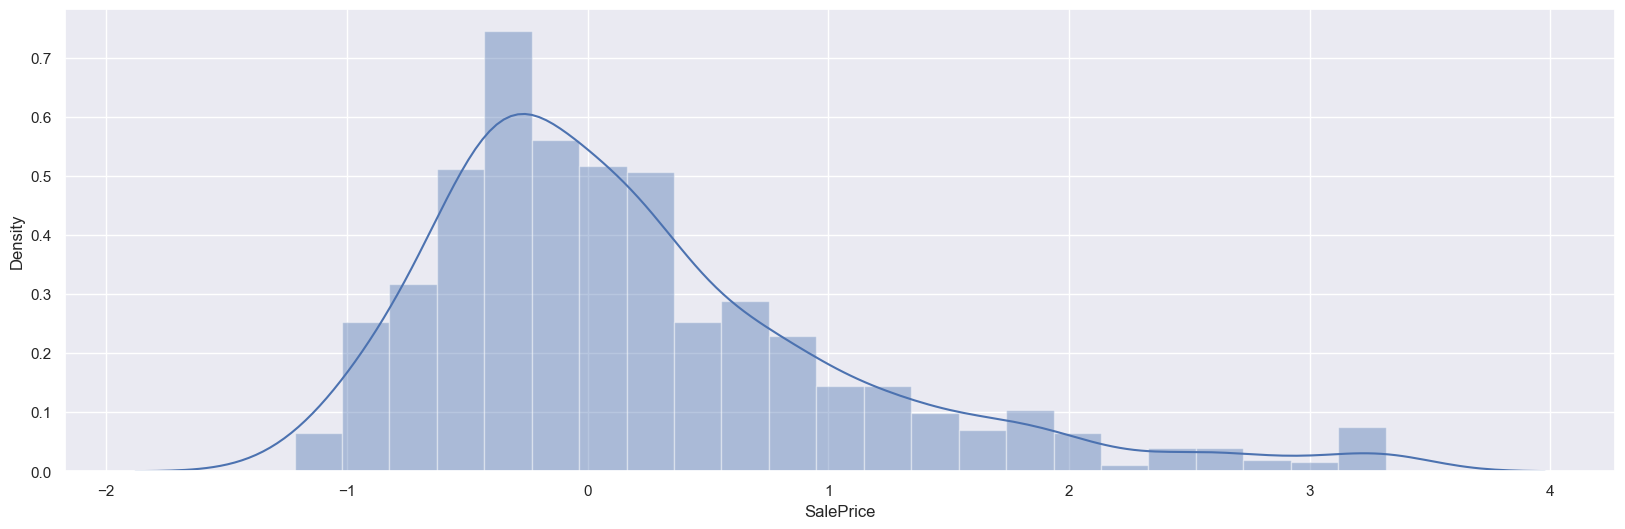

In [52]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

## Linear Regression

In [53]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1432989507.0961676
[ 1.52933954e-01 -5.72584506e+10 -3.29421016e+09  1.32755772e-01
 -5.45112800e-02  5.22370881e-01 -6.13377378e-03 -2.00338009e-02
  4.41440179e-02  5.51052094e-02 -5.60137017e+10 -3.29421016e+09
  6.96878433e-02  8.73261690e-02 -2.70412266e-02  4.47505951e-01
  4.60668802e-01  2.30523348e-01  3.51823390e-01  4.17467713e-01
  5.00946045e-01  5.75191975e-01  5.04586220e-01  4.51934814e-01
  3.82635146e-01 -1.22408804e+09  2.69316196e-01  4.17633772e-01
  3.73688877e-01  3.20702553e-01 -7.48899579e-02 -2.83820927e-02
  7.56613016e-02  2.32937098e-01  2.36301422e-02  2.02173233e-01
  1.34701967e-01  6.97104931e-02  1.14799380e-01 -9.55746770e-02
 -2.81248331e-01 -2.47189999e-02  6.77310228e-02  6.82411194e-02
 -3.51203755e-02  2.57917404e-01  1.23955965e-01  1.25080824e-01
  2.22393274e-02  2.97146380e-01 -4.78644371e-02  1.39698982e-02
  2.36033797e-02 -1.29773140e-01 -8.37248564e-02 -3.84006500e-02
  1.59616530e-01 -5.23934364e-02  4.55857038e-01  4.08077240e-01
 -5.0

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = {'Linear Regression':{}}
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric['Linear Regression']['R2 Train']= r2_train_lr

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
metric['Linear Regression']['R2 Test']=r2_test_lr

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train:",rss1_lr)
metric['Linear Regression']['RSS Train']=rss1_lr

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test:",rss2_lr)
metric['Linear Regression']['RSS Test']=rss2_lr

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric['Linear Regression']['MSE Train']=mse_train_lr**0.5

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test:",mse_test_lr)
metric['Linear Regression']['MSE Test']=mse_test_lr**0.5

R2 Train: 0.9399011756968353
R2 Test: -94587357889240.1
RSS Train: 47.544711709035525
RSS Test: 3.008891166814515e+16
MSE Train: 0.04656680872579386
MSE Test: 68696145361061.99


## Ridge Regression Using RFE

Let's now try predicting SalePrices to perform ridge and lasso regression.

In [56]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 60))}]

lm = Ridge()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 10 folds for each of 59 candidates, totalling 590 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=RFE(estimator=Ridge()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.834851      0.021114         0.003779        0.001920   
1        0.806465      0.041779         0.003778        0.003344   
2        0.844492      0.028027         0.002882        0.001066   
3        0.774150      0.038467         0.001845        0.000426   
4        0.782593      0.032586         0.002872        0.001753   
5        0.815518      0.061030         0.004571        0.002694   
6        0.785887      0.067896         0.002716        0.002073   
7        0.755851      0.037925         0.002584        0.001161   
8        0.751172      0.076353         0.003305        0.001916   
9        0.791422      0.049103         0.002502        0.001038   
10       0.766425      0.037241         0.002343        0.001208   
11       0.749802      0.008298         0.001745        0.000212   
12       0.762006      0.020523         0.002325        0.000864   
13       0.776468      0.021366         0.004376        0.003718   
14       0.753902      0.008390         0.002681        0.001240   
15       0.806474      0.029535         0.002665        0.002170   
16       0.750020      0.022061         0.002295        0.000807   
17       0.766514      0.020707         0.002857        0.001823   
18       0.826518      0.067941         0.003630        0.003165   
19       0.771061      0.039429         0.002779        0.001333   
20       0.735733      0.024072         0.003140        0.001472   
21       0.761231      0.028294         0.001732        0.000064   
22       0.737097      0.031669         0.002589        0.001239   
23       0.746904      0.054770         0.002510        0.000935   
24       0.745179      0.030954         0.002595        0.001120   
25       0.737395      0.025589         0.002857        0.001109   
26       0.744888      0.024341         0.002818        0.001247   
27       0.743596      0.021026         0.002239        0.001003   
28       0.746187      0.053059         0.002126        0.000855   
29       0.729935      0.023364         0.002351        0.000949   
30       0.738926      0.008324         0.002167        0.000939   
31       0.746653      0.018923         0.002588        0.001168   
32       0.739540      0.043627         0.002546        0.001053   
33       0.740599      0.010824         0.002489        0.000977   
34       0.759591      0.013042         0.002786        0.000950   
35       0.833709      0.041360         0.003361        0.001222   
36       0.763325      0.031804         0.002385        0.000977   
37       0.734726      0.010743         0.003208        0.001480   
38       0.736402      0.007651         0.002481        0.001159   
39       0.738243      0.030920         0.002188        0.000918   
40       0.738358      0.016572         0.002885        0.001320   
41       0.749325      0.046206         0.002653        0.001075   
42       0.731239      0.029324         0.002588        0.001158   
43       0.735751      0.011859         0.002880        0.001231   
44       0.766828      0.036868         0.002974        0.001273   
45       0.840129      0.045921         0.003261        0.001377   
46       0.876912      0.018365         0.003339        0.001904   
47       0.878043      0.042013         0.005495        0.003315   
48       0.888697      0.042537         0.006813        0.010357   
49       0.753566      0.032369         0.002972        0.001302   
50       0.879830      0.058384         0.003273        0.001668   
51       1.050504      0.163072         0.009513        0.007712   
52       1.284950      0.135064         0.007442        0.002245   
53       0.963867      0.115121         0.004288        0.003473   
54       0.836498      0.036893         0.002933        0.001131   
55       0.949187      0.079848         0.003568        0.002968   
56       0.968794      0.060680         0.008266        0.006302   
57       0.849790      0.047152         0.005266        0.00

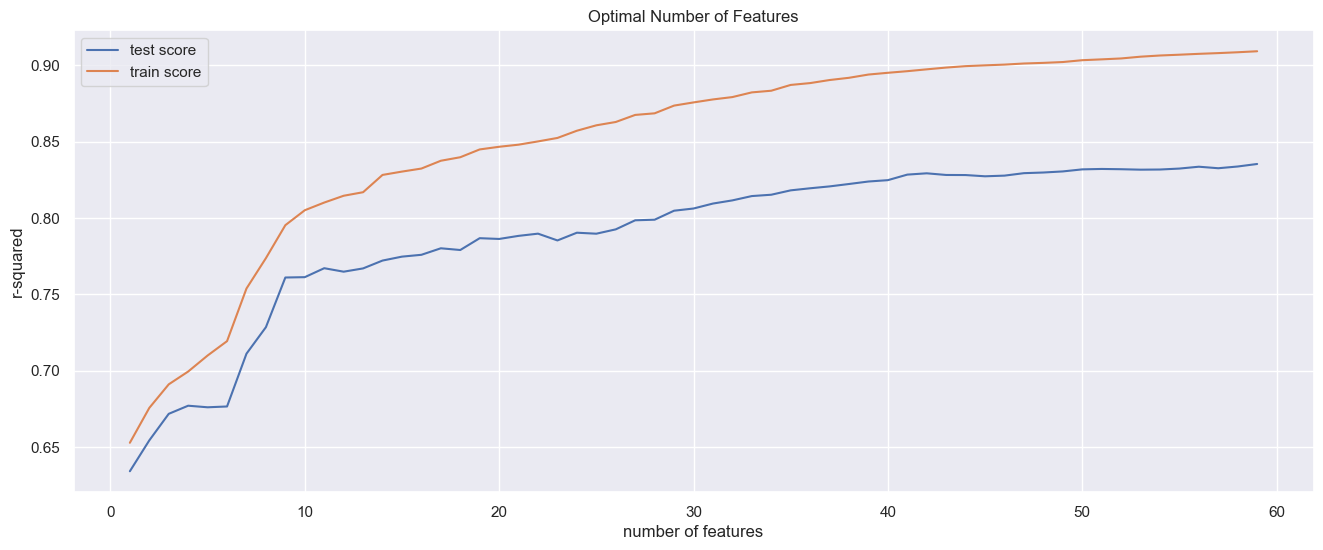

In [58]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [59]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'n_features_to_select': 59}


In [63]:
# Got optimal number of RFE from GridSearchCV 
rfe = RFE(lm,n_features_to_select=60)         
rfe = rfe.fit(X_train, y_train)
#Find the top features
colfls=X_train.columns[rfe.support_]
print(colfls)
# Changing sets to hold top features
X_train_ridge=X_train[colfls]
X_test_ridge=X_test[colfls]
y_train_ridge=y_train
y_test_ridge=y_test

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'remodel_age',
       'MSSubClass_190', 'MSSubClass_90', 'LotShape_IR2', 'LotShape_IR3',
       'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Unf', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_Unf'

## Aplha HyperTuning for Ridge

In [81]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
alpha = [{'alpha': np.arange(0.00000001,0.0008,0.000001)}]


# step-3: perform grid search
# 3.1 specify model
lm = Ridge()
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = alpha, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ridge, y_train_ridge)     

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': array([1.0000e-08, 1.0100e-06, 2.0100e-06, 3.0100e-06, 4.0100e-06,
       5.0100e-06, 6.0100e-06, 7.0100e-06, 8.0100e-06, 9.0100e-06,
       1.0010e-05, 1.1010e-05, 1.2010e-05, 1.3010e-05, 1.4010e-05,
       1.5010e-05, 1.6010e-05, 1.7010e-05, 1.8010e-05, 1.9010e-05,
       2.0010e-05...
       7.7001e-04, 7.7101e-04, 7.7201e-04, 7.7301e-04, 7.7401e-04,
       7.7501e-04, 7.7601e-04, 7.7701e-04, 7.7801e-04, 7.7901e-04,
       7.8001e-04, 7.8101e-04, 7.8201e-04, 7.8301e-04, 7.8401e-04,
       7.8501e-04, 7.8601e-04, 7.8701e-04, 7.8801e-04, 7.8901e-04,
       7.9001e-04, 7.9101e-04, 7.9201e-04, 7.9301e-04, 7.9401e-04,
       7.9501e-04, 7.9601e-04, 7.9701e-04, 7.9801e-04, 7.9901e-04])}],
             return_train_score=True, scoring='r2', verbose=1)

In [82]:
print(model_cv.best_params_)
value_ridge=model_cv.best_params_

{'alpha': 0.0007990100000000001}


In [83]:

lm = Ridge(alpha=value_ridge['alpha'])
lm.fit(X_train_ridge, y_train_ridge)   
y_pred_test_ridge=lm.predict(X_test_ridge)
y_pred_train_ridge=lm.predict(X_train_ridge)

metric_ridge = {'Ridge':{}}
r2_train_lr = r2_score(y_train_ridge, y_pred_train_ridge)
print("R2 Train:",r2_train_lr)
metric_ridge['Ridge']['R2 Train']=r2_train_lr

r2_test_lr = r2_score(y_test_ridge, y_pred_test_ridge)
print("R2 Test:",r2_test_lr)
metric_ridge['Ridge']['R2 Test']=r2_test_lr

rss1_lr = np.sum(np.square(y_train_ridge - y_pred_train_ridge))
print("RSS Train:",rss1_lr)
metric_ridge['Ridge']['RSS Train']=rss1_lr

rss2_lr = np.sum(np.square(y_test_ridge - y_pred_test_ridge))
print("RSS Test:",rss2_lr)
metric_ridge['Ridge']['RSS Test']=rss2_lr

mse_train_lr = mean_squared_error(y_train_ridge, y_pred_train_ridge)
print("MSE Train:",mse_train_lr)
metric_ridge['Ridge']['MSE Train']=mse_train_lr

mse_test_lr = mean_squared_error(y_test_ridge, y_pred_test_ridge)
print("MSE Test:",mse_test_lr)
metric_ridge['Ridge']['MSE Test']=mse_test_lr

R2 Train: 0.9121706333096007
R2 Test: 0.8636279152943627
RSS Train: 69.48258917375044
RSS Test: 43.38093062620014
MSE Train: 0.06805346637977516
MSE Test: 0.09904322060776288


## Regression Assumptions cecks
- Residual Analysis of the train data
- Checking Homoscedasticity
- Checking Residual Co-relation

## Residual Analysis of the train data

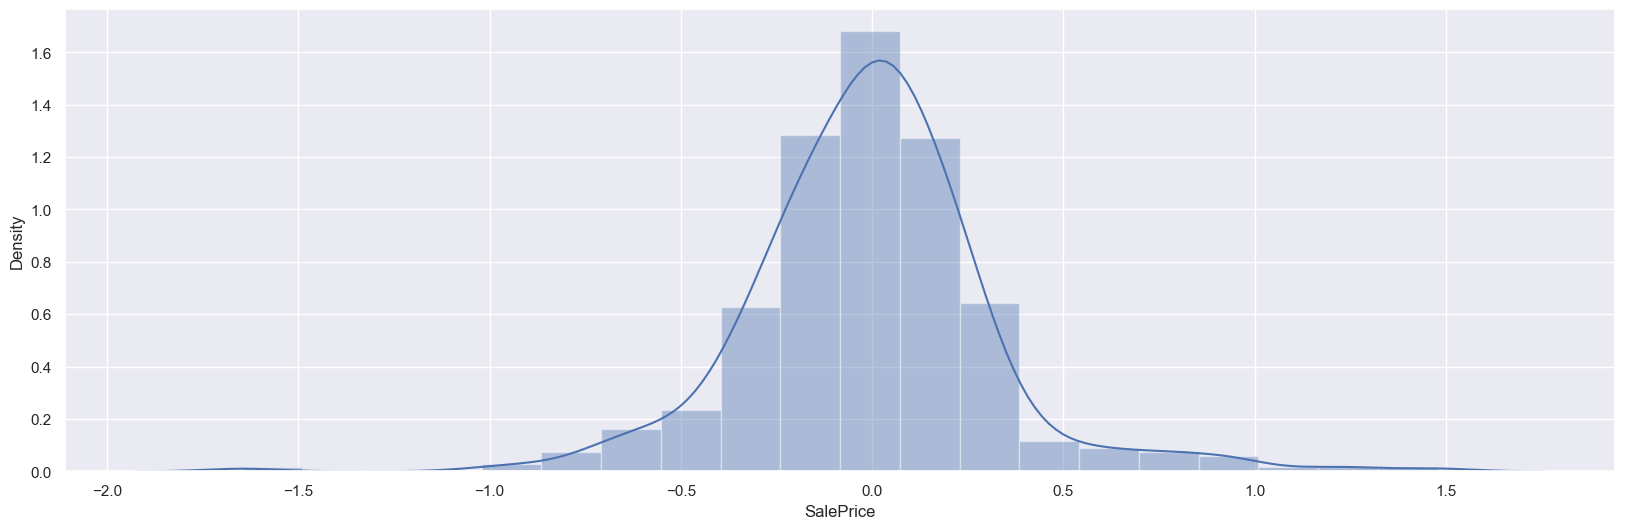

In [88]:
## Plot the Error Distribution
sns.distplot((y_test_ridge-y_pred_test_ridge), bins=20)
plt.show()

## Checking Homoscedasticity

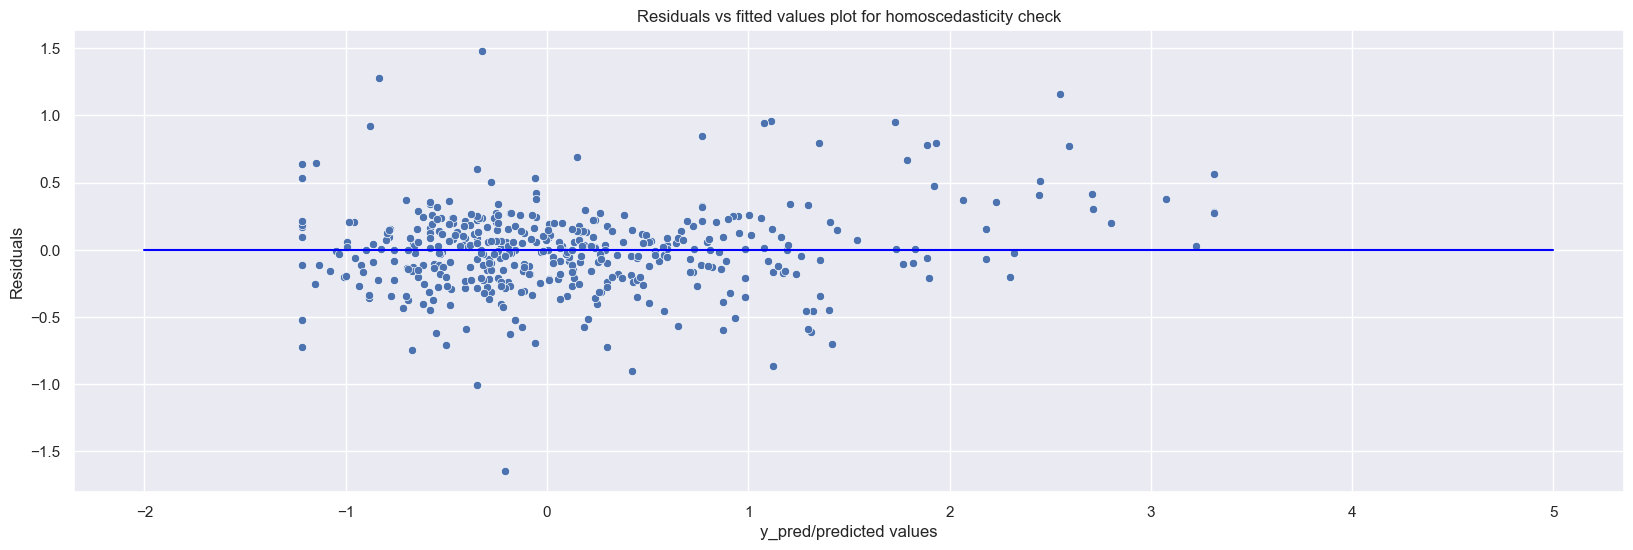

In [89]:
p = sns.scatterplot(y_test_ridge,(y_test_ridge-y_pred_test_ridge))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-2,5],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

## Checking Residual Co-relation

In [90]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
print('The Durbin-Watson value for Final Model is',durbin_watson(y_train_ridge - y_pred_train_ridge))

The Durbin-Watson value for Final Model is 2.018987325939196


#### The test statistic is 2.018. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

## Lasso

In [91]:
# Dividing into X_train and y_train
X_train_lasso=df_train.drop(['SalePrice'],axis=1)
y_train_lasso=df_train.SalePrice
# Dividing into X_test and y_test
X_test_lasso=df_test.drop(['SalePrice'],axis=1)
y_test_lasso=df_test.SalePrice

## Alpha Hypertune for Lasso

In [92]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 79)

# step-2: specify range of hyperparameters to tune
alpha = [{'alpha': np.arange(0.00000001,0.0005,0.000001)}]


# step-3: perform grid search
# 3.1 specify model
lm = Lasso()
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = alpha, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_lasso, y_train_lasso)      

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=79, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid=[{'alpha': array([1.0000e-08, 1.0100e-06, 2.0100e-06, 3.0100e-06, 4.0100e-06,
       5.0100e-06, 6.0100e-06, 7.0100e-06, 8.0100e-06, 9.0100e-06,
       1.0010e-05, 1.1010e-05, 1.2010e-05, 1.3010e-05, 1.4010e-05,
       1.5010e-05, 1.6010e-05, 1.7010e-05, 1.8010e-05, 1.9010e-05,
       2.0010e-05...
       4.7001e-04, 4.7101e-04, 4.7201e-04, 4.7301e-04, 4.7401e-04,
       4.7501e-04, 4.7601e-04, 4.7701e-04, 4.7801e-04, 4.7901e-04,
       4.8001e-04, 4.8101e-04, 4.8201e-04, 4.8301e-04, 4.8401e-04,
       4.8501e-04, 4.8601e-04, 4.8701e-04, 4.8801e-04, 4.8901e-04,
       4.9001e-04, 4.9101e-04, 4.9201e-04, 4.9301e-04, 4.9401e-04,
       4.9501e-04, 4.9601e-04, 4.9701e-04, 4.9801e-04, 4.9901e-04])}],
             return_train_score=True, scoring='r2', verbose=1)

In [93]:
print(model_cv.best_params_)
value_lasso=model_cv.best_params_

{'alpha': 0.00049901}


In [94]:
lm = Lasso(alpha=value_lasso['alpha'])
lm.fit(X_train_lasso, y_train_lasso)   
y_pred_test_lasso=lm.predict(X_test_lasso)
y_pred_train_lasso=lm.predict(X_train_lasso)

metric_lasso = {'Lasso':{}}
r2_train_lr = r2_score(y_train_lasso, y_pred_train_lasso)
print("R2 Train:",r2_train_lr)
metric_lasso['Lasso']['R2 Train']=r2_train_lr

r2_test_lr = r2_score(y_test_lasso, y_pred_test_lasso)
print("R2 Test:",r2_test_lr)
metric_lasso['Lasso']['R2 Test']=r2_test_lr

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train_lasso))
print("RSS Train:",rss1_lr)
metric_lasso['Lasso']['RSS Train']=rss1_lr

rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test_lasso))
print("RSS Test:",rss2_lr)
metric_lasso['Lasso']['RSS Test']=rss2_lr

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train_lasso)
print("MSE Train:",mse_train_lr)
metric_lasso['Lasso']['MSE Train']=mse_train_lr

mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test_lasso)
print("MSE Test:",mse_test_lr)
metric_lasso['Lasso']['MSE Test']=mse_test_lr

R2 Train: 0.9223620503510778
R2 Test: 0.8998510373470525
RSS Train: 61.42006897037166
RSS Test: 31.858097722207987
MSE Train: 0.060156776660501135
MSE Test: 0.07273538292741549


## Regression Assumptions cecks
- Residual Analysis of the train data
- Checking Homoscedasticity
- Checking Residual Co-relation

## Residual Analysis of the train data

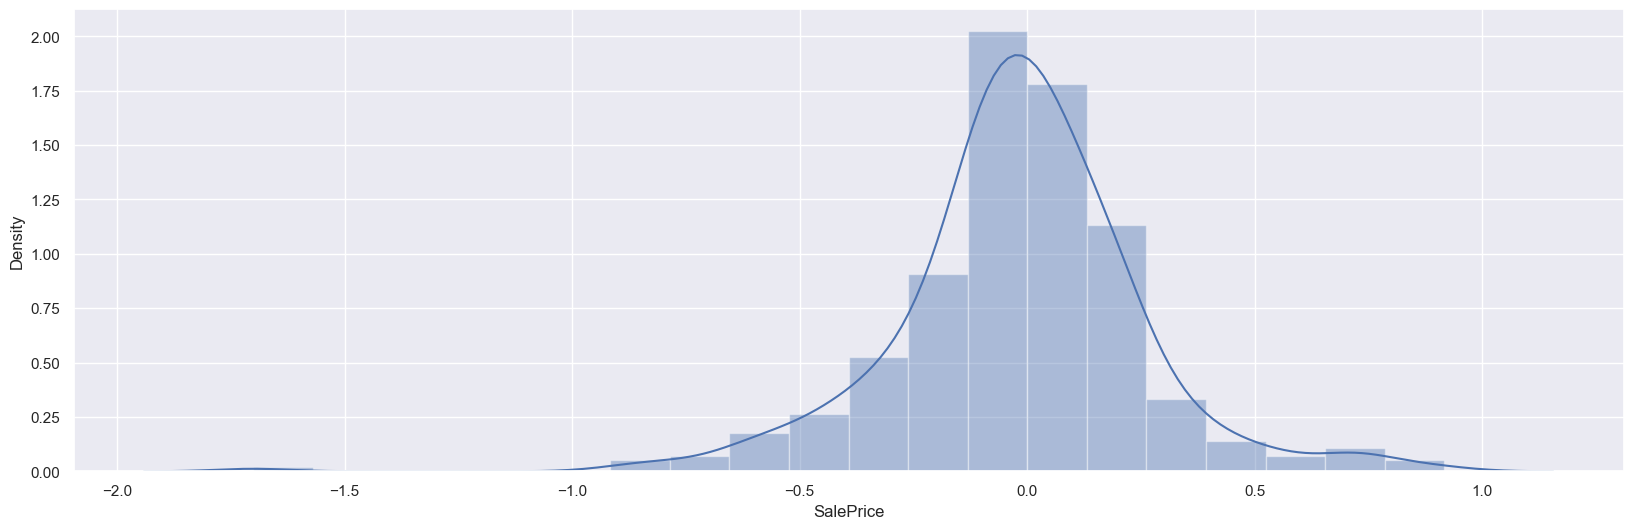

In [95]:
## Plot the Error Distribution
sns.distplot((y_test_lasso-y_pred_test_lasso), bins=20)
plt.show()

## Checking Homoscedasticity

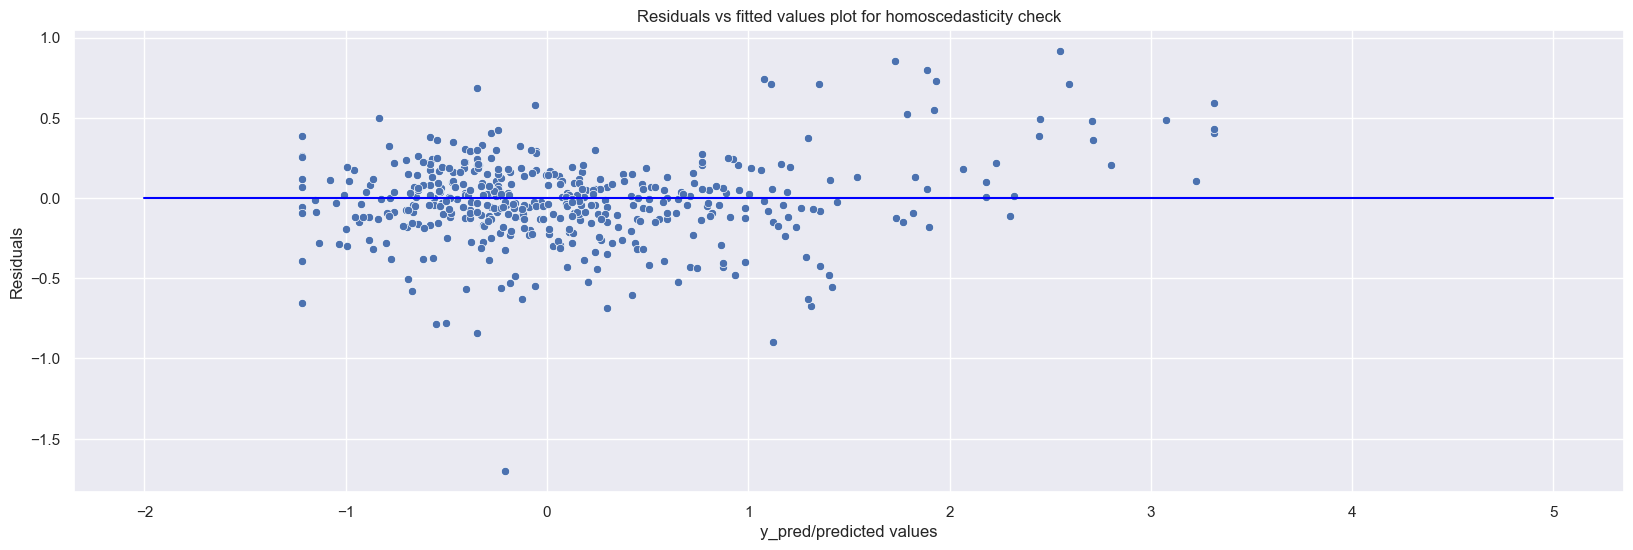

In [96]:
p = sns.scatterplot(y_test_lasso,(y_test_lasso-y_pred_test_lasso))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-2,5],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

## Checking Residual Co-relation

In [97]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
print('The Durbin-Watson value for Final Model is',durbin_watson(y_train_lasso - y_pred_train_lasso))

The Durbin-Watson value for Final Model is 2.1000328405601616


# Conclusion

In [98]:
final_result=pd.concat([pd.DataFrame(metric),pd.DataFrame(metric_ridge),pd.DataFrame(metric_lasso)],axis=1)
final_result

Linear Regression      Ridge      Lasso
MSE Test        8.288314e+06   0.099043   0.072735
MSE Train       2.157934e-01   0.068053   0.060157
R2 Test        -9.458736e+13   0.863628   0.899851
R2 Train        9.399012e-01   0.912171   0.922362
RSS Test        3.008891e+16  43.380931  31.858098
RSS Train       4.754471e+01  69.482589  61.420069

## Insights:
It can be observed Lasso performed better than Ridge. 
It has higher accuracy on test with less MSE. 

We will use Lasso.

Linear Regression showed negative R2 for test mean sit was overfitting and hence we used Regularisation

## Lets observe the Features list (Lasso)

In [99]:
lm.coef_

array([ 1.83398425e-01,  0.00000000e+00,  0.00000000e+00,  1.33703625e-01,
       -2.76844008e-02,  4.52333485e-01, -6.76400474e-04, -2.15901108e-02,
        8.84730106e-02,  2.44777181e-02, -1.88211018e-02, -9.99180041e-02,
       -2.32590566e-02, -0.00000000e+00, -1.31123555e-01,  6.01705587e-02,
        1.69534367e-02,  0.00000000e+00,  6.07063785e-02, -1.10905480e-02,
        2.02238015e-03,  4.43612591e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.92529746e-01,  0.00000000e+00,  1.23974410e-02,
        6.63783308e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.16999607e-01, -2.07976607e-01,  2.88039175e-03,  2.14420790e-01,
        7.43664259e-02,  7.59848906e-02,  1.30591642e-01, -6.13029732e-02,
       -6.40419610e-02,  6.27679237e-03,  3.76760438e-02,  1.43815492e-01,
       -0.00000000e+00,  9.28337553e-02,  9.23451362e-02,  0.00000000e+00,
       -0.00000000e+00,  2.30571434e-01, -9.22800437e-02, -8.99851292e-03,
       -0.00000000e+00, -

In [100]:
X_train_lasso.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [101]:
#ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
feature_list=pd.DataFrame(zip(X_train_lasso.columns,lm.coef_),columns=['Columns','Coefficients'])
feature_list=feature_list[~(feature_list.Coefficients==0)].reset_index().drop('index',axis=1)
feature_list.sort_values(by=['Coefficients'], ascending=False,inplace=True)
feature_list

Columns  Coefficients
69       RoofMatl_WdShngl      0.517122
3               GrLivArea      0.452333
42   Neighborhood_NoRidge      0.450018
43   Neighborhood_NridgHt      0.428262
48   Neighborhood_StoneBr      0.418790
..                    ...           ...
59         BldgType_Twnhs     -0.233633
108        KitchenQual_Fa     -0.245041
109        KitchenQual_Gd     -0.258646
110        KitchenQual_TA     -0.281429
57        Condition2_PosN     -1.115307

[145 rows x 2 columns]

In [102]:
# Final equation 
print('SalePrice=:',end=' ')
for x,y in feature_list.values:
  print('(',x,'*',y,')','+')

SalePrice=: ( RoofMatl_WdShngl * 0.5171222235070078 ) +
( GrLivArea * 0.45233348522662 ) +
( Neighborhood_NoRidge * 0.4500178986104527 ) +
( Neighborhood_NridgHt * 0.4282623281084837 ) +
( Neighborhood_StoneBr * 0.41879036984717355 ) +
( RoofMatl_CompShg * 0.2698581505312018 ) +
( Neighborhood_Somerst * 0.23810196098849734 ) +
( SaleType_New * 0.2379744681791185 ) +
( BsmtExposure_Gd * 0.23420752186556382 ) +
( Neighborhood_Crawfor * 0.23057143370832603 ) +
( Exterior1st_BrkFace * 0.21842548633168973 ) +
( LandContour_HLS * 0.2144207895156311 ) +
( Functional_Typ * 0.20844168834158391 ) +
( RoofMatl_WdShake * 0.19803977384555557 ) +
( OverallQual * 0.1833984251925909 ) +
( SaleCondition_Normal * 0.14429596234099315 ) +
( LandSlope_Sev * 0.1438154923740205 ) +
( BsmtCond_Gd * 0.14242523373531138 ) +
( TotalBsmtSF * 0.13370362472659114 ) +
( LotConfig_CulDSac * 0.1305916424120619 ) +
( BsmtCond_TA * 0.12342896720129805 ) +
( LotShape_IR2 * 0.1169996074342616 ) +
( Exterior1st_CemntBd * 0

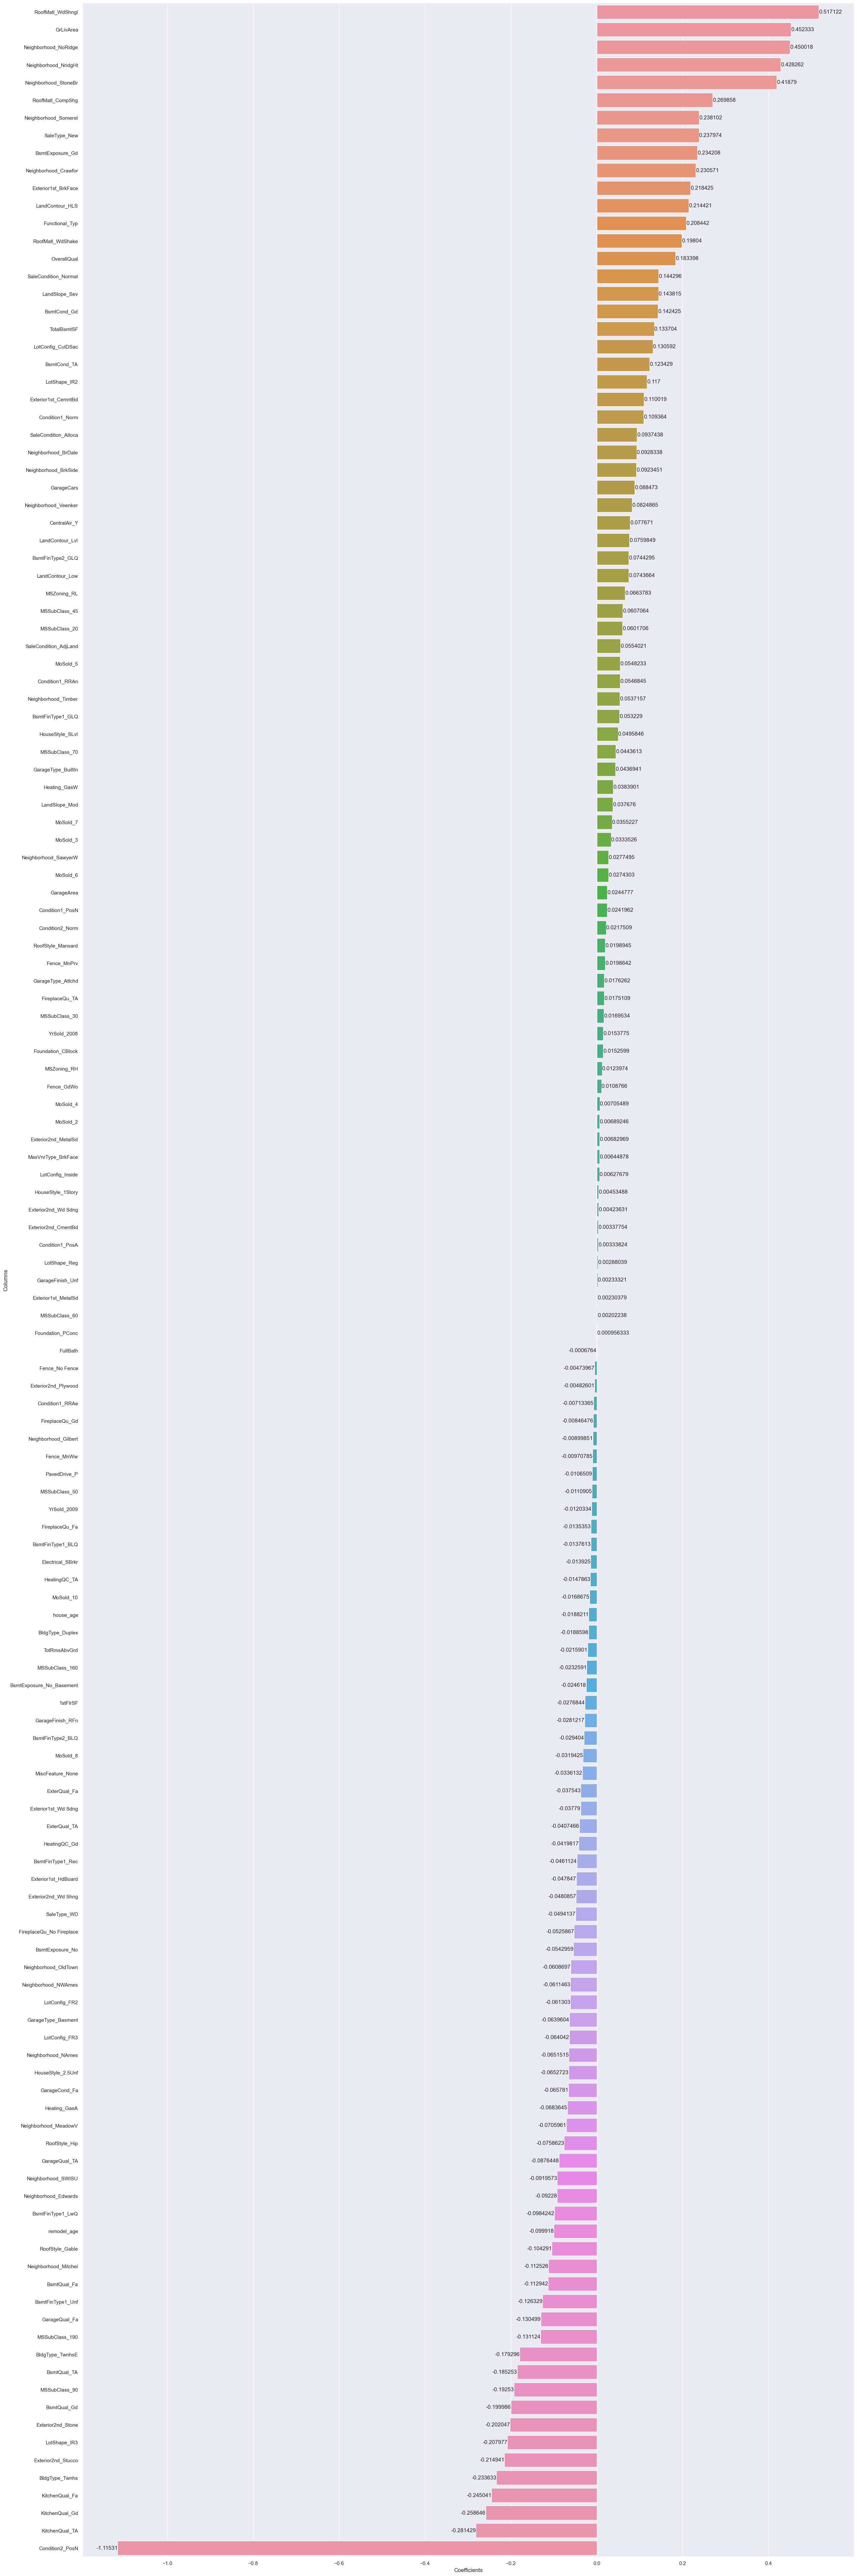

In [103]:
# coefficients weight chart
plt.figure(figsize=(30,100))
ax=sns.barplot(x="Coefficients",y="Columns",data=feature_list)
ax.bar_label(ax.containers[0])
plt.show()

## Recommendations for business

Significant variables as per Lasso that best decsribes the SalePrice are :
- GrLivArea
- Roof Material is Wood Shingles1stFlrSF
- SaleType is New
- OverallCond 
- TotalBsmtSF
